# Notebook generating plots for NeurIPS paper

### Imports

In [15]:
import os
import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import nistats
import scipy
import nibabel as nib
from nistats.second_level_model import SecondLevelModel
import nilearn
from nilearn.image import load_img, mean_img, index_img, threshold_img, math_img, smooth_img, new_img_like
from nilearn.input_data import NiftiMapsMasker, NiftiMasker, NiftiLabelsMasker, MultiNiftiMasker
from nilearn.regions import RegionExtractor
from nistats.thresholding import map_threshold
from nilearn import plotting
from nilearn import datasets
from scipy.stats import norm
from nilearn.surface import vol_to_surf
from joblib import Parallel, delayed

In [16]:
import warnings
warnings.simplefilter(action='ignore')

In [17]:
from logger import Logger
from utils import read_yaml, check_folder, fetch_masker, possible_subjects_id, get_subject_name
import reporting
from linguistics_info import load_surnames, load_syntactic_roi, load_language_roi

### Defining variables

In [5]:
language = 'english'

In [6]:
PROJECT_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/"
OUTPUT_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/{language}"
INPUT_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{language}"
FMRIDATA_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/fMRI/{language}"
MASKER_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/ROI_masks/global_masker_95%_{language}"
ALL_MASKS_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/ROI_masks/"
SAVING_FOLDER = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/clustering/{language}"
TMP_FOLDER = f"/home/ap263679/tmp"

In [23]:
#PROJECT_PATH = f"/Volumes/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/"
#OUTPUT_PATH = f"/Volumes/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/{language}"
#INPUT_PATH = f"/Volumes/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{language}"
#FMRIDATA_PATH = f"/Volumes/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/fMRI/{language}"
#MASKER_PATH = f"/Volumes/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/ROI_masks/global_masker_95%_{language}"
#ALL_MASKS_PATH = f"/Volumes/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/ROI_masks/"
#SAVING_FOLDER = f"/Volumes/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/clustering/{language}"
#TMP_FOLDER = f"/Users/alexpsq/tmp"
#

Fetch a masker fitted on all subjects data and the following characterisctics:
- detrend: true
- dtype: null
- high_pass: null
- low_pass: null
- mask_strategy: background
- memory_level: 0
- n_jobs: 1
- smoothing_fwhm: null # try with 6 next time
- standardize: true
- t_r: null
- verbose: 0

In [24]:
#PROJECT_PATH = f"/Users/alexpsq/Code/Parietal/maps"

In [7]:
logger = Logger(os.path.join(PROJECT_PATH, 'logs.txt'))

In [8]:
global_masker_50 = reporting.fetch_masker(f"{ALL_MASKS_PATH}/global_masker_{language}"
, language, FMRIDATA_PATH, INPUT_PATH, smoothing_fwhm=None, logger=logger)
#global_masker_80 = reporting.fetch_masker(f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/global_masker_80%_{language}"
#, language, FMRIDATA_PATH, INPUT_PATH, smoothing_fwhm=None, logger=logger)
#global_masker_90 = reporting.fetch_masker(f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/global_masker_90%_{language}"
#, language, FMRIDATA_PATH, INPUT_PATH, smoothing_fwhm=None, logger=logger)
#global_masker_95 = reporting.fetch_masker(f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/global_masker_95%_{language}"
#, language, FMRIDATA_PATH, INPUT_PATH, smoothing_fwhm=None, logger=logger)

In [11]:
plotting.plot_roi(global_masker.mask_img, cut_coords=(0,-35,-45)) # 80%
plotting.show()

NameError: name 'global_masker' is not defined

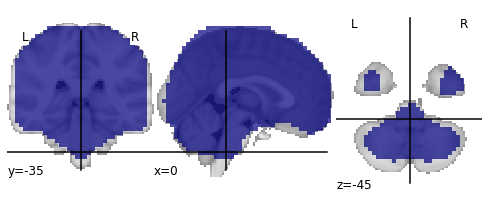

In [39]:
plotting.plot_roi(global_masker.mask_img, cut_coords=(0,-35,-45)) #50%
plotting.show()

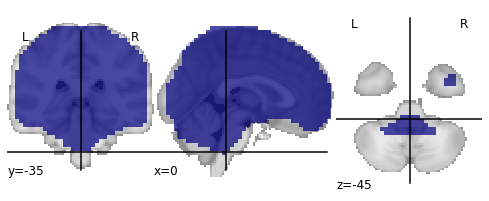

In [47]:
plotting.plot_roi(global_masker.mask_img, cut_coords=(0,-35,-45)) #90%
plotting.show()

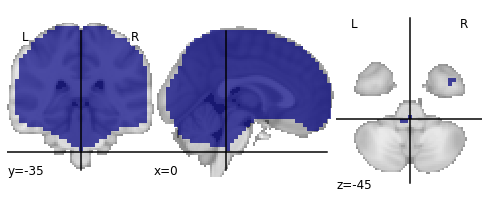

In [63]:
plotting.plot_roi(global_masker.mask_img, cut_coords=(0,-35,-45)) #95%
plotting.show()

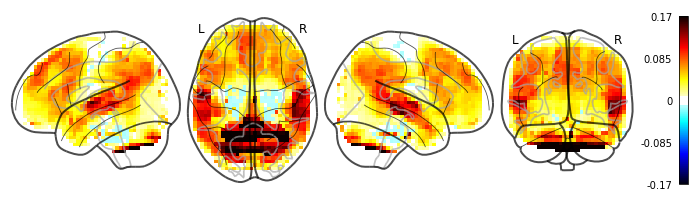

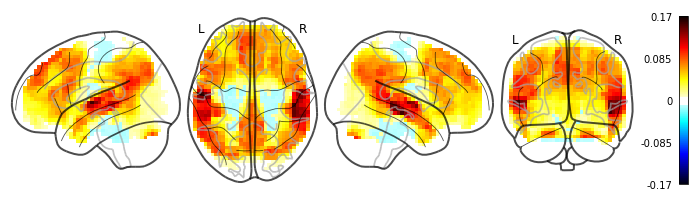

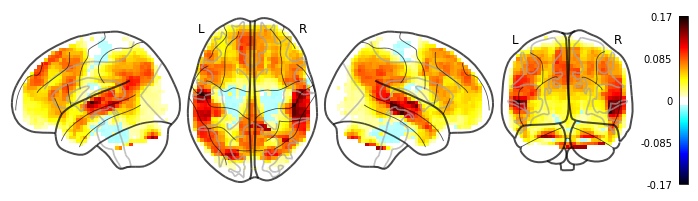

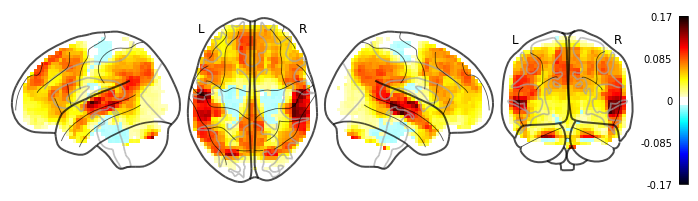

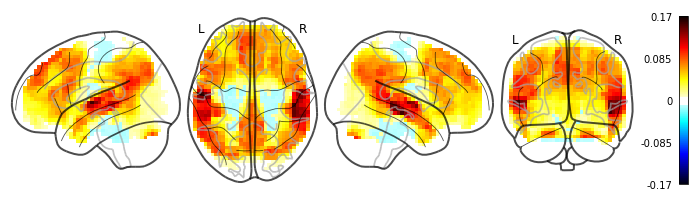

In [76]:
template = "/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/oldstuff/fastsrm/sub-0*"
paths = glob.glob(template)
data = [np.load(p) for p in paths]
data = np.array(data)
plotting.plot_glass_brain(img, colorbar=True, plot_abs=False, display_mode='lzry', vmax=0.17) 
plotting.plot_glass_brain(global_masker.inverse_transform(global_masker.transform(img)), colorbar=True, plot_abs=False, display_mode='lzry', vmax=0.17) 
plotting.plot_glass_brain(global_masker_80.inverse_transform(global_masker_80.transform(img)), colorbar=True, plot_abs=False, display_mode='lzry', vmax=0.17) 
plotting.plot_glass_brain(global_masker_90.inverse_transform(global_masker_90.transform(img)), colorbar=True, plot_abs=False, display_mode='lzry', vmax=0.17) 
plotting.plot_glass_brain(global_masker_95.inverse_transform(global_masker_95.transform(img)), colorbar=True, plot_abs=False, display_mode='lzry', vmax=0.17) 
plt.show()  

In [55]:
img = global_masker.inverse_transform(np.mean(data, axis=0))

In [9]:
atlas_maps, labels = reporting.load_atlas() # load harvard-oxford atlas named'cort-prob-2mm'


## Group level analysis

In [82]:
names = [
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-9_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-8_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-7_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-7_1_norm-inf_norm-inf_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-6_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-5_1_with-special-tokens_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-5_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-5_1_norm-inf_norm-inf_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-3_3_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-3_-3_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-3_2_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-3_-2_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-3_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-3_-1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-3_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-2_3_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-2_-3_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-2_2_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-2_-2_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-2_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-2_-1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-2_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-1_3_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-1_-3_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-1_2_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-1_-2_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-1_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-1_-1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_sent-stop-1_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-4_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-3_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-2_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-2_1_norm-inf_norm-inf_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-90_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-80_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-7_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-70_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-60_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-5_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-50_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-4_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-40_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-400_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-3_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-375_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-35_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-350_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-325_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-30_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-300_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-2_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-275_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-25_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-250_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-225_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-20_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-200_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-17_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-175_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-15_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-150_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-12_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-125_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-10_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-100_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_token-0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-9_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-8_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-7_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-6_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-5_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-4_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-3_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-2_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-20_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-19_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-18_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-17_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-16_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-15_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-14_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-13_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-12_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-11_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-1_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-10_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_sent-stop-0_0_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_with-special-tokens_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-4_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-3_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-2_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-1_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-layer-0/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_similarity_cluster_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-9/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-8/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-7/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-6/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-5/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-4/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-3/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-2/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-12/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-11/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10_head-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-10/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_attention-layer-1/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_oversampling-50_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_alpha-100_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-20_1_norm-inf_norm-inf_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-19_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-18_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-17_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-16_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-15_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-15_1_norm-inf_norm-inf_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-14_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-13_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-12_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-1_1_with-special-tokens_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-1_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-1_1_norm-inf_norm-inf_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-11_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-10_1_with-special-tokens_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-10_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-10_1_norm-inf_norm-inf_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-0_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/gpt2_pre-0_1_norm-inf_norm-inf_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-7_1_post-0_norm-None_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-7_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-5_1_post-0_norm-None_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-5_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-2_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-20_1_post-0_norm-None_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-20_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-15_1_post-0_norm-None_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-15_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-1_1_post-0_norm-None_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-1_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-10_1_post-0_norm-None_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-10_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-0_1_post-0_norm-None_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
'/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/{subject_name}/distilgpt2_pre-0_1_norm-inf_norm-inf_temporal-shifting-0_{subject_id}_hidden-all-layers_pca_300/',
]

import shutil
import utils

subject_names_list = [utils.get_subject_name(sub_id) for sub_id in utils.possible_subjects_id(language)]
subject_ids_list = utils.possible_subjects_id(language)

for name in tqdm(names):
    for subject_name, subject_id in zip(subject_names_list, subject_ids_list):
        try:
            shutil.rmtree(name.format(subject_name=subject_name, subject_id=subject_id))
        except:
            print()

100%|██████████| 302/302 [35:35<00:00,  7.07s/it]


In [180]:
model_names = [

#'bert-base-uncased_pre-4_1_post-3_token-200-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'gpt2_pre-20_token-0_norm-inf_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',

#'bert-base-uncased_pre-4_token-70-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-60-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-5-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-50-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-40-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-30-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-2-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-20-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-15-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-1-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-10-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-100-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4_token-1000-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-70_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-60_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-5_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-50_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-40_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-30_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-2_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-20_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-1_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-15_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-10_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-100_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-3_token-1000-1000_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-70_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-60_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-5_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-50_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-40_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-30_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-2_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-20_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-1_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-15_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-10_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-100_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-2_token-1000-1000_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-1_token-1000-70_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-1_token-1000-60_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-1_token-1000-5_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-1_token-1000-50_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-1_token-1000-40_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
#'bert-base-uncased_pre-4-1_token-1000-30_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-1_token-1000-2_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-1_token-1000-20_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-1_token-1000-1_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-1_token-1000-15_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-1_token-1000-10_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-1_token-1000-100_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-1_token-1000-1000_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-70_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-60_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-5_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-50_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-40_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-30_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-2_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-20_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-1_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-15_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-10_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-100_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
'bert-base-uncased_pre-4-0_token-1000-1000_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
   

] 

In [120]:
model_names= [
    'distilbert-base-cased_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    #[
    #'distilgpt2_pre-0_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    #'distilgpt2_pre-1_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    #'distilgpt2_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    #'distilgpt2_pre-5_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    #'distilgpt2_pre-7_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    #'distilgpt2_pre-10_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    #'distilgpt2_pre-15_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    #'distilgpt2_pre-20_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    #],
    'distilroberta_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    'bert-base-uncased_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    'bert-base-cased_pre-2_1_post-0_norm-None_norm-inf_{}_hidden-all-layers_pca_300',
    'albert-base-v2_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    'roberta-base_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300',
    'gpt2_pre-20_1_norm-inf_norm-inf_{}_hidden-all-layers_pca_300',
    'glove_wiki_300_{}',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-hidden-layers',
    'gpt2_pre-20_1_norm-inf_norm-inf_{}_hidden-all-layers_pca_300',
]

In [181]:
data_full = reporting.get_model_data(model_names, language, OUTPUT_PATH)

  4%|▍         | 2/51 [00:00<00:08,  5.89it/s]

sub-057 - 1 - 1
sub-058 - 1 - 1


  8%|▊         | 4/51 [00:00<00:08,  5.63it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1


 12%|█▏        | 6/51 [00:00<00:07,  6.39it/s]

sub-062 - 1 - 1
sub-063 - 1 - 1


 14%|█▎        | 7/51 [00:01<00:08,  5.02it/s]

sub-064 - 1 - 1


 16%|█▌        | 8/51 [00:01<00:09,  4.58it/s]

sub-065 - 1 - 1


 18%|█▊        | 9/51 [00:01<00:09,  4.58it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1


 24%|██▎       | 12/51 [00:02<00:07,  4.91it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1


 25%|██▌       | 13/51 [00:02<00:08,  4.72it/s]

sub-070 - 1 - 1


 27%|██▋       | 14/51 [00:02<00:07,  4.72it/s]

sub-072 - 1 - 1


 29%|██▉       | 15/51 [00:02<00:07,  4.74it/s]

sub-073 - 1 - 1


 31%|███▏      | 16/51 [00:03<00:07,  4.74it/s]

sub-074 - 1 - 1


 33%|███▎      | 17/51 [00:03<00:07,  4.64it/s]

sub-075 - 1 - 1


 35%|███▌      | 18/51 [00:03<00:08,  4.11it/s]

sub-076 - 1 - 1


 39%|███▉      | 20/51 [00:04<00:06,  4.66it/s]

sub-077 - 1 - 1
sub-078 - 1 - 1


 41%|████      | 21/51 [00:04<00:05,  5.22it/s]

sub-079 - 1 - 1


 43%|████▎     | 22/51 [00:04<00:07,  3.98it/s]

sub-080 - 1 - 1


 47%|████▋     | 24/51 [00:04<00:05,  4.57it/s]

sub-081 - 1 - 1
sub-082 - 1 - 1


 51%|█████     | 26/51 [00:05<00:04,  5.18it/s]

sub-083 - 1 - 1
sub-084 - 1 - 1


 53%|█████▎    | 27/51 [00:05<00:04,  5.45it/s]

sub-086 - 1 - 1


 57%|█████▋    | 29/51 [00:05<00:04,  5.30it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1


 61%|██████    | 31/51 [00:06<00:03,  6.23it/s]

sub-089 - 1 - 1
sub-091 - 1 - 1


 65%|██████▍   | 33/51 [00:06<00:02,  7.36it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1


 67%|██████▋   | 34/51 [00:06<00:02,  7.76it/s]

sub-094 - 1 - 1


 69%|██████▊   | 35/51 [00:06<00:02,  5.64it/s]

sub-095 - 1 - 1
sub-096 - 1 - 1


 73%|███████▎  | 37/51 [00:07<00:02,  6.18it/s]

sub-097 - 1 - 1
sub-098 - 1 - 1


 78%|███████▊  | 40/51 [00:07<00:01,  7.30it/s]

sub-099 - 1 - 1
sub-100 - 1 - 1


 82%|████████▏ | 42/51 [00:07<00:01,  7.37it/s]

sub-101 - 1 - 1
sub-103 - 1 - 1


 86%|████████▋ | 44/51 [00:07<00:00,  7.50it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1


 90%|█████████ | 46/51 [00:08<00:00,  7.65it/s]

sub-106 - 1 - 1
sub-108 - 1 - 1


 92%|█████████▏| 47/51 [00:08<00:00,  7.77it/s]

sub-109 - 1 - 1
sub-110 - 1 - 1


 98%|█████████▊| 50/51 [00:08<00:00,  8.17it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1


  4%|▍         | 2/51 [00:00<00:03, 14.56it/s]

sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1


 10%|▉         | 5/51 [00:00<00:03, 12.01it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:03, 12.75it/s]

sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1


 20%|█▉        | 10/51 [00:00<00:03, 12.62it/s]

sub-067 - 1 - 1
sub-068 - 1 - 1


 25%|██▌       | 13/51 [00:01<00:04,  8.09it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1


 29%|██▉       | 15/51 [00:01<00:04,  8.60it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1


 31%|███▏      | 16/51 [00:01<00:04,  8.64it/s]

sub-074 - 1 - 1
sub-075 - 1 - 1


 37%|███▋      | 19/51 [00:01<00:04,  7.91it/s]

sub-076 - 1 - 1
sub-077 - 1 - 1


 41%|████      | 21/51 [00:02<00:04,  6.42it/s]

sub-078 - 1 - 1
sub-079 - 1 - 1


 43%|████▎     | 22/51 [00:02<00:04,  6.76it/s]

sub-080 - 1 - 1


 47%|████▋     | 24/51 [00:02<00:04,  5.84it/s]

sub-081 - 1 - 1
sub-082 - 1 - 1


 51%|█████     | 26/51 [00:03<00:03,  6.65it/s]

sub-083 - 1 - 1
sub-084 - 1 - 1


 53%|█████▎    | 27/51 [00:03<00:03,  7.00it/s]

sub-086 - 1 - 1


 59%|█████▉    | 30/51 [00:03<00:02,  7.49it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1


 63%|██████▎   | 32/51 [00:03<00:02,  6.71it/s]

sub-091 - 1 - 1
sub-092 - 1 - 1


 65%|██████▍   | 33/51 [00:04<00:02,  7.03it/s]

sub-093 - 1 - 1
sub-094 - 1 - 1


 69%|██████▊   | 35/51 [00:04<00:02,  7.32it/s]

sub-095 - 1 - 1


 73%|███████▎  | 37/51 [00:04<00:02,  6.77it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1


 78%|███████▊  | 40/51 [00:04<00:01,  8.40it/s]

sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1


 82%|████████▏ | 42/51 [00:05<00:01,  8.35it/s]

sub-101 - 1 - 1
sub-103 - 1 - 1


 84%|████████▍ | 43/51 [00:05<00:00,  8.34it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1


 92%|█████████▏| 47/51 [00:05<00:00,  9.57it/s]

sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1


 96%|█████████▌| 49/51 [00:05<00:00,  9.74it/s]

sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1


  2%|▏         | 1/51 [00:00<00:05,  8.39it/s]

sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1


 10%|▉         | 5/51 [00:00<00:04,  9.39it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1


 14%|█▎        | 7/51 [00:00<00:04,  9.38it/s]

sub-063 - 1 - 1
sub-064 - 1 - 1


 18%|█▊        | 9/51 [00:00<00:04,  9.27it/s]

sub-065 - 1 - 1
sub-066 - 1 - 1


 22%|██▏       | 11/51 [00:01<00:04,  8.45it/s]

sub-067 - 1 - 1
sub-068 - 1 - 1


 25%|██▌       | 13/51 [00:01<00:05,  7.00it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1


 31%|███▏      | 16/51 [00:01<00:04,  8.50it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1


 35%|███▌      | 18/51 [00:02<00:03,  8.50it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1


 43%|████▎     | 22/51 [00:02<00:02, 11.32it/s]

sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1


 47%|████▋     | 24/51 [00:02<00:02, 11.23it/s]

sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1


 51%|█████     | 26/51 [00:02<00:01, 12.73it/s]

sub-084 - 1 - 1
sub-086 - 1 - 1


 59%|█████▉    | 30/51 [00:02<00:01, 12.50it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1


 71%|███████   | 36/51 [00:03<00:01, 14.90it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1


 75%|███████▍  | 38/51 [00:03<00:00, 13.55it/s]

sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1


 82%|████████▏ | 42/51 [00:03<00:00, 12.40it/s]

sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1


 86%|████████▋ | 44/51 [00:03<00:00, 12.42it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1


 94%|█████████▍| 48/51 [00:04<00:00, 11.66it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1


  4%|▍         | 2/51 [00:00<00:04, 10.88it/s]

sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1


 10%|▉         | 5/51 [00:00<00:04, 10.64it/s]

sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:04,  9.68it/s]

sub-064 - 1 - 1
sub-065 - 1 - 1


 20%|█▉        | 10/51 [00:00<00:03, 10.40it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1


 25%|██▌       | 13/51 [00:01<00:04,  9.01it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1


 33%|███▎      | 17/51 [00:01<00:03,  8.78it/s]

sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1


 37%|███▋      | 19/51 [00:02<00:03,  8.32it/s]

sub-076 - 1 - 1
sub-077 - 1 - 1


 41%|████      | 21/51 [00:02<00:04,  6.78it/s]

sub-078 - 1 - 1
sub-079 - 1 - 1


 45%|████▌     | 23/51 [00:02<00:03,  7.58it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1


 53%|█████▎    | 27/51 [00:02<00:02,  9.98it/s]

sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1


 61%|██████    | 31/51 [00:03<00:01, 11.87it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1


 65%|██████▍   | 33/51 [00:03<00:01, 12.25it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1


 73%|███████▎  | 37/51 [00:03<00:01, 10.93it/s]

sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1


 76%|███████▋  | 39/51 [00:03<00:01, 10.41it/s]

sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1


 80%|████████  | 41/51 [00:04<00:00, 10.60it/s]

sub-101 - 1 - 1
sub-103 - 1 - 1


 88%|████████▊ | 45/51 [00:04<00:00,  9.93it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1


 92%|█████████▏| 47/51 [00:04<00:00, 10.66it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1


 98%|█████████▊| 50/51 [00:05<00:00,  9.24it/s]

sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1


  4%|▍         | 2/51 [00:00<00:03, 15.70it/s]

sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1


 10%|▉         | 5/51 [00:00<00:03, 11.58it/s]

sub-061 - 1 - 1
sub-062 - 1 - 1


 14%|█▎        | 7/51 [00:00<00:04,  9.20it/s]

sub-063 - 1 - 1
sub-064 - 1 - 1


 20%|█▉        | 10/51 [00:01<00:04,  8.46it/s]

sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1


 24%|██▎       | 12/51 [00:01<00:03,  9.93it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1


 27%|██▋       | 14/51 [00:01<00:04,  9.06it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1


 35%|███▌      | 18/51 [00:01<00:03,  9.77it/s]

sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1


 39%|███▉      | 20/51 [00:02<00:03,  9.48it/s]

sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1


 47%|████▋     | 24/51 [00:02<00:02, 11.81it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1


 51%|█████     | 26/51 [00:02<00:02, 12.11it/s]

sub-084 - 1 - 1
sub-086 - 1 - 1


 59%|█████▉    | 30/51 [00:02<00:01, 10.72it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1


 63%|██████▎   | 32/51 [00:03<00:01, 10.47it/s]

sub-091 - 1 - 1
sub-092 - 1 - 1


 67%|██████▋   | 34/51 [00:03<00:01,  8.78it/s]

sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1


 73%|███████▎  | 37/51 [00:03<00:01,  7.90it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1


 78%|███████▊  | 40/51 [00:04<00:01,  9.16it/s]

sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1


 82%|████████▏ | 42/51 [00:04<00:00,  9.41it/s]

sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1


 86%|████████▋ | 44/51 [00:04<00:00, 10.43it/s]

sub-105 - 1 - 1
sub-106 - 1 - 1


 90%|█████████ | 46/51 [00:04<00:00,  9.79it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1


 96%|█████████▌| 49/51 [00:04<00:00,  9.93it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1


  2%|▏         | 1/51 [00:00<00:05,  9.87it/s]

sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1


 10%|▉         | 5/51 [00:00<00:04, 10.61it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:04,  9.12it/s]

sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1


 18%|█▊        | 9/51 [00:01<00:05,  7.40it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1


 22%|██▏       | 11/51 [00:01<00:05,  8.00it/s]

sub-068 - 1 - 1


 27%|██▋       | 14/51 [00:01<00:05,  7.03it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1


 31%|███▏      | 16/51 [00:01<00:04,  7.43it/s]

sub-073 - 1 - 1
sub-074 - 1 - 1


 35%|███▌      | 18/51 [00:02<00:03,  8.59it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1


 41%|████      | 21/51 [00:02<00:03,  8.41it/s]

sub-078 - 1 - 1
sub-079 - 1 - 1


 47%|████▋     | 24/51 [00:02<00:03,  7.46it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1


 51%|█████     | 26/51 [00:02<00:02,  9.12it/s]

sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1


 55%|█████▍    | 28/51 [00:03<00:02,  9.31it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1


 59%|█████▉    | 30/51 [00:03<00:02,  9.45it/s]

sub-089 - 1 - 1
sub-091 - 1 

 67%|██████▋   | 34/51 [00:03<00:01, 10.83it/s]

- 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1


 73%|███████▎  | 37/51 [00:03<00:01, 12.51it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1


 76%|███████▋  | 39/51 [00:04<00:01,  8.99it/s]

sub-098 - 1 - 1
sub-099 - 1 - 1


 80%|████████  | 41/51 [00:04<00:01,  9.52it/s]

sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1


 84%|████████▍ | 43/51 [00:04<00:00, 10.71it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1


 88%|████████▊ | 45/51 [00:04<00:00,  9.99it/s]

sub-106 - 1 - 1
sub-108 - 1 - 1


 92%|█████████▏| 47/51 [00:05<00:00,  8.75it/s]

sub-109 - 1 - 1
sub-110 - 1 - 1


 98%|█████████▊| 50/51 [00:05<00:00,  7.73it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1


  4%|▍         | 2/51 [00:00<00:03, 14.51it/s]

sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1


 12%|█▏        | 6/51 [00:00<00:02, 15.92it/s]

sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:03, 13.80it/s]

sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1


 25%|██▌       | 13/51 [00:00<00:02, 14.45it/s]

sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1


 29%|██▉       | 15/51 [00:00<00:02, 15.20it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1


 33%|███▎      | 17/51 [00:01<00:02, 13.06it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1


 41%|████      | 21/51 [00:01<00:02, 10.75it/s]

sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1


 45%|████▌     | 23/51 [00:01<00:02,  9.70it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1


 53%|█████▎    | 27/51 [00:02<00:02, 10.86it/s]

sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1


 59%|█████▉    | 30/51 [00:02<00:01, 12.94it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1


 63%|██████▎   | 32/51 [00:02<00:01, 10.47it/s]

sub-091 - 1 - 1
sub-092 - 1 - 1


 67%|██████▋   | 34/51 [00:02<00:01, 11.18it/s]

sub-093 - 1 - 1
sub-094 - 1 - 1


 75%|███████▍  | 38/51 [00:03<00:01, 12.01it/s]

sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1


 78%|███████▊  | 40/51 [00:03<00:00, 12.67it/s]

sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1


 82%|████████▏ | 42/51 [00:03<00:00, 13.68it/s]

sub-103 - 1 - 1
sub-104 - 1 - 1


 86%|████████▋ | 44/51 [00:03<00:00, 10.97it/s]

sub-105 - 1 - 1
sub-106 - 1 - 1


 94%|█████████▍| 48/51 [00:03<00:00, 11.36it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1


 12%|█▏        | 6/51 [00:00<00:03, 14.93it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1


 20%|█▉        | 10/51 [00:00<00:03, 11.35it/s]

sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1


 29%|██▉       | 15/51 [00:01<00:03, 10.88it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1


 33%|███▎      | 17/51 [00:01<00:02, 11.38it/s]

sub-074 - 1 - 1
sub-075 - 1 - 1


 37%|███▋      | 19/51 [00:01<00:03, 10.65it/s]

sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1


 45%|████▌     | 23/51 [00:02<00:02, 10.19it/s]

sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1


 49%|████▉     | 25/51 [00:02<00:02, 10.65it/s]

sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1


 53%|█████▎    | 27/51 [00:02<00:02,  9.27it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1


 57%|█████▋    | 29/51 [00:02<00:02,  9.19it/s]

sub-088 - 1 - 1
sub-089 - 1 - 1


 63%|██████▎   | 32/51 [00:03<00:02,  7.84it/s]

sub-091 - 1 - 1
sub-092 - 1 - 1


 67%|██████▋   | 34/51 [00:03<00:01,  9.22it/s]

sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1


 75%|███████▍  | 38/51 [00:03<00:01, 10.93it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1


 78%|███████▊  | 40/51 [00:03<00:01, 10.28it/s]

sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1


 86%|████████▋ | 44/51 [00:04<00:00,  9.78it/s]

sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1


 90%|█████████ | 46/51 [00:04<00:00, 10.54it/s]

sub-106 - 1 - 1
sub-108 - 1 - 1


 94%|█████████▍| 48/51 [00:04<00:00,  8.35it/s]

sub-109 - 1 - 1
sub-110 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1


  4%|▍         | 2/51 [00:00<00:04, 10.44it/s]

sub-057 - 1 - 1
sub-058 - 1 - 1


 10%|▉         | 5/51 [00:00<00:04, 10.51it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1


 14%|█▎        | 7/51 [00:00<00:05,  7.40it/s]

sub-063 - 1 - 1
sub-064 - 1 - 1


 18%|█▊        | 9/51 [00:01<00:05,  7.95it/s]

sub-065 - 1 - 1
sub-066 - 1 - 1


 20%|█▉        | 10/51 [00:01<00:06,  6.39it/s]

sub-067 - 1 - 1
sub-068 - 1 - 1


 27%|██▋       | 14/51 [00:01<00:04,  7.77it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1


 31%|███▏      | 16/51 [00:01<00:03,  8.91it/s]

sub-073 - 1 - 1
sub-074 - 1 - 1


 35%|███▌      | 18/51 [00:02<00:04,  6.94it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1


 45%|████▌     | 23/51 [00:02<00:02, 10.00it/s]

sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1


 49%|████▉     | 25/51 [00:02<00:02,  9.34it/s]

sub-082 - 1 - 1
sub-083 - 1 - 1


 53%|█████▎    | 27/51 [00:02<00:02,  8.64it/s]

sub-084 - 1 - 1
sub-086 - 1 - 1


 57%|█████▋    | 29/51 [00:03<00:02,  9.83it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1


 65%|██████▍   | 33/51 [00:03<00:01, 10.93it/s]

sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1


 69%|██████▊   | 35/51 [00:03<00:01,  9.54it/s]

sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1


 75%|███████▍  | 38/51 [00:04<00:01,  7.33it/s]

sub-097 - 1 - 1
sub-098 - 1 - 1


 76%|███████▋  | 39/51 [00:04<00:01,  6.43it/s]

sub-099 - 1 - 1
sub-100 - 1 - 1


 80%|████████  | 41/51 [00:04<00:01,  7.04it/s]

sub-101 - 1 - 1


 82%|████████▏ | 42/51 [00:04<00:01,  5.73it/s]

sub-103 - 1 - 1


 88%|████████▊ | 45/51 [00:05<00:00,  6.83it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1


 92%|█████████▏| 47/51 [00:05<00:00,  6.77it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1


 98%|█████████▊| 50/51 [00:05<00:00,  8.52it/s]

sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-115 - 1 - 1
sub-057 - 1 - 1


  4%|▍         | 2/51 [00:00<00:05,  9.19it/s]

sub-058 - 1 - 1
sub-059 - 1 - 1


  8%|▊         | 4/51 [00:00<00:05,  9.33it/s]

sub-061 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:04,  9.06it/s]

sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1


 20%|█▉        | 10/51 [00:01<00:05,  7.73it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1


 22%|██▏       | 11/51 [00:01<00:05,  7.20it/s]

sub-068 - 1 - 1


 25%|██▌       | 13/51 [00:01<00:06,  6.28it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1


 29%|██▉       | 15/51 [00:01<00:05,  6.07it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1


 33%|███▎      | 17/51 [00:02<00:05,  6.63it/s]

sub-074 - 1 - 1
sub-075 - 1 - 1


 37%|███▋      | 19/51 [00:02<00:05,  6.03it/s]

sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1


 43%|████▎     | 22/51 [00:03<00:04,  6.60it/s]

sub-079 - 1 - 1
sub-080 - 1 - 1


 47%|████▋     | 24/51 [00:03<00:04,  6.43it/s]

sub-081 - 1 - 1
sub-082 - 1 - 1


 51%|█████     | 26/51 [00:03<00:03,  6.31it/s]

sub-083 - 1 - 1
sub-084 - 1 - 1


 53%|█████▎    | 27/51 [00:03<00:04,  5.94it/s]

sub-086 - 1 - 1


 55%|█████▍    | 28/51 [00:04<00:04,  5.42it/s]

sub-087 - 1 - 1


 59%|█████▉    | 30/51 [00:04<00:03,  5.57it/s]

sub-088 - 1 - 1
sub-089 - 1 - 1


 65%|██████▍   | 33/51 [00:04<00:02,  7.33it/s]

sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1


 69%|██████▊   | 35/51 [00:05<00:02,  7.10it/s]

sub-094 - 1 - 1
sub-095 - 1 - 1


 71%|███████   | 36/51 [00:05<00:02,  6.62it/s]

sub-096 - 1 - 1


 75%|███████▍  | 38/51 [00:05<00:02,  5.88it/s]

sub-097 - 1 - 1
sub-098 - 1 - 1


 78%|███████▊  | 40/51 [00:05<00:01,  6.38it/s]

sub-099 - 1 - 1
sub-100 - 1 - 1


 82%|████████▏ | 42/51 [00:06<00:01,  7.19it/s]

sub-101 - 1 - 1
sub-103 - 1 - 1


 88%|████████▊ | 45/51 [00:06<00:00,  8.46it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1


 92%|█████████▏| 47/51 [00:06<00:00,  8.37it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1


 96%|█████████▌| 49/51 [00:06<00:00,  8.38it/s]

sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1


  2%|▏         | 1/51 [00:00<00:05,  9.80it/s]

sub-115 - 1 - 1
sub-057 - 1 - 1


  4%|▍         | 2/51 [00:00<00:05,  9.57it/s]

sub-058 - 1 - 1


  8%|▊         | 4/51 [00:00<00:07,  6.18it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1


 10%|▉         | 5/51 [00:00<00:08,  5.35it/s]

sub-062 - 1 - 1


 12%|█▏        | 6/51 [00:01<00:08,  5.06it/s]

sub-063 - 1 - 1


 14%|█▎        | 7/51 [00:01<00:08,  5.02it/s]

sub-064 - 1 - 1


 16%|█▌        | 8/51 [00:01<00:09,  4.51it/s]

sub-065 - 1 - 1


 18%|█▊        | 9/51 [00:01<00:09,  4.38it/s]

sub-066 - 1 - 1


 22%|██▏       | 11/51 [00:02<00:08,  4.90it/s]

sub-067 - 1 - 1
sub-068 - 1 - 1


 25%|██▌       | 13/51 [00:02<00:07,  4.86it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1


 29%|██▉       | 15/51 [00:02<00:06,  5.33it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1


 31%|███▏      | 16/51 [00:03<00:06,  5.48it/s]

sub-074 - 1 - 1


 35%|███▌      | 18/51 [00:03<00:05,  5.64it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1


 37%|███▋      | 19/51 [00:03<00:05,  5.58it/s]

sub-077 - 1 - 1


 41%|████      | 21/51 [00:04<00:05,  5.26it/s]

sub-078 - 1 - 1
sub-079 - 1 - 1


 43%|████▎     | 22/51 [00:04<00:06,  4.82it/s]

sub-080 - 1 - 1


 47%|████▋     | 24/51 [00:04<00:05,  4.96it/s]

sub-081 - 1 - 1
sub-082 - 1 - 1


 51%|█████     | 26/51 [00:05<00:04,  5.51it/s]

sub-083 - 1 - 1
sub-084 - 1 - 1


 55%|█████▍    | 28/51 [00:05<00:03,  6.38it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1


 59%|█████▉    | 30/51 [00:05<00:03,  6.30it/s]

sub-088 - 1 - 1
sub-089 - 1 - 1


 63%|██████▎   | 32/51 [00:05<00:02,  7.38it/s]

sub-091 - 1 - 1
sub-092 - 1 - 1


 67%|██████▋   | 34/51 [00:06<00:02,  6.41it/s]

sub-093 - 1 - 1
sub-094 - 1 - 1


 71%|███████   | 36/51 [00:06<00:02,  6.12it/s]

sub-095 - 1 - 1
sub-096 - 1 - 1


 76%|███████▋  | 39/51 [00:06<00:01,  7.76it/s]

sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1


 84%|████████▍ | 43/51 [00:07<00:00,  9.91it/s]

sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1


 94%|█████████▍| 48/51 [00:07<00:00, 11.42it/s]

sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1


 10%|▉         | 5/51 [00:00<00:04,  9.50it/s]

sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1


 12%|█▏        | 6/51 [00:00<00:04,  9.00it/s]

sub-063 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:06,  6.83it/s]

sub-064 - 1 - 1
sub-065 - 1 - 1


 20%|█▉        | 10/51 [00:01<00:05,  7.51it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1


 24%|██▎       | 12/51 [00:01<00:04,  8.25it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1


 31%|███▏      | 16/51 [00:01<00:03,  9.89it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1


 45%|████▌     | 23/51 [00:02<00:02, 13.37it/s]

sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1


 49%|████▉     | 25/51 [00:02<00:02, 12.77it/s]

sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1


 59%|█████▉    | 30/51 [00:02<00:01, 15.88it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1


 63%|██████▎   | 32/51 [00:02<00:01, 13.96it/s]

sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1


 71%|███████   | 36/51 [00:02<00:01, 14.35it/s]

sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1


 75%|███████▍  | 38/51 [00:03<00:01,  8.36it/s]

sub-098 - 1 - 1
sub-099 - 1 - 1


 78%|███████▊  | 40/51 [00:03<00:01,  6.37it/s]

sub-100 - 1 - 1


 80%|████████  | 41/51 [00:04<00:01,  5.85it/s]

sub-101 - 1 - 1


 82%|████████▏ | 42/51 [00:04<00:01,  4.96it/s]

sub-103 - 1 - 1


 86%|████████▋ | 44/51 [00:04<00:01,  4.81it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1


 88%|████████▊ | 45/51 [00:04<00:01,  4.86it/s]

sub-106 - 1 - 1


 90%|█████████ | 46/51 [00:05<00:01,  4.77it/s]

sub-108 - 1 - 1


 92%|█████████▏| 47/51 [00:05<00:00,  4.72it/s]

sub-109 - 1 - 1


 96%|█████████▌| 49/51 [00:05<00:00,  4.74it/s]

sub-110 - 1 - 1
sub-113 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1


  6%|▌         | 3/51 [00:00<00:06,  7.80it/s]

sub-058 - 1 - 1
sub-059 - 1 - 1


 10%|▉         | 5/51 [00:00<00:06,  7.37it/s]

sub-061 - 1 - 1
sub-062 - 1 - 1


 14%|█▎        | 7/51 [00:01<00:07,  6.02it/s]

sub-063 - 1 - 1
sub-064 - 1 - 1


 18%|█▊        | 9/51 [00:01<00:06,  6.40it/s]

sub-065 - 1 - 1
sub-066 - 1 - 1


 20%|█▉        | 10/51 [00:01<00:05,  7.03it/s]

sub-067 - 1 - 1


 24%|██▎       | 12/51 [00:01<00:06,  5.70it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1


 27%|██▋       | 14/51 [00:02<00:05,  6.35it/s]

sub-070 - 1 - 1
sub-072 - 1 - 1


 31%|███▏      | 16/51 [00:02<00:05,  6.49it/s]

sub-073 - 1 - 1
sub-074 - 1 - 1


 35%|███▌      | 18/51 [00:02<00:04,  6.68it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1


 39%|███▉      | 20/51 [00:03<00:04,  7.05it/s]

sub-077 - 1 - 1
sub-078 - 1 - 1


 43%|████▎     | 22/51 [00:03<00:04,  6.67it/s]

sub-079 - 1 - 1
sub-080 - 1 - 1


 47%|████▋     | 24/51 [00:03<00:03,  8.14it/s]

sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1


 57%|█████▋    | 29/51 [00:03<00:01, 11.27it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1


 69%|██████▊   | 35/51 [00:04<00:01, 15.70it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1


 75%|███████▍  | 38/51 [00:04<00:00, 15.98it/s]

sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1


 80%|████████  | 41/51 [00:04<00:00, 14.77it/s]

sub-101 - 1 - 1
sub-103 - 1 - 1


 84%|████████▍ | 43/51 [00:04<00:00,  9.99it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1


 92%|█████████▏| 47/51 [00:05<00:00,  9.98it/s]

sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1


 96%|█████████▌| 49/51 [00:05<00:00, 10.22it/s]

sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1


  4%|▍         | 2/51 [00:00<00:04, 10.63it/s]

sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1


 12%|█▏        | 6/51 [00:00<00:03, 12.37it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:03, 12.19it/s]

sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1


 24%|██▎       | 12/51 [00:00<00:02, 13.46it/s]

sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1


 31%|███▏      | 16/51 [00:01<00:02, 12.80it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1


 35%|███▌      | 18/51 [00:01<00:02, 14.14it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1


 45%|████▌     | 23/51 [00:01<00:01, 15.26it/s]

sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1


 55%|█████▍    | 28/51 [00:01<00:01, 16.96it/s]

sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1


 65%|██████▍   | 33/51 [00:02<00:00, 18.05it/s]

sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1


 71%|███████   | 36/51 [00:02<00:00, 18.67it/s]

sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1


 82%|████████▏ | 42/51 [00:02<00:00, 20.55it/s]

sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1


 12%|█▏        | 6/51 [00:00<00:01, 29.50it/s]

sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:01, 22.04it/s]

sub-064 - 1 - 1
sub-065 - 1 - 1


 20%|█▉        | 10/51 [00:00<00:02, 13.74it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1


 27%|██▋       | 14/51 [00:00<00:02, 12.77it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1


 31%|███▏      | 16/51 [00:01<00:02, 12.29it/s]

sub-073 - 1 - 1
sub-074 - 1 - 1


 39%|███▉      | 20/51 [00:01<00:02, 12.94it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1


 45%|████▌     | 23/51 [00:01<00:01, 14.10it/s]

sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1


 53%|█████▎    | 27/51 [00:01<00:01, 14.36it/s]

sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1


 59%|█████▉    | 30/51 [00:02<00:01, 15.56it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1


 67%|██████▋   | 34/51 [00:02<00:01, 15.54it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1


 76%|███████▋  | 39/51 [00:02<00:00, 16.74it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1


 80%|████████  | 41/51 [00:02<00:00, 15.26it/s]

sub-100 - 1 - 1
sub-101 - 1 - 1


 84%|████████▍ | 43/51 [00:02<00:00, 11.89it/s]

sub-103 - 1 - 1
sub-104 - 1 - 1


 88%|████████▊ | 45/51 [00:03<00:00, 10.70it/s]

sub-105 - 1 - 1
sub-106 - 1 - 1


 92%|█████████▏| 47/51 [00:03<00:00, 10.74it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1


  6%|▌         | 3/51 [00:00<00:04, 11.34it/s]

sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1


 14%|█▎        | 7/51 [00:00<00:03, 12.48it/s]

sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1


 20%|█▉        | 10/51 [00:00<00:03, 13.63it/s]

sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1


 24%|██▎       | 12/51 [00:00<00:03, 11.10it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1


 31%|███▏      | 16/51 [00:01<00:02, 12.15it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1


 39%|███▉      | 20/51 [00:01<00:02, 12.73it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1


 45%|████▌     | 23/51 [00:01<00:01, 15.30it/s]

sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1


 57%|█████▋    | 29/51 [00:01<00:01, 14.50it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1


 65%|██████▍   | 33/51 [00:02<00:01, 10.72it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1


 69%|██████▊   | 35/51 [00:02<00:01,  8.77it/s]

sub-095 - 1 - 1
sub-096 - 1 - 1


 73%|███████▎  | 37/51 [00:03<00:01,  9.04it/s]

sub-097 - 1 - 1
sub-098 - 1 - 1


 76%|███████▋  | 39/51 [00:03<00:01,  8.82it/s]

sub-099 - 1 - 1


 78%|███████▊  | 40/51 [00:03<00:01,  7.13it/s]

sub-100 - 1 - 1
sub-101 - 1 - 1


 86%|████████▋ | 44/51 [00:03<00:00,  8.89it/s]

sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1


 90%|█████████ | 46/51 [00:03<00:00, 10.38it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1


 98%|█████████▊| 50/51 [00:04<00:00, 10.44it/s]

sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1


  6%|▌         | 3/51 [00:00<00:03, 14.04it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1


 10%|▉         | 5/51 [00:00<00:04, 10.16it/s]

sub-062 - 1 - 1
sub-063 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:05,  8.55it/s]

sub-064 - 1 - 1
sub-065 - 1 - 1


 20%|█▉        | 10/51 [00:01<00:04,  8.43it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1


 24%|██▎       | 12/51 [00:01<00:04,  8.32it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1


 27%|██▋       | 14/51 [00:01<00:05,  7.12it/s]

sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1


 33%|███▎      | 17/51 [00:02<00:04,  7.51it/s]

sub-074 - 1 - 1
sub-075 - 1 - 1


 39%|███▉      | 20/51 [00:02<00:03,  9.35it/s]

sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1


 51%|█████     | 26/51 [00:02<00:01, 13.57it/s]

sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1


 59%|█████▉    | 30/51 [00:02<00:01, 15.50it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1


 75%|███████▍  | 38/51 [00:03<00:00, 22.29it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1


 90%|█████████ | 46/51 [00:03<00:00, 23.22it/s]

sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1


  8%|▊         | 4/51 [00:00<00:04, 11.03it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1


 14%|█▎        | 7/51 [00:00<00:04,  8.91it/s]

sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1


 20%|█▉        | 10/51 [00:01<00:05,  7.99it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1


 24%|██▎       | 12/51 [00:01<00:05,  7.02it/s]

sub-069 - 1 - 1


 25%|██▌       | 13/51 [00:01<00:06,  5.46it/s]

sub-070 - 1 - 1
sub-072 - 1 - 1


 31%|███▏      | 16/51 [00:02<00:05,  6.14it/s]

sub-073 - 1 - 1
sub-074 - 1 - 1


 35%|███▌      | 18/51 [00:02<00:05,  6.28it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1


 39%|███▉      | 20/51 [00:02<00:05,  5.89it/s]

sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1


 45%|████▌     | 23/51 [00:03<00:04,  6.73it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1


 51%|█████     | 26/51 [00:03<00:03,  7.66it/s]

sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1


 53%|█████▎    | 27/51 [00:03<00:03,  7.31it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1


 57%|█████▋    | 29/51 [00:03<00:02,  7.56it/s]

sub-088 - 1 - 1
sub-089 - 1 - 1


 61%|██████    | 31/51 [00:04<00:02,  7.36it/s]

sub-091 - 1 - 1
sub-092 - 1 - 1


 69%|██████▊   | 35/51 [00:04<00:01,  8.65it/s]

sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1


 73%|███████▎  | 37/51 [00:04<00:01,  8.19it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1


 76%|███████▋  | 39/51 [00:05<00:01,  7.85it/s]

sub-098 - 1 - 1
sub-099 - 1 - 1


 80%|████████  | 41/51 [00:05<00:01,  7.65it/s]

sub-100 - 1 - 1
sub-101 - 1 - 1


 84%|████████▍ | 43/51 [00:05<00:00,  8.77it/s]

sub-103 - 1 - 1
sub-104 - 1 - 1


 88%|████████▊ | 45/51 [00:05<00:00,  8.36it/s]

sub-105 - 1 - 1
sub-106 - 1 - 1


 92%|█████████▏| 47/51 [00:06<00:00,  7.70it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1


  4%|▍         | 2/51 [00:00<00:06,  7.26it/s]

sub-057 - 1 - 1
sub-058 - 1 - 1


  6%|▌         | 3/51 [00:00<00:09,  5.30it/s]

sub-059 - 1 - 1


 10%|▉         | 5/51 [00:00<00:08,  5.49it/s]

sub-061 - 1 - 1
sub-062 - 1 - 1


 16%|█▌        | 8/51 [00:01<00:06,  6.42it/s]

sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1


 20%|█▉        | 10/51 [00:01<00:06,  6.05it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1


 24%|██▎       | 12/51 [00:01<00:06,  6.23it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1


 27%|██▋       | 14/51 [00:02<00:05,  7.21it/s]

sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1


 39%|███▉      | 20/51 [00:02<00:02, 10.75it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1


 43%|████▎     | 22/51 [00:02<00:02, 11.22it/s]

sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1


 51%|█████     | 26/51 [00:02<00:02, 12.48it/s]

sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1


 59%|█████▉    | 30/51 [00:03<00:01, 13.91it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1


 65%|██████▍   | 33/51 [00:03<00:01, 12.53it/s]

sub-093 - 1 - 1
sub-094 - 1 - 1


 69%|██████▊   | 35/51 [00:03<00:01,  8.89it/s]

sub-095 - 1 - 1
sub-096 - 1 - 1


 73%|███████▎  | 37/51 [00:04<00:01,  7.39it/s]

sub-097 - 1 - 1


 75%|███████▍  | 38/51 [00:04<00:02,  6.13it/s]

sub-098 - 1 - 1


 78%|███████▊  | 40/51 [00:04<00:01,  5.87it/s]

sub-099 - 1 - 1
sub-100 - 1 - 1


 82%|████████▏ | 42/51 [00:05<00:01,  6.81it/s]

sub-101 - 1 - 1
sub-103 - 1 - 1


 84%|████████▍ | 43/51 [00:05<00:01,  6.68it/s]

sub-104 - 1 - 1


 88%|████████▊ | 45/51 [00:05<00:00,  6.05it/s]

sub-105 - 1 - 1
sub-106 - 1 - 1


 92%|█████████▏| 47/51 [00:05<00:00,  6.88it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1


 94%|█████████▍| 48/51 [00:06<00:00,  6.66it/s]

sub-110 - 1 - 1
sub-113 - 

 98%|█████████▊| 50/51 [00:06<00:00,  6.74it/s]

1 - 1
sub-114 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-115 - 1 - 1
sub-057 - 1 - 1


  6%|▌         | 3/51 [00:00<00:06,  7.97it/s]

sub-058 - 1 - 1
sub-059 - 1 - 1


  8%|▊         | 4/51 [00:00<00:06,  7.10it/s]

sub-061 - 1 - 1
sub-062 - 1 - 1


 14%|█▎        | 7/51 [00:00<00:05,  7.52it/s]

sub-063 - 1 - 1
sub-064 - 1 - 1


 18%|█▊        | 9/51 [00:01<00:05,  7.57it/s]

sub-065 - 1 - 1
sub-066 - 1 - 1


 22%|██▏       | 11/51 [00:01<00:06,  6.40it/s]

sub-067 - 1 - 1
sub-068 - 1 - 1


 25%|██▌       | 13/51 [00:01<00:05,  7.19it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1


 29%|██▉       | 15/51 [00:02<00:04,  7.44it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1


 33%|███▎      | 17/51 [00:02<00:04,  7.44it/s]

sub-074 - 1 - 1
sub-075 - 1 - 1


 37%|███▋      | 19/51 [00:02<00:04,  7.93it/s]

sub-076 - 1 - 1
sub-077 - 1 - 1


 41%|████      | 21/51 [00:02<00:03,  8.66it/s]

sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1


 49%|████▉     | 25/51 [00:03<00:02,  9.65it/s]

sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1


 53%|█████▎    | 27/51 [00:03<00:02,  8.49it/s]

sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1


 63%|██████▎   | 32/51 [00:03<00:01, 11.65it/s]

sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1


 69%|██████▊   | 35/51 [00:03<00:01, 13.24it/s]

sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1


 73%|███████▎  | 37/51 [00:03<00:01, 12.89it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1


 80%|████████  | 41/51 [00:04<00:00, 12.90it/s]

sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1


 84%|████████▍ | 43/51 [00:04<00:00, 13.22it/s]

sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1


 92%|█████████▏| 47/51 [00:04<00:00, 13.09it/s]

sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1


100%|██████████| 51/51 [00:04<00:00, 10.30it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1


Checking if we have all the data:

In [15]:
reporting.check_data(data_full, 51)

Computing group level maps: (already computed)

In [21]:
models_tmp = [
 'gpt2_pre-0_1_norm-2_norm-2_{}_hidden-all-layers_pca_300',
 'gpt2_pre-1_1_norm-2_norm-2_{}_hidden-all-layers_pca_300',
 'gpt2_pre-2_1_norm-2_norm-2_{}_hidden-all-layers_pca_300',
 'gpt2_pre-5_1_norm-2_norm-2_{}_hidden-all-layers_pca_300',
 'gpt2_pre-10_1_norm-2_norm-2_{}_hidden-all-layers_pca_300',
 'gpt2_pre-15_1_norm-2_norm-2_{}_hidden-all-layers_pca_300',
 'gpt2_pre-20_1_norm-2_norm-2_{}_hidden-all-layers_pca_300',
]
data_full_tmp = { key.replace('_{}', ''): data_full[key.replace('_{}', '')] for key in models_tmp }

In [182]:

result = Parallel(n_jobs=-2)(delayed(reporting.compute_t_test_for_model_comparison)(
    data_full, 
    name, 
    smoothing_fwhm=6, 
    language='english',
    vmax=None,
    PROJECT_PATH=PROJECT_PATH
                                        
) for name in data_full.keys())


In [17]:
nib.save(result[0][0], os.path.join(ALL_MASKS_PATH, 'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-inf_wiki-kristina_english_{}_hidden-all-layers_pca_300_significant-voxels.nii.gz'))


In [34]:
result[-1][1].shape


(37, 46, 38)

In [ ]:
global_masker_50 = reporting.fetch_masker(f"{ALL_MASKS_PATH}/global_masker_{language}"
, language, FMRIDATA_PATH, INPUT_PATH, smoothing_fwhm=None, logger=logger)

In [31]:
for name in ['gpt2_token_3-sent-0-0_norm-inf_norm-inf_temporal-shifting-0_hidden-all-layers_pca_300', 'gpt2_token_3-sent-7-0_norm-inf_norm-inf_temporal-shifting-0_hidden-all-layers_pca_300']:
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    name = '{}_group_fdr_effect'.format('Pearson_coeff')
    
    print(global_masker_50.transform(reporting.fetch_map(path, name)[0]))

[[0.02116699 0.03081326 0.03634491 ... 0.01177615 0.01172841 0.01629995]]
[[0.02119742 0.03082523 0.03631959 ... 0.01176518 0.01171868 0.01627665]]


In [140]:
#models = [
#    'gpt2_pre-20_token-1_norm-inf',
#    'gpt2_pre-20_token-2_norm-inf',
#    'gpt2_pre-20_token-3_norm-inf',
#    'gpt2_pre-20_token-4_norm-inf',
#    'gpt2_pre-20_token-5_norm-inf',
#    'gpt2_pre-20_token-7_norm-inf',
#    'gpt2_pre-20_token-10_norm-inf',
#    'gpt2_pre-20_token-12_norm-inf',
#    'gpt2_pre-20_token-15_norm-inf',
#    'gpt2_pre-20_token-17_norm-inf',
#    'gpt2_pre-20_token-20_norm-inf',
#    'gpt2_pre-20_token-25_norm-inf',
#    'gpt2_pre-20_token-30_norm-inf',
#    'gpt2_pre-20_token-35_norm-inf',
#    'gpt2_pre-20_token-40_norm-inf',
#    'gpt2_pre-20_token-50_norm-inf',
#    'gpt2_pre-20_token-60_norm-inf',
#    'gpt2_pre-20_token-70_norm-inf',
#    'gpt2_pre-20_token-80_norm-inf',
#    'gpt2_pre-20_token-90_norm-inf',
#    'gpt2_pre-20_token-100_norm-inf',
#    'gpt2_pre-20_token-125_norm-inf',
#    'gpt2_pre-20_token-150_norm-inf',
#    'gpt2_pre-20_token-175_norm-inf',
#    'gpt2_pre-20_token-200_norm-inf',
#    'gpt2_pre-20_token-225_norm-inf',
#    'gpt2_pre-20_token-250_norm-inf',
#    'gpt2_pre-20_token-275_norm-inf',
#    'gpt2_pre-20_token-300_norm-inf',
#    'gpt2_pre-20_token-325_norm-inf',
#    'gpt2_pre-20_token-350_norm-inf',
#    'gpt2_pre-20_token-375_norm-inf',
#    'gpt2_pre-20_token-400_norm-inf',
#]
#
#models = [
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-1_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-2_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-3_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-4_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-5_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-7_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-10_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-12_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-15_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-17_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-20_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-25_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-30_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-35_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-40_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-50_wiki-kristina_english',
#    'LSTM_embedding-size-600_nhid-300_nlayers-1_dropout-02_memory-size-inf_wiki-kristina_english',
#]

#models = [
#    'bert-base-uncased_pre-20_token-1-0_norm-None',
#    'bert-base-uncased_pre-20_token-2-0_norm-None',
#    'bert-base-uncased_pre-20_token-3-0_norm-None',
#    'bert-base-uncased_pre-20_token-4-0_norm-None',
#    'bert-base-uncased_pre-20_token-5-0_norm-None',
#    'bert-base-uncased_pre-20_token-7-0_norm-None',
#    'bert-base-uncased_pre-20_token-10-0_norm-None',
#    'bert-base-uncased_pre-20_token-12-0_norm-None',
#    'bert-base-uncased_pre-20_token-15-0_norm-None',
#    'bert-base-uncased_pre-20_token-17-0_norm-None',
#    'bert-base-uncased_pre-20_token-20-0_norm-None',
#    'bert-base-uncased_pre-20_token-25-0_norm-None',
#    'bert-base-uncased_pre-20_token-30-0_norm-None',
#    'bert-base-uncased_pre-20_token-35-0_norm-None',
#    'bert-base-uncased_pre-20_token-40-0_norm-None',
#    'bert-base-uncased_pre-20_token-50-0_norm-None',
#    'bert-base-uncased_pre-20_token-60-0_norm-None',
#    'bert-base-uncased_pre-20_token-70-0_norm-None',
#    'bert-base-uncased_pre-20_token-80-0_norm-None',
#    'bert-base-uncased_pre-20_token-90-0_norm-None',
#    'bert-base-uncased_pre-20_token-100-0_norm-None',
#    'bert-base-uncased_pre-20_token-125-0_norm-None',
#    'bert-base-uncased_pre-20_token-150-0_norm-None',
#    'bert-base-uncased_pre-20_token-175-0_norm-None',
#    'bert-base-uncased_pre-20_token-200-0_norm-None',
#    'bert-base-uncased_pre-20_token-225-0_norm-None',
#    'bert-base-uncased_pre-20_token-250-0_norm-None',
#    'bert-base-uncased_pre-20_token-275-0_norm-None',
#    'bert-base-uncased_pre-20_token-300-0_norm-None',
#    'bert-base-uncased_pre-20_token-325-0_norm-None',
#    'bert-base-uncased_pre-20_token-350-0_norm-None',
#    'bert-base-uncased_pre-20_token-375-0_norm-None',
#    'bert-base-uncased_pre-20_token-400-0_norm-None',
#]

#models = [
#    'gpt2_pre-0_1_norm-inf',
#    'gpt2_pre-1_1_norm-inf',
#    'gpt2_pre-2_1_norm-inf',
#    'gpt2_pre-3_1_norm-inf',
#    'gpt2_pre-4_1_norm-inf',
#    'gpt2_pre-5_1_norm-inf',
#    'gpt2_pre-6_1_norm-inf',
#    'gpt2_pre-7_1_norm-inf',
#    'gpt2_pre-8_1_norm-inf',
#    'gpt2_pre-9_1_norm-inf',
#    'gpt2_pre-10_1_norm-inf',
#    'gpt2_pre-11_1_norm-inf',
#    'gpt2_pre-12_1_norm-inf',
#    'gpt2_pre-13_1_norm-inf',
#    'gpt2_pre-14_1_norm-inf',
#    'gpt2_pre-15_1_norm-inf',
#    'gpt2_pre-16_1_norm-inf',
#    'gpt2_pre-17_1_norm-inf',
#    'gpt2_pre-18_1_norm-inf',
#    'gpt2_pre-19_1_norm-inf',
#    'gpt2_pre-20_1_norm-inf',
#]

#models = [
#    'gpt2_pre-20_1_stop-sent-0_norm-inf',
#    'gpt2_pre-20_1_stop-sent-1_norm-inf',
#    'gpt2_pre-20_1_stop-sent-2_norm-inf',
#    'gpt2_pre-20_1_stop-sent-3_norm-inf',
#    'gpt2_pre-20_1_stop-sent-4_norm-inf',
#    'gpt2_pre-20_1_stop-sent-5_norm-inf',
#    'gpt2_pre-20_1_stop-sent-6_norm-inf',
#    'gpt2_pre-20_1_stop-sent-7_norm-inf',
#    'gpt2_pre-20_1_stop-sent-8_norm-inf',
#    'gpt2_pre-20_1_stop-sent-9_norm-inf',
#    'gpt2_pre-20_1_stop-sent-10_norm-inf',
#    'gpt2_pre-20_1_stop-sent-11_norm-inf',
#    'gpt2_pre-20_1_stop-sent-12_norm-inf',
#    'gpt2_pre-20_1_stop-sent-13_norm-inf',
#    'gpt2_pre-20_1_stop-sent-14_norm-inf',
#    'gpt2_pre-20_1_stop-sent-15_norm-inf',
#    'gpt2_pre-20_1_stop-sent-16_norm-inf',
#    'gpt2_pre-20_1_stop-sent-17_norm-inf',
#    'gpt2_pre-20_1_stop-sent-18_norm-inf',
#    'gpt2_pre-20_1_stop-sent-19_norm-inf',
#]
#
#models = [
#    'bert-base-uncased_pre-0_1_post-0_norm-None',
#    'bert-base-uncased_pre-1_1_post-0_norm-None',
#    'bert-base-uncased_pre-2_1_post-0_norm-None',
#    'bert-base-uncased_pre-3_1_post-0_norm-None',
#    'bert-base-uncased_pre-4_1_post-0_norm-None',
#    'bert-base-uncased_pre-5_1_post-0_norm-None',
#    'bert-base-uncased_pre-6_1_post-0_norm-None',
#    'bert-base-uncased_pre-7_1_post-0_norm-None',
#    'bert-base-uncased_pre-8_1_post-0_norm-None',
#    'bert-base-uncased_pre-9_1_post-0_norm-None',
#    'bert-base-uncased_pre-10_1_post-0_norm-None',
#    'bert-base-uncased_pre-11_1_post-0_norm-None',
#    'bert-base-uncased_pre-12_1_post-0_norm-None',
#    'bert-base-uncased_pre-13_1_post-0_norm-None',
#    'bert-base-uncased_pre-14_1_post-0_norm-None',
#    'bert-base-uncased_pre-15_1_post-0_norm-None',
#    'bert-base-uncased_pre-16_1_post-0_norm-None',
#    'bert-base-uncased_pre-17_1_post-0_norm-None',
#    'bert-base-uncased_pre-18_1_post-0_norm-None',
#    'bert-base-uncased_pre-19_1_post-0_norm-None',
#    'bert-base-uncased_pre-20_1_post-0_norm-None',
#]

models = [
    'bert-base-uncased_pre-20_1_post-0_stop-sent-0_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-1_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-2_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-3_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-4_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-5_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-6_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-7_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-8_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-9_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-10_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-11_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-12_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-13_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-14_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-15_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-16_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-17_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-18_norm-None',
    'bert-base-uncased_pre-20_1_post-0_stop-sent-19_norm-None',
]

In [97]:
from scipy.spatial import distance

def Euclidean_Dist(df1, df2):
    return np.linalg.norm(df1 - df2)

def compute_distance(d1, d2, method='correlation', filter_data=False):
    if filter_data:
        # Keep only hidden states
        d1 = d1[d1.columns[:768*13]]
        d2 = d2[d2.columns[:768*13]]
    if method=='correlation':
        result = d1.corrwith(d2, axis=1, method='pearson')
    elif method=='euclidean':
        result = d1.corrwith(d2, axis=1, method=Euclidean_Dist)
    elif method=='cosine':
        result = d1.corrwith(d2, axis=1, method=distance.cosine)
    return result

In [141]:
# Comparison of consecutive context sizes
index = 1
results = []
method = 'cosine'
model1 = pd.read_csv(os.path.join(INPUT_PATH, models[0], 'activations_run1.csv'))

while index < len(models):
    model2 = pd.read_csv(os.path.join(INPUT_PATH, models[index], 'activations_run1.csv'))
    results.append(compute_distance(model1, model2, method=method))
    model1 = model2
    index += 1


In [142]:
# Comparison to biggest context size
index = 0
results_last = []
method = 'cosine'
model2 = pd.read_csv(os.path.join(INPUT_PATH, models[-1], 'activations_run1.csv'))

while (index + 1) < len(models):
    model1 = pd.read_csv(os.path.join(INPUT_PATH, models[index], 'activations_run1.csv'))
    results_last.append(compute_distance(model1, model2, method=method))
    index += 1


In [143]:
results_bert_sent_20_stop_cos = results.copy()

In [144]:
results_bert_sent_20_stop_last_cos = results_last.copy()

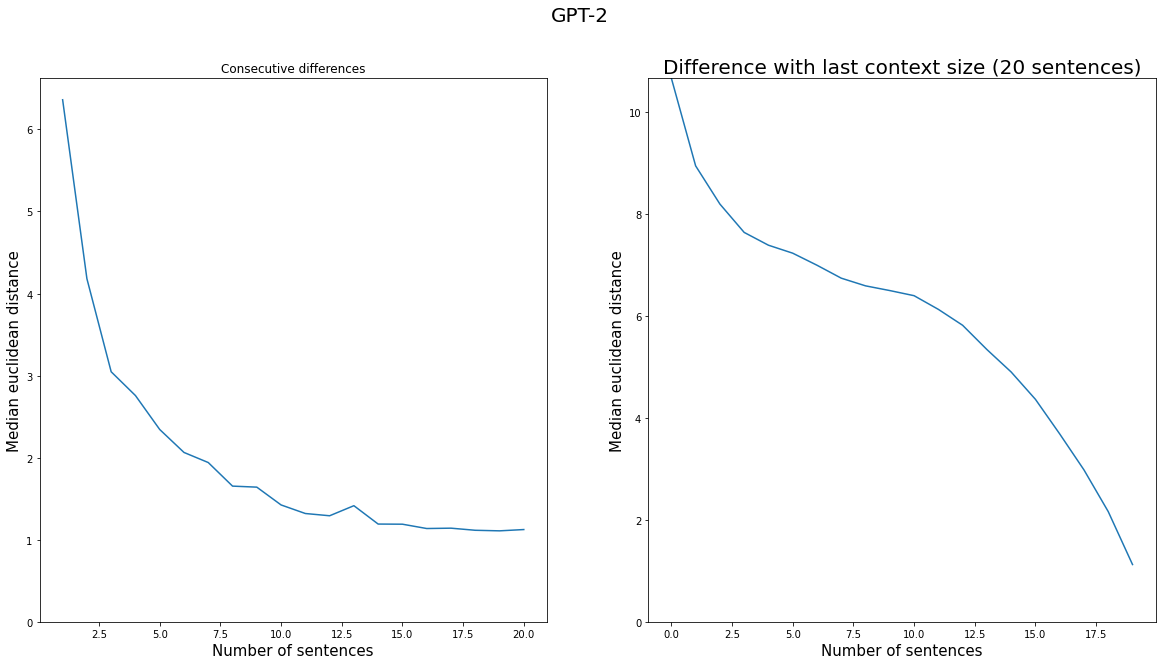

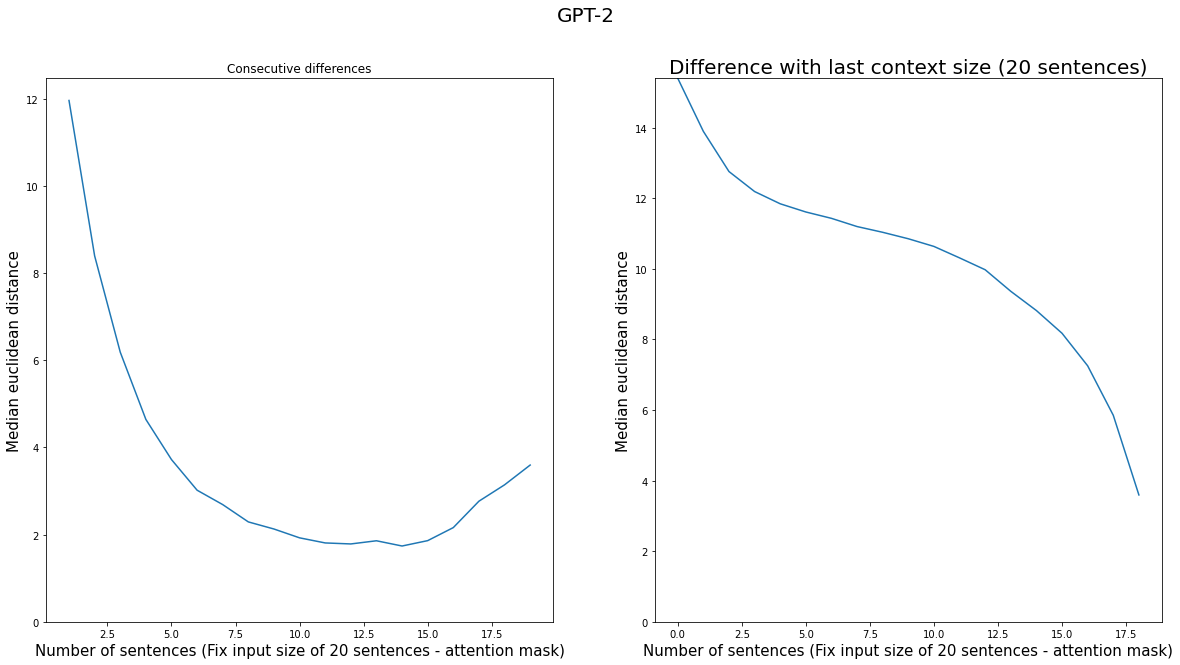

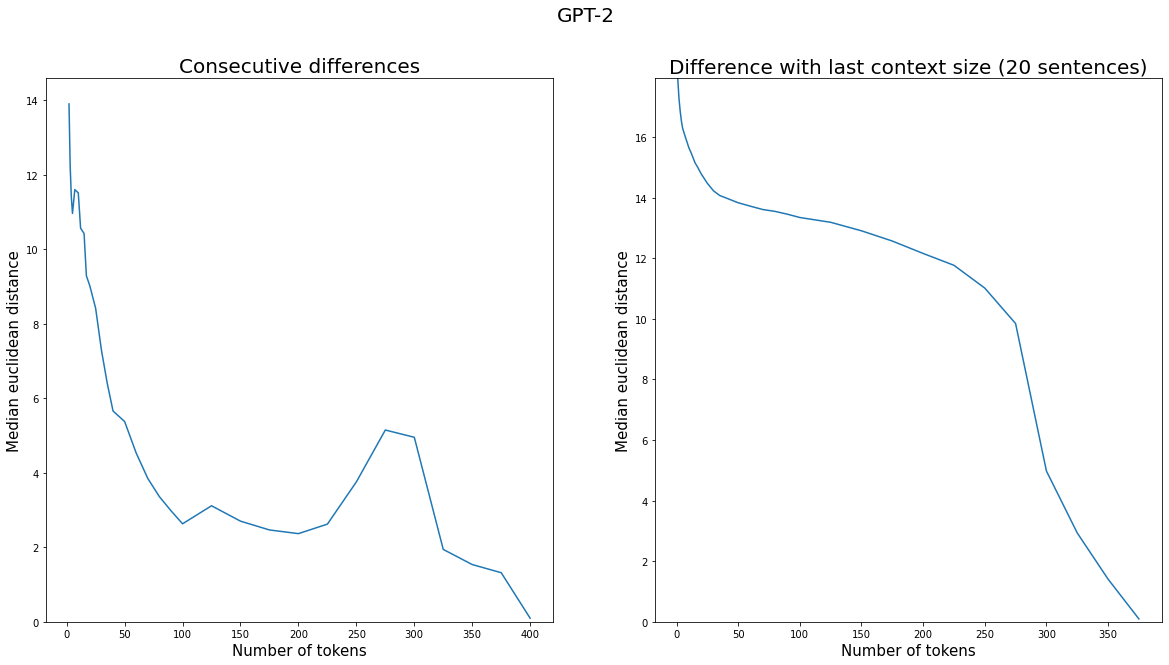

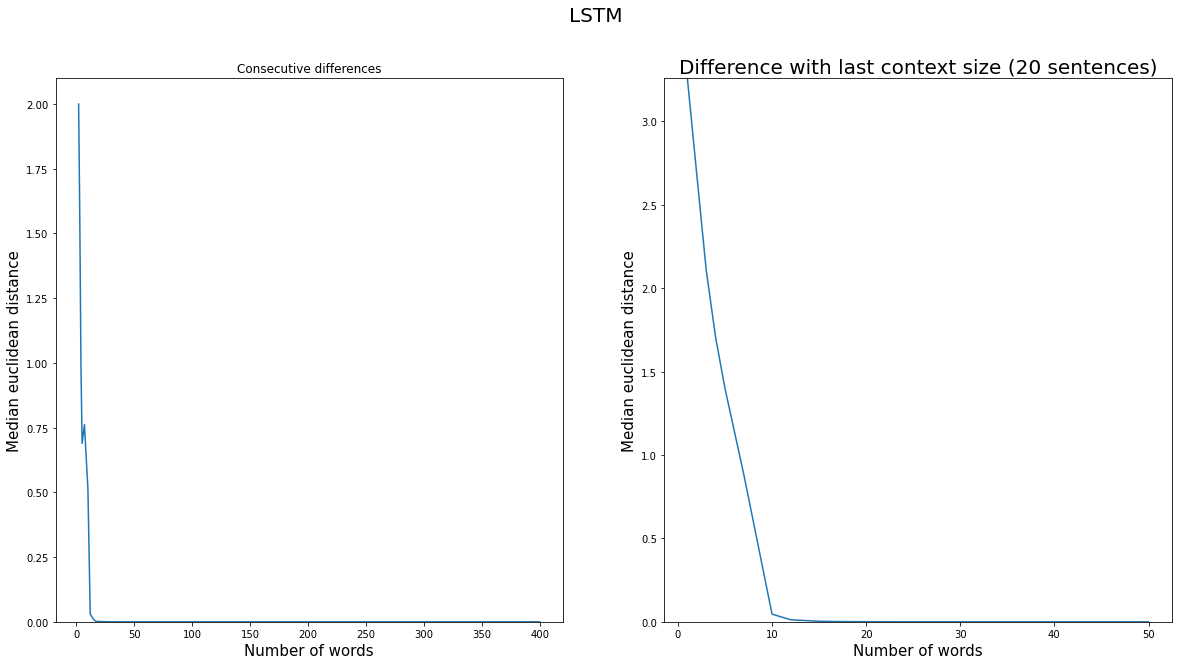

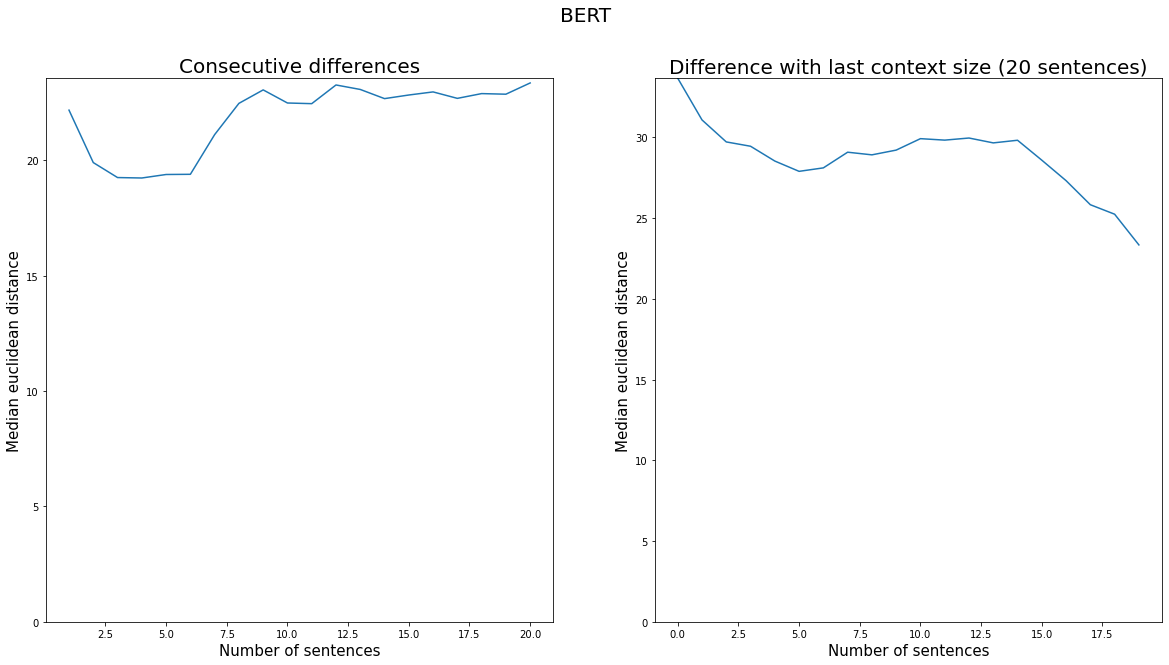

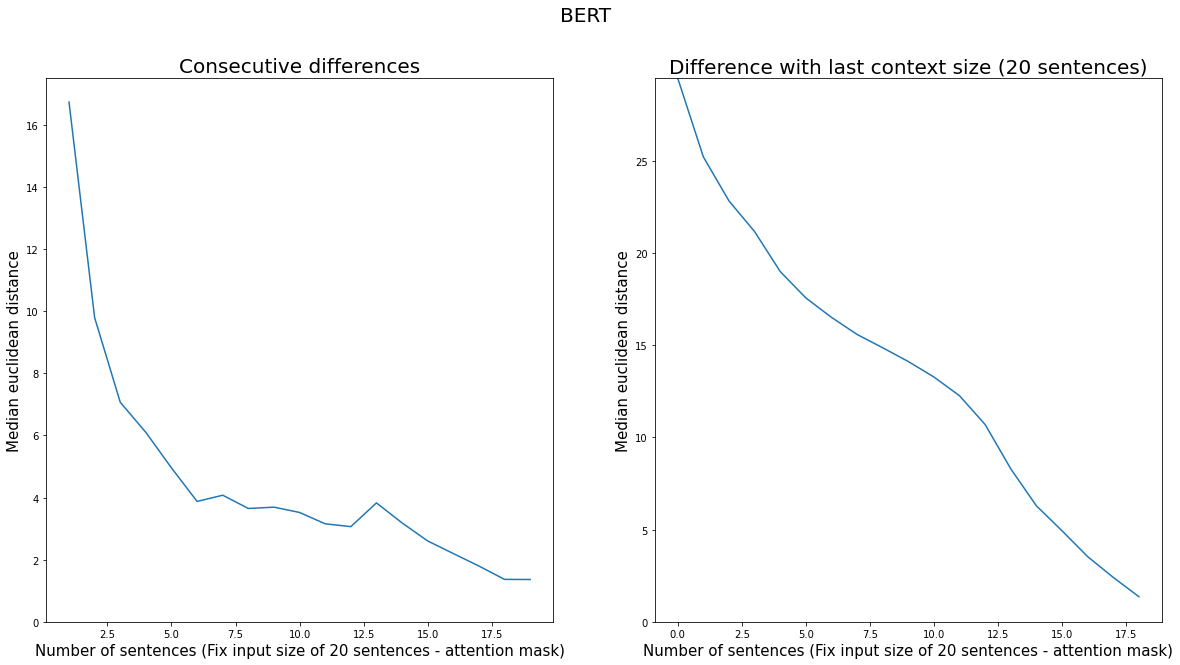

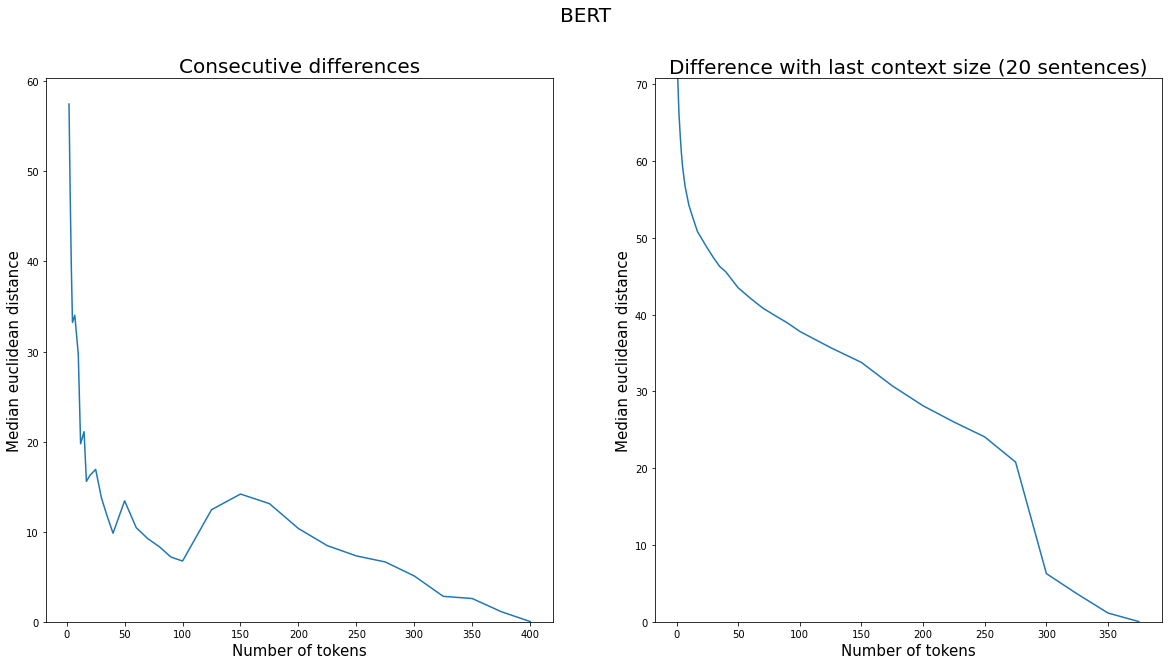

In [105]:
fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], np.median(np.stack(results_gpt2_sent, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences')
ax_array[0][0].set_xlabel('Number of sentences', fontsize=15)
ax_array[0][0].set_ylabel("Median euclidean distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_gpt2_sent_last, axis=0), axis=-1))))
ax_array[0][1].plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.median(np.stack(results_gpt2_sent_last, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of sentences', fontsize=15)
ax_array[0][1].set_ylabel("Median euclidean distance", fontsize=15)
fig.suptitle("GPT-2", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.median(np.stack(results_gpt2_sent_20_stop, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences')
ax_array[0][0].set_xlabel('Number of sentences (Fix input size of 20 sentences - attention mask)', fontsize=15)
ax_array[0][0].set_ylabel("Median euclidean distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_gpt2_sent_20_stop_last, axis=0), axis=-1))))
ax_array[0][1].plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], np.median(np.stack(results_gpt2_sent_20_stop_last, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of sentences (Fix input size of 20 sentences - attention mask)', fontsize=15)
ax_array[0][1].set_ylabel("Median euclidean distance", fontsize=15)
fig.suptitle("GPT-2", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400], np.median(np.stack(results_gpt2, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences', fontsize=20)
ax_array[0][0].set_xlabel('Number of tokens', fontsize=15)
ax_array[0][0].set_ylabel("Median euclidean distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_gpt2_last, axis=0), axis=-1))))
ax_array[0][1].plot([1, 2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375], np.median(np.stack(results_gpt2_last, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of tokens', fontsize=15)
ax_array[0][1].set_ylabel("Median euclidean distance", fontsize=15)
fig.suptitle("GPT-2", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50, 400], np.median(np.stack(results_lstm, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences')
ax_array[0][0].set_xlabel('Number of words', fontsize=15)
ax_array[0][0].set_ylabel("Median euclidean distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_lstm_last, axis=0), axis=-1))))
ax_array[0][1].plot([1, 2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50], np.median(np.stack(results_lstm_last, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of words', fontsize=15)
ax_array[0][1].set_ylabel("Median euclidean distance", fontsize=15)
fig.suptitle("LSTM", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], np.median(np.stack(results_bert_sent, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences', fontsize=20)
ax_array[0][0].set_xlabel('Number of sentences', fontsize=15)
ax_array[0][0].set_ylabel("Median euclidean distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_bert_sent_last, axis=0), axis=-1))))
ax_array[0][1].plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.median(np.stack(results_bert_sent_last, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of sentences', fontsize=15)
ax_array[0][1].set_ylabel("Median euclidean distance", fontsize=15)
fig.suptitle("BERT", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.median(np.stack(results_bert_sent_20_stop, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences', fontsize=20)
ax_array[0][0].set_xlabel('Number of sentences (Fix input size of 20 sentences - attention mask)', fontsize=15)
ax_array[0][0].set_ylabel("Median euclidean distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_bert_sent_20_stop_last, axis=0), axis=-1))))
ax_array[0][1].plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], np.median(np.stack(results_bert_sent_20_stop_last, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of sentences (Fix input size of 20 sentences - attention mask)', fontsize=15)
ax_array[0][1].set_ylabel("Median euclidean distance", fontsize=15)
fig.suptitle("BERT", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400], np.median(np.stack(results_bert, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences', fontsize=20)
ax_array[0][0].set_xlabel('Number of tokens', fontsize=15)
ax_array[0][0].set_ylabel("Median euclidean distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_bert_last, axis=0), axis=-1))))
ax_array[0][1].plot([1, 2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375], np.median(np.stack(results_bert_last, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of tokens', fontsize=15)
ax_array[0][1].set_ylabel("Median euclidean distance", fontsize=15)
fig.suptitle("BERT", fontsize=20)
plt.show()


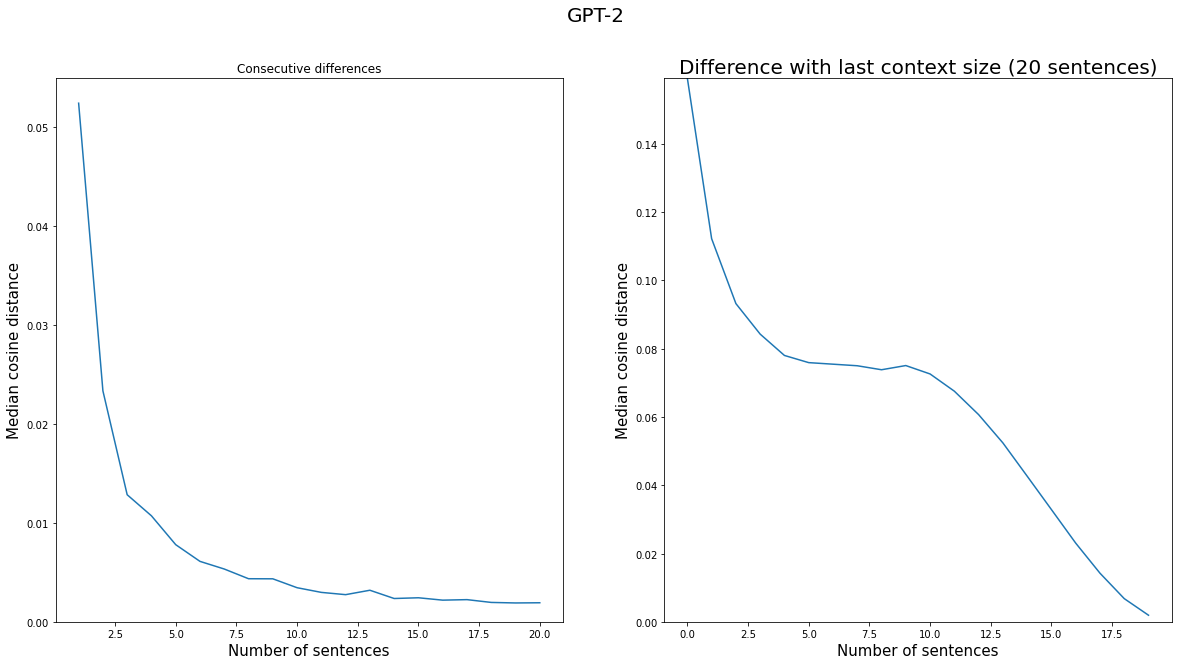

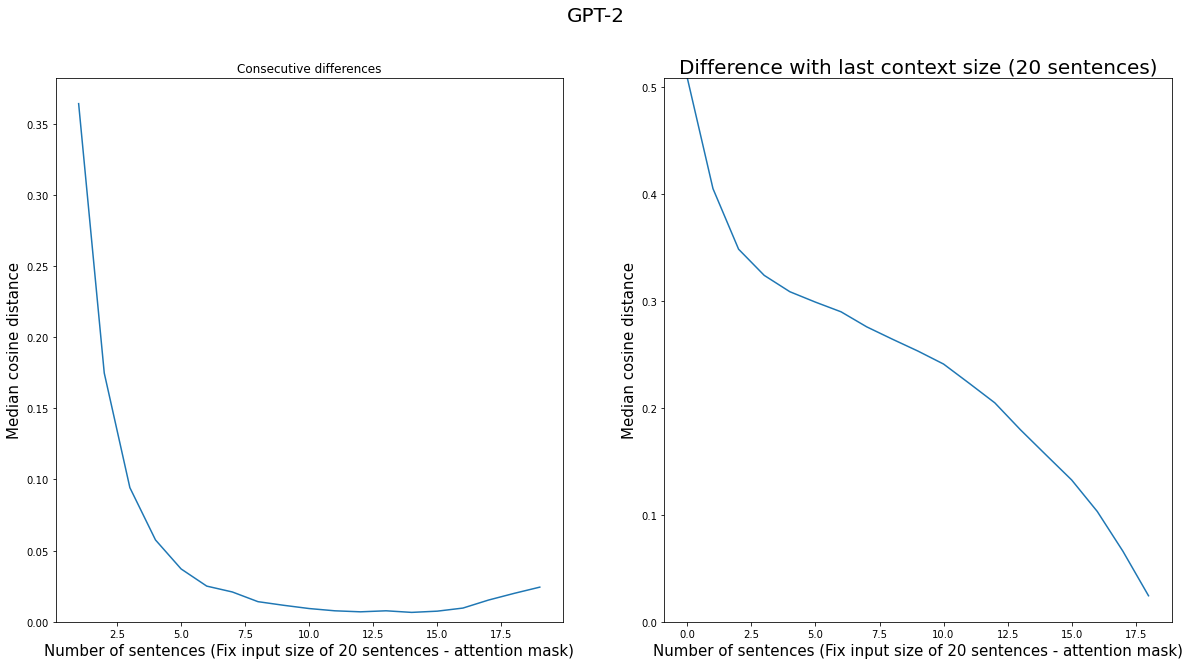

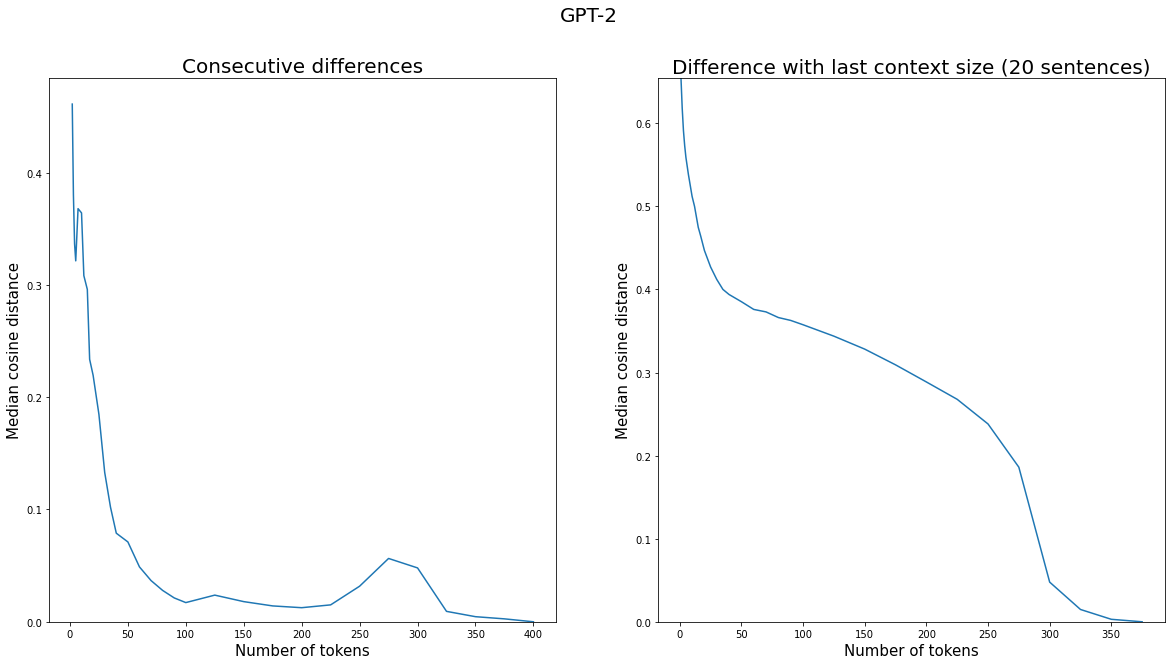

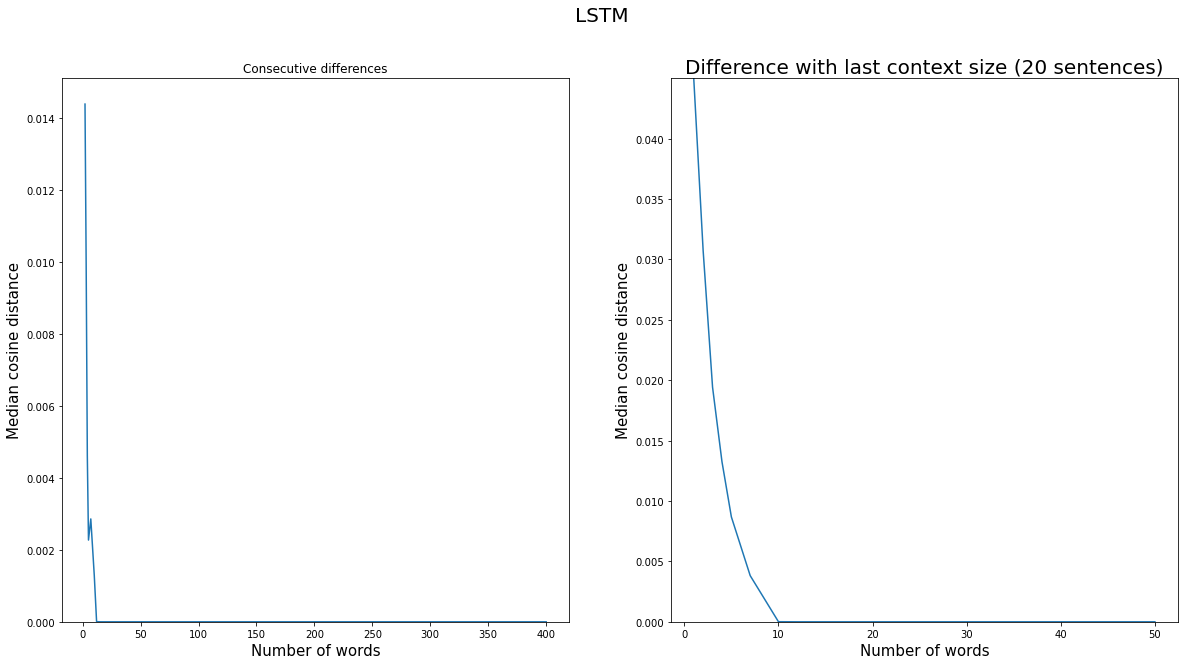

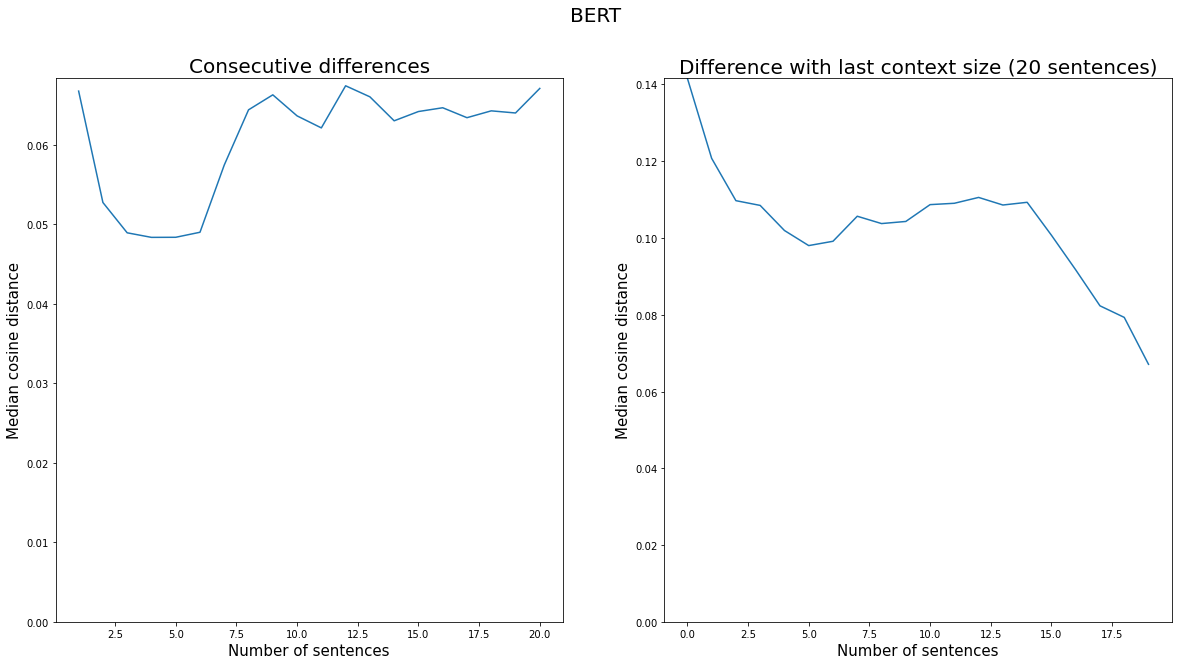

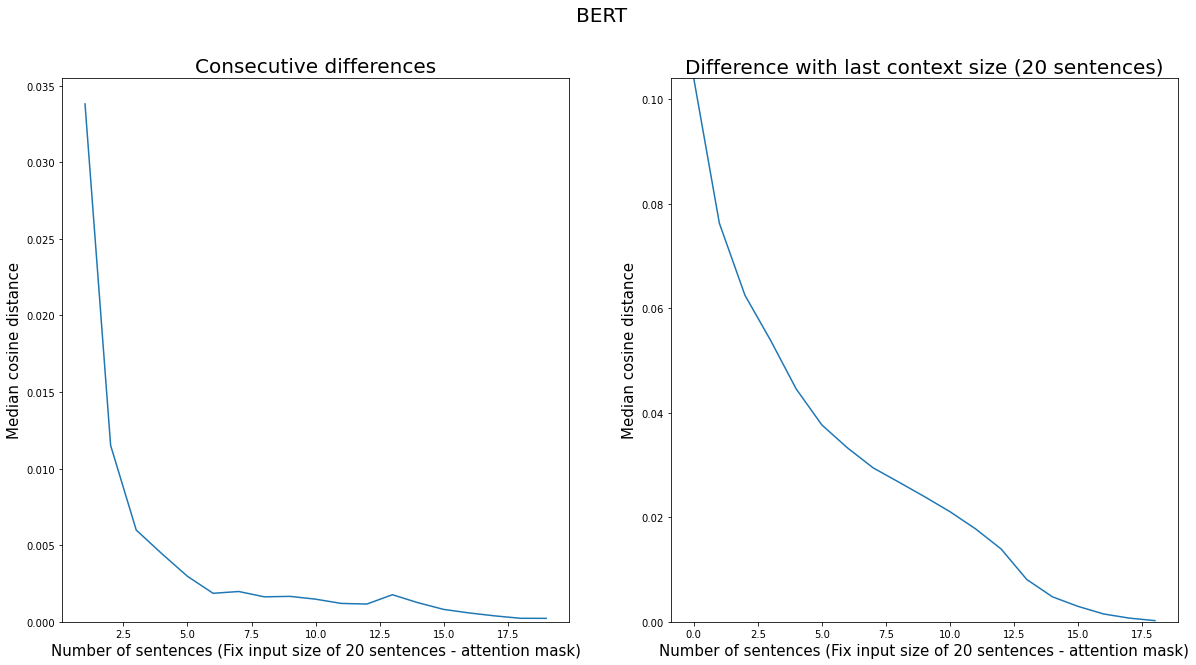

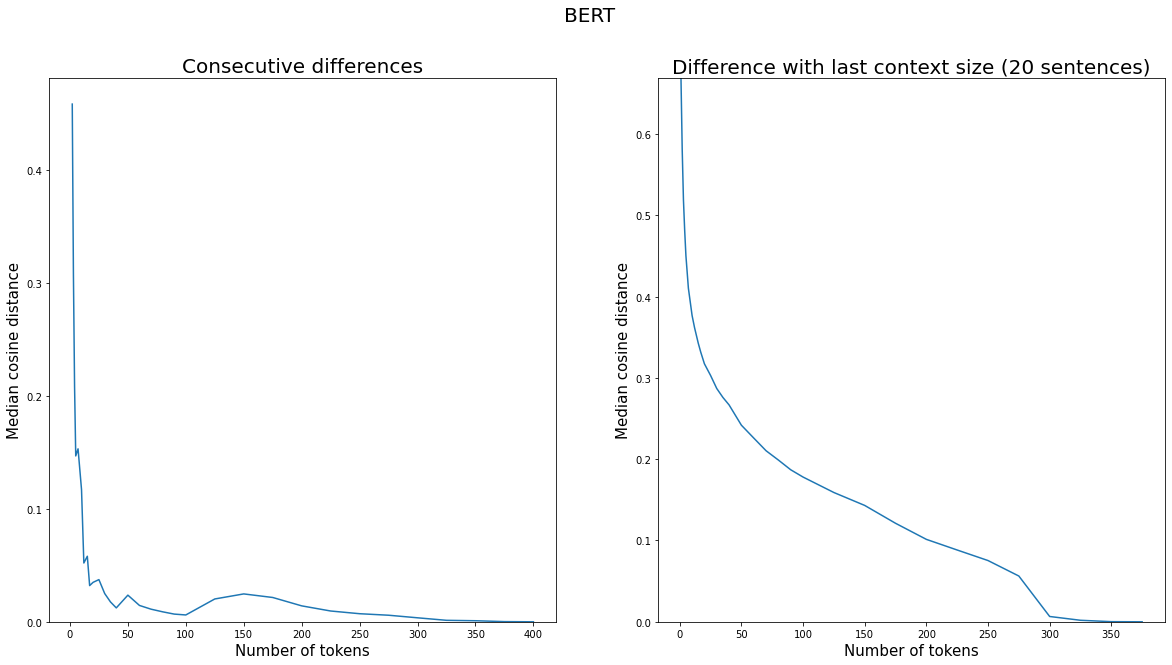

In [145]:
fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], np.median(np.stack(results_gpt2_sent_cos, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences')
ax_array[0][0].set_xlabel('Number of sentences', fontsize=15)
ax_array[0][0].set_ylabel("Median cosine distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_gpt2_sent_last_cos, axis=0), axis=-1))))
ax_array[0][1].plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.median(np.stack(results_gpt2_sent_last_cos, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of sentences', fontsize=15)
ax_array[0][1].set_ylabel("Median cosine distance", fontsize=15)
fig.suptitle("GPT-2", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.median(np.stack(results_gpt2_sent_20_stop_cos, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences')
ax_array[0][0].set_xlabel('Number of sentences (Fix input size of 20 sentences - attention mask)', fontsize=15)
ax_array[0][0].set_ylabel("Median cosine distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_gpt2_sent_20_stop_last_cos, axis=0), axis=-1))))
ax_array[0][1].plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], np.median(np.stack(results_gpt2_sent_20_stop_last_cos, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of sentences (Fix input size of 20 sentences - attention mask)', fontsize=15)
ax_array[0][1].set_ylabel("Median cosine distance", fontsize=15)
fig.suptitle("GPT-2", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400], np.median(np.stack(results_gpt2_cos, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences', fontsize=20)
ax_array[0][0].set_xlabel('Number of tokens', fontsize=15)
ax_array[0][0].set_ylabel("Median cosine distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_gpt2_last_cos, axis=0), axis=-1))))
ax_array[0][1].plot([1, 2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375], np.median(np.stack(results_gpt2_last_cos, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of tokens', fontsize=15)
ax_array[0][1].set_ylabel("Median cosine distance", fontsize=15)
fig.suptitle("GPT-2", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50, 400], np.median(np.stack(results_lstm_cos, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences')
ax_array[0][0].set_xlabel('Number of words', fontsize=15)
ax_array[0][0].set_ylabel("Median cosine distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_lstm_last_cos, axis=0), axis=-1))))
ax_array[0][1].plot([1, 2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50], np.median(np.stack(results_lstm_last_cos, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of words', fontsize=15)
ax_array[0][1].set_ylabel("Median cosine distance", fontsize=15)
fig.suptitle("LSTM", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], np.median(np.stack(results_bert_sent_cos, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences', fontsize=20)
ax_array[0][0].set_xlabel('Number of sentences', fontsize=15)
ax_array[0][0].set_ylabel("Median cosine distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_bert_sent_last_cos, axis=0), axis=-1))))
ax_array[0][1].plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.median(np.stack(results_bert_sent_last_cos, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of sentences', fontsize=15)
ax_array[0][1].set_ylabel("Median cosine distance", fontsize=15)
fig.suptitle("BERT", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.median(np.stack(results_bert_sent_20_stop_cos, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences', fontsize=20)
ax_array[0][0].set_xlabel('Number of sentences (Fix input size of 20 sentences - attention mask)', fontsize=15)
ax_array[0][0].set_ylabel("Median cosine distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_bert_sent_20_stop_last_cos, axis=0), axis=-1))))
ax_array[0][1].plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], np.median(np.stack(results_bert_sent_20_stop_last_cos, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of sentences (Fix input size of 20 sentences - attention mask)', fontsize=15)
ax_array[0][1].set_ylabel("Median cosine distance", fontsize=15)
fig.suptitle("BERT", fontsize=20)
plt.show()

fig, ax_array = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
ax_array[0][0].plot([2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400], np.median(np.stack(results_bert_cos, axis=0), axis=-1))
ax_array[0][0].set_title('Consecutive differences', fontsize=20)
ax_array[0][0].set_xlabel('Number of tokens', fontsize=15)
ax_array[0][0].set_ylabel("Median cosine distance", fontsize=15)
ax_array[0][0].set_ylim((0, None))
ax_array[0][1].set_ylim((0, np.max(np.median(np.stack(results_bert_last_cos, axis=0), axis=-1))))
ax_array[0][1].plot([1, 2, 3, 4, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375], np.median(np.stack(results_bert_last_cos, axis=0), axis=-1))
ax_array[0][1].set_title("Difference with last context size (20 sentences)", fontsize=20)
ax_array[0][1].set_xlabel('Number of tokens', fontsize=15)
ax_array[0][1].set_ylabel("Median cosine distance", fontsize=15)
fig.suptitle("BERT", fontsize=20)
plt.show()


### Single model surface plots

In [ ]:
paths = {}
data_model = {}
for name in model_names:
    name = name.replace('_{}', '')
    data_model[name] = []
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths[name] = reporting.fetch_map(path, 'Pearson_coeff_group_fdr_effect')[0]


for index_model, name in enumerate(model_names):
    saving_path = os.path.dirname(paths[name])
    print("#"*10, name, "#"*10)
    reporting.plot_img_surf(paths[name], saving_path=None, plot_name=name+'_surf', inflated=False, vmax=0.01, **kwargs)


### Group level analysis on maps difference

In [149]:
comparisons = {
    'BERT-cased_vs_DistilBERT-cased' : ['bert-base-cased_pre-2_1_post-0_norm-None_norm-inf_{}_hidden-all-layers_pca_300', 'distilbert-base-cased_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300'],
    'BERT-uncased_vs_BERT-cased' : ['bert-base-uncased_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300', 'bert-base-cased_pre-2_1_post-0_norm-None_norm-inf_{}_hidden-all-layers_pca_300'],
    'BERT-uncased_vs_ROBERTA' : ['bert-base-uncased_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300', 'roberta-base_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300'],
    'ROBERTA_vs_DistilROBERTA' : ['roberta-base_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300', 'distilroberta_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300'],
    'GPT2_vs_DistilGPT2' : ['gpt2_pre-20_1_norm-inf_norm-inf_{}_hidden-all-layers_pca_300', 'distilgpt2_pre-20_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300'],
    'BERT-uncased_vs_ALBERT' : ['bert-base-uncased_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300', 'albert-base-v2_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300'],
    'BERT-uncased_vs_GPT2' : ['bert-base-uncased_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300', 'gpt2_pre-20_1_norm-inf_norm-inf_{}_hidden-all-layers_pca_300'],
    'BERT-uncased_vs_LSTM' : ['bert-base-uncased_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-hidden-layers'],
    'BERT-uncased_vs_GLOVE' : ['bert-base-uncased_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_{}_hidden-all-layers_pca_300', 'glove_wiki_300_{}'],
    'GPT2_vs_LSTM' : ['gpt2_pre-20_1_norm-inf_norm-inf_{}_hidden-all-layers_pca_300', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-hidden-layers'],
    'GPT2_vs_GLOVE' : ['gpt2_pre-20_1_norm-inf_norm-inf_{}_hidden-all-layers_pca_300', 'glove_wiki_300_{}'],
    'LSTM_vs_GLOVE' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-hidden-layers', 'glove_wiki_300_{}'],
}

In [150]:

masks = Parallel(n_jobs=-2)(delayed(reporting.compute_model_contrasts_t_test)(
    data_full[comparisons[comparison][0].replace('_{}', '')]['Pearson_coeff'],
    data_full[comparisons[comparison][1].replace('_{}', '')]['Pearson_coeff'],
    comparison.split('_vs_')[0], 
    comparison.split('_vs_')[1], 
    analysis_name='',
    observed_data='Pearson_coeff',
    language='english',
    smoothing_fwhm=6,
    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    
                                        
) for comparison in comparisons)


KeyError: 'bert-base-cased_pre-2_1_post-0_norm-None_norm-inf_hidden-all-layers_pca_300'

In [71]:
import matplotlib
import seaborn as sns
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colorbar import ColorbarBase
from matplotlib import colors
#Here we import internal nilearn functions, YOLO!
from nilearn._utils.niimg import _safe_get_data
from nilearn.plotting.img_plotting import _get_colorbar_and_data_ranges

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colorbar import ColorbarBase, make_axes


COLORS_PLUS = plt.cm.autumn(np.linspace(0., 1, 128))
COLORS_MINUS = plt.cm.winter(np.linspace(0, 1, 128))
COLORS = np.vstack((COLORS_MINUS, COLORS_PLUS[::-1]))
MYMAP = mcolors.LinearSegmentedColormap.from_list('my_colormap', COLORS)


In [29]:
view = 'left' #left
kwargs = {
    'surf_mesh': f'pial_{view}', # pial_right, infl_left, infl_right
    'surf_mesh_type': f'pial_{view}',
    'hemi': view, # right
    'view':'lateral', # medial
    'bg_map': f'sulc_{view}', # sulc_right
    'bg_on_data':True,
    'darkness':.8,
    'axes':None, 
    'figure':None
}

########## BERT-cased_vs_DistilBERT-cased ##########


ValueError: 'right' is not a valid value for position; supported values are 'top', 'bottom'

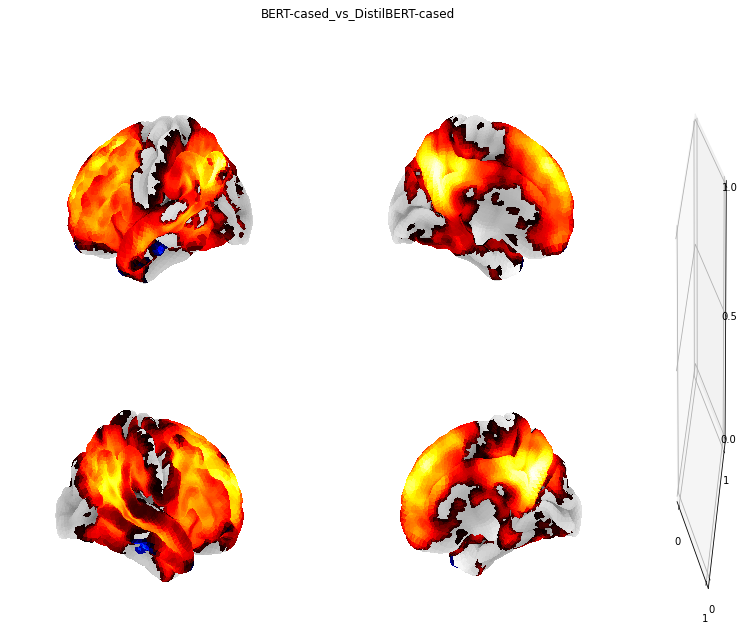

In [94]:
paths = {}
data_model_comparison = {}
for comparison in comparisons:
    names = comparison.split('_vs_')
    name = '{}-vs-{}'.format(names[0], names[1])
    data_model_comparison[name] = []
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths[comparison] = reporting.fetch_map(path, 'Pearson_coeff_group_fdr_effect')[0]


for index_comp, comparison in enumerate(comparisons):
    saving_path = os.path.dirname(paths[comparison])
    print("#"*10, comparison, "#"*10)
    #plot_img_surf(paths[comparison], mask=masks[index_comp], saving_path=None, plot_name=comparison+'_surf', inflated=False, vmax=None, **kwargs)
    multi_plot(
        data=paths[comparison], 
        mask=masks[index_comp],
        plot_name=comparison+'_surf', 
        saving_path=None, 
        return_plot=True, 
        inflated=False,
        suptitle=comparison,
        **kwargs)

In [118]:
def plot_img_surf(surf_img, saving_path, plot_name, mask=None, inflated=False, compute_surf=True, vmax=None, threshold=1e-10, return_plot=False, **kwargs):
    fsaverage = datasets.fetch_surf_fsaverage()
    if compute_surf:
        surf_img = vol_to_surf(surf_img, fsaverage[kwargs['surf_mesh']], mask_img=mask)
        surf_img[np.isnan(surf_img)] = 0
    if inflated:
        kwargs['surf_mesh'] = 'infl_left' if 'left' in kwargs['surf_mesh_type'] else 'infl_right' 
    disp = plotting.plot_surf_stat_map(
                        surf_mesh=fsaverage[kwargs['surf_mesh']], 
                        stat_map=surf_img,
                        hemi=kwargs['hemi'], 
                        view=kwargs['view'],
                        bg_map=fsaverage[kwargs['bg_map']], 
                        #bg_on_data=kwargs['bg_on_data'],
                        darkness=kwargs['darkness'],
                        vmax=vmax,
                        colorbar=False,
                        threshold=threshold,
                        symmetric_cbar=False,
                        axes=kwargs['axes'],
                        figure=kwargs['figure'],
                        bbox_inches='tight'
    )
    if saving_path is not None:
        disp.savefig(saving_path + plot_name + '_{}_{}_{}.png'.format(kwargs['surf_mesh_type'], kwargs['hemi'], kwargs['view']))
    if return_plot:
        return disp
    else:
        plotting.show()

In [130]:
def _draw_colorbar(colorbar_ax, vmax, offset=4.):
    our_cmap = plotting.cm.cold_hot
    nb_ticks = 5
    #ticks = np.linspace(-vmax, vmax, nb_ticks)
    bounds = np.linspace(-vmax, vmax, our_cmap.N)
    norm = colors.Normalize(vmin=-vmax, vmax=vmax)
    #scalarMap = cmx.ScalarMappable(norm=norm, cmap=our_cmap)
    # some colormap hacking
    #cmaplist = [our_cmap(i) for i in range(our_cmap.N)]
    #istart = int(norm(-offset, clip=True) * (our_cmap.N - 1))
    #istop = int(norm(offset, clip=True) * (our_cmap.N - 1))
    #for i in range(istart, istop):
    #    cmaplist[i] = (0.5, 0.5, 0.5, 1.)  # just an average gray color
    #our_cmap = our_cmap.from_list('Custom cmap', cmaplist, our_cmap.N)

    ColorbarBase(
        colorbar_ax, norm=norm,  #ticks=ticks,
        orientation='vertical', cmap=our_cmap, boundaries=bounds,
        spacing='proportional', format='%.2g')
    #colorbar_ax.yaxis.tick_left()
    #tick_color = 'w'
    #for tick in colorbar_ax.yaxis.get_ticklabels():
    #    tick.set_color(tick_color)
    #colorbar_ax.yaxis.set_tick_params(width=0)

    
#fig, ax = plt.subplots()
#ax.scatter(np.random.random(100), np.random.random(100))
#ax.set_axis_off()
#fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
#fig
#image = plt.imread(dic["filename"])
#    x0 = dic["annotations"][i]["x"]
#    y0 = dic["annotations"][i]["y"]
#    width = dic["annotations"][i]["width"]
#    height = dic["annotations"][i]["height"]
#    return image[y0:y0+height , x0:x0+width, :]

In [140]:

def multi_plot(
    data, 
    mask,
    plot_name, 
    saving_path, 
    inflated=False,
    return_plot=True, 
    vmax=None,
    suptitle='',
    **kwargs
    ):
    """Plots all 4 surface views.
    """
    #plot_img_surf(data, mask=mask, saving_path=saving_path, plot_name=comparison+'_surf', inflated=inflated, vmax=vmax, **kwargs)
    check_folder(saving_path)

    plt.close('all')
    fig1 = plt.figure(figsize=(15,10))
    gs = fig1.add_gridspec(2, 3, width_ratios=[47.5, 47.5, 5])
    
    ax1 = fig1.add_subplot(gs[0, 0], projection= '3d')
    ax2 = fig1.add_subplot(gs[0, 1], projection= '3d')
    ax3 = fig1.add_subplot(gs[1, 0], projection= '3d')
    ax4 = fig1.add_subplot(gs[1, 1], projection= '3d')
    ax5 = fig1.add_subplot(gs[:, 2])
    
    view = 'left' #left
    kwargs = {
        'surf_mesh': f'pial_{view}', # pial_right, infl_left, infl_right
        'surf_mesh_type': f'pial_{view}',
        'hemi': view, # right
        'view':'lateral', # medial
        'bg_map': f'sulc_{view}', # sulc_right
        'bg_on_data':True,
        'darkness':.9,
        'axes': ax1,
        'figure': fig1
    }
    plot_img_surf(data, mask=mask, saving_path=saving_path, plot_name=plot_name+'_surf', inflated=inflated, vmax=vmax, return_plot=return_plot, **kwargs)
    view = 'left' #left
    kwargs = {
        'surf_mesh': f'pial_{view}', # pial_right, infl_left, infl_right
        'surf_mesh_type': f'pial_{view}',
        'hemi': view, # right
        'view':'medial', # medial
        'bg_map': f'sulc_{view}', # sulc_right
        'bg_on_data':True,
        'darkness':.9,
        'axes': ax2,
        'figure': fig1
    }
    plot_img_surf(data, mask=mask, saving_path=saving_path, plot_name=plot_name+'_surf', inflated=inflated, vmax=vmax, return_plot=return_plot, **kwargs)
    view = 'right' #left
    kwargs = {
        'surf_mesh': f'pial_{view}', # pial_right, infl_left, infl_right
        'surf_mesh_type': f'pial_{view}',
        'hemi': view, # right
        'view':'lateral', # medial
        'bg_map': f'sulc_{view}', # sulc_right
        'bg_on_data':True,
        'darkness':.9,
        'axes': ax3,
        'figure': fig1
    }
    plot_img_surf(data, mask=mask, saving_path=saving_path, plot_name=plot_name+'_surf', inflated=inflated, vmax=vmax, return_plot=return_plot, **kwargs)
    view = 'right' #left
    kwargs = {
        'surf_mesh': f'pial_{view}', # pial_right, infl_left, infl_right
        'surf_mesh_type': f'pial_{view}',
        'hemi': view, # right
        'view':'medial', # medial
        'bg_map': f'sulc_{view}', # sulc_right
        'bg_on_data':True,
        'darkness':.9,
        'axes': ax4,
        'figure': fig1
    }
    plot_img_surf(data, mask=mask, saving_path=saving_path, plot_name=plot_name+'_surf', inflated=inflated, vmax=vmax, return_plot=return_plot, **kwargs)
    plt.suptitle(suptitle)
    vmax = np.max(nib.load(data).get_data()) #0.06 #
    _draw_colorbar(ax5, vmax=vmax)
    #cmap = matplotlib.cm.cool
    #vmax = 0.05
    #norm = matplotlib.colors.Normalize(vmin=-vmax, vmax=vmax)

    #cb1 = matplotlib.colorbar.ColorbarBase(ax5, cmap=cmap, ticklocation='right',
    #                                norm=norm,
    #                                orientation='vertical')
    #plt.savefig(os.path.join(save_in, name+'.png'))
    plt.subplots_adjust(wspace=0., hspace=0.)
    plt.show()
    #plt.close('all')

########## distilbert-base-cased_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_hidden-all-layers_pca_300 ##########


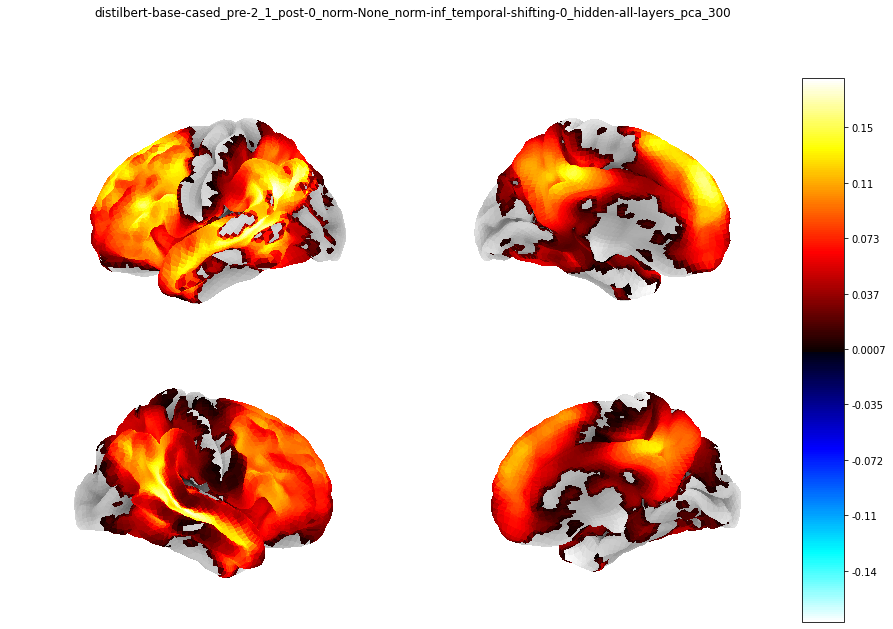

########## distilroberta_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_hidden-all-layers_pca_300 ##########


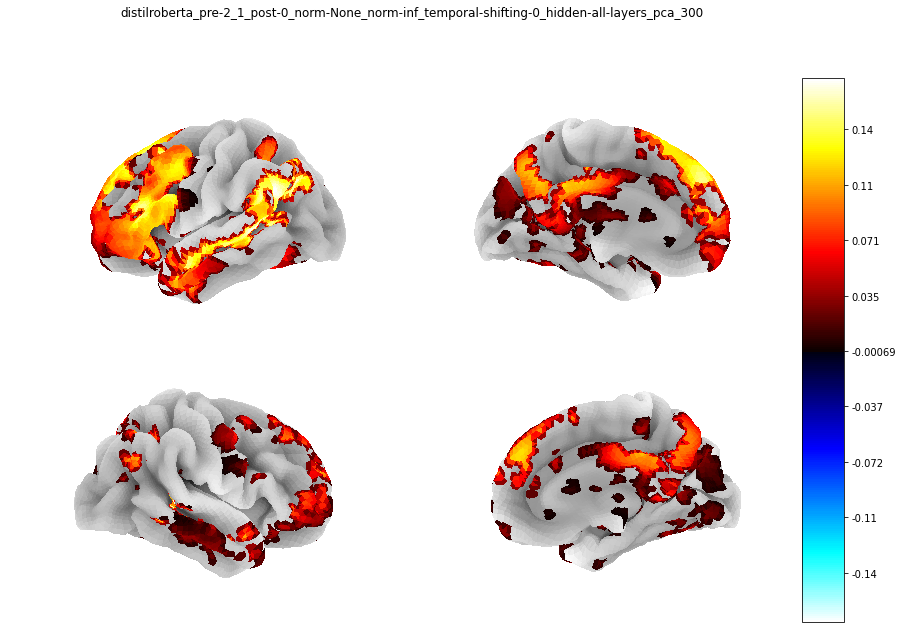

########## bert-base-uncased_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_hidden-all-layers_pca_300 ##########


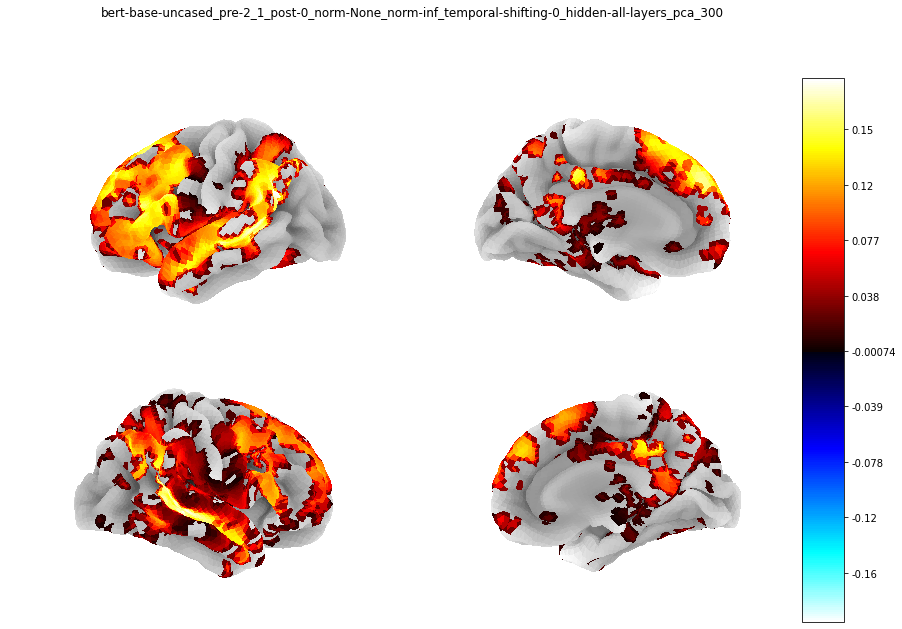

########## bert-base-cased_pre-2_1_post-0_norm-None_norm-inf_hidden-all-layers_pca_300 ##########


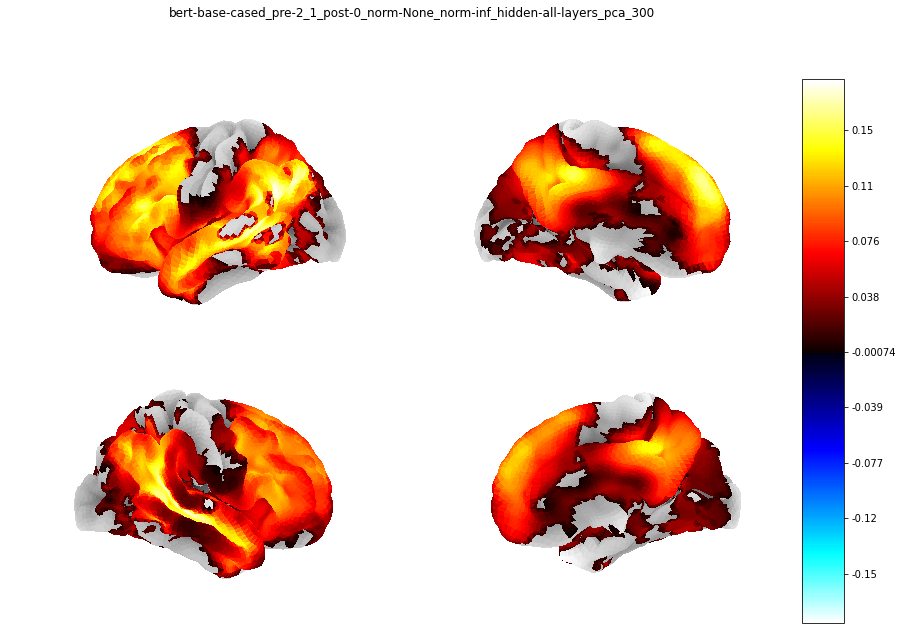

########## albert-base-v2_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_hidden-all-layers_pca_300 ##########


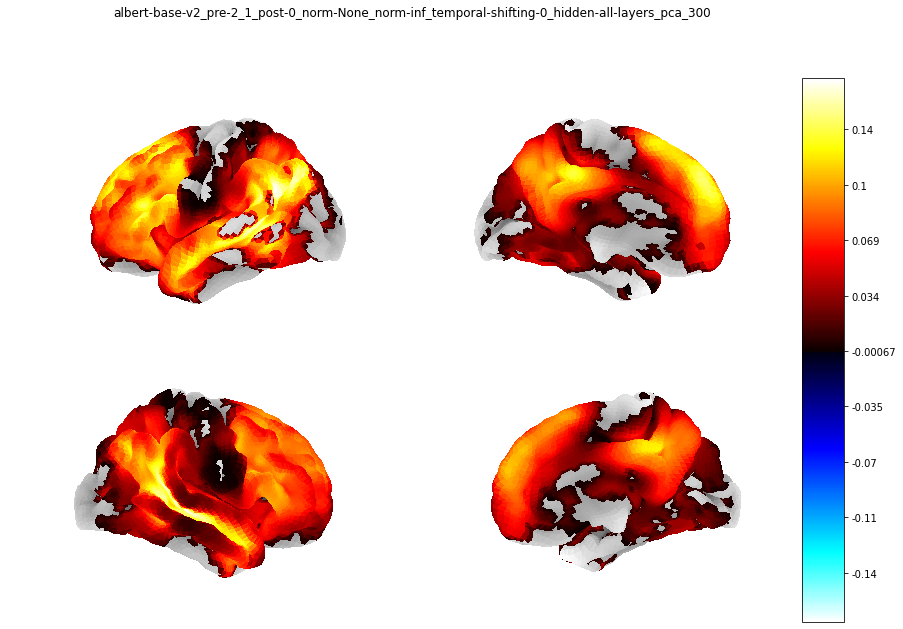

########## roberta-base_pre-2_1_post-0_norm-None_norm-inf_temporal-shifting-0_hidden-all-layers_pca_300 ##########


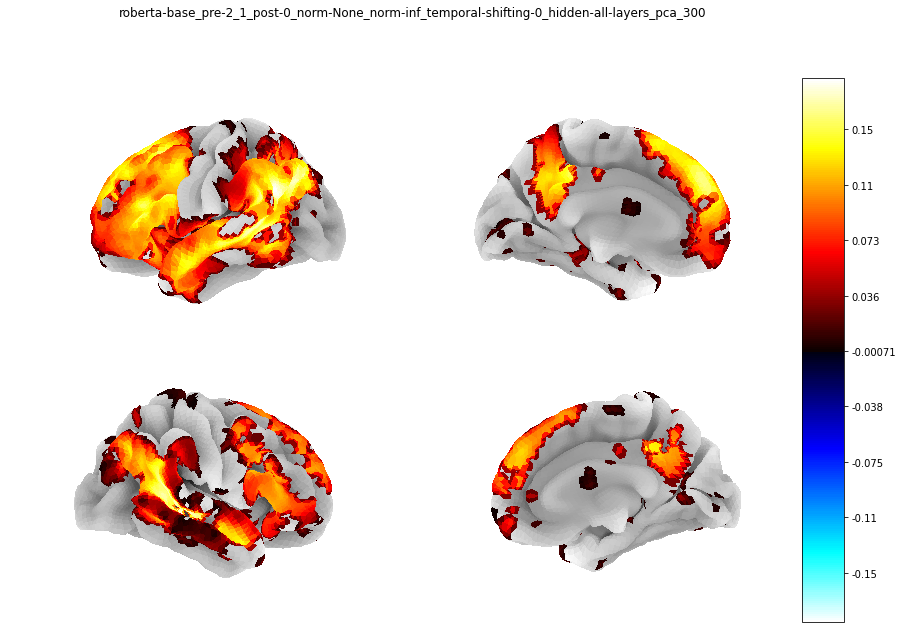

########## gpt2_pre-20_1_norm-inf_norm-inf_hidden-all-layers_pca_300 ##########


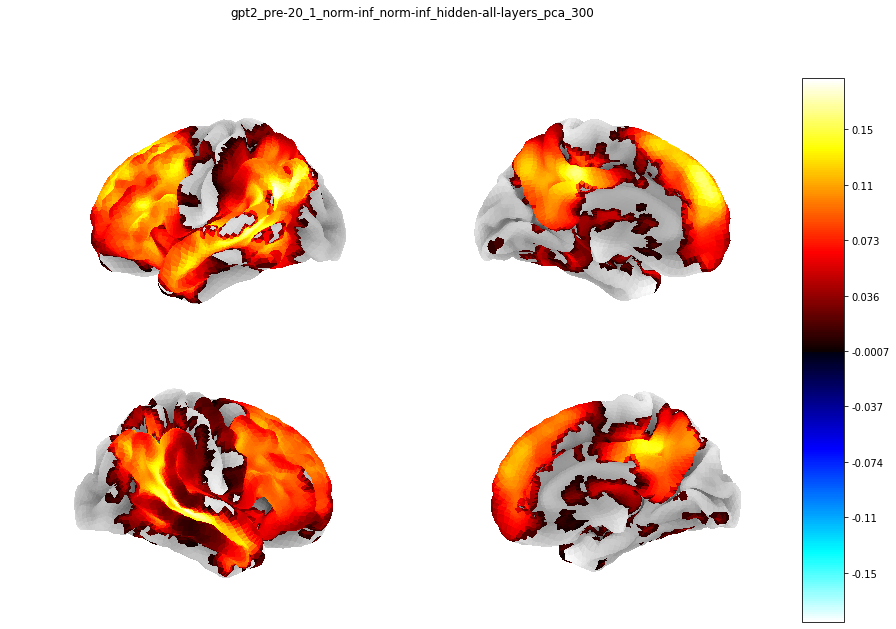

########## glove_wiki_300 ##########


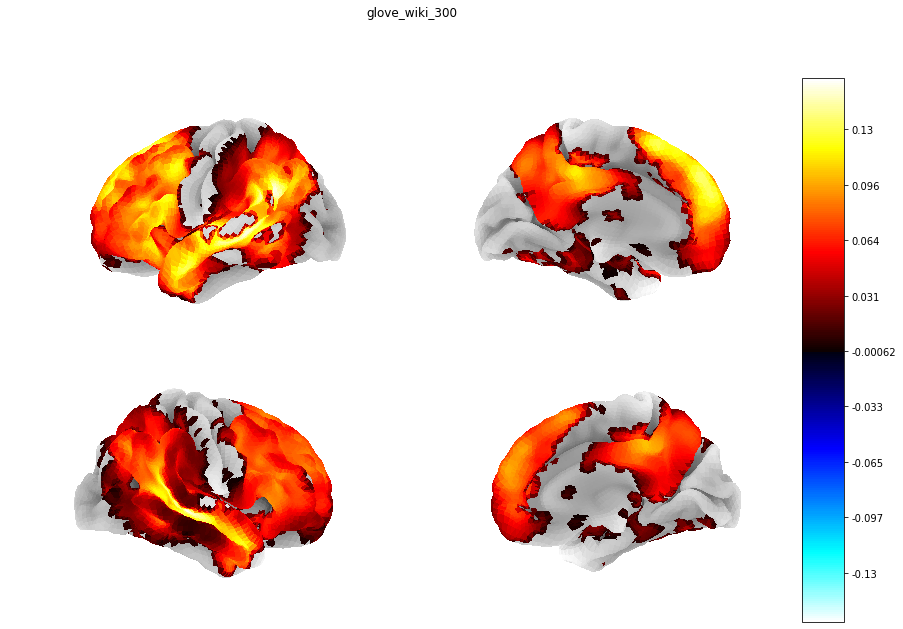

########## LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers ##########


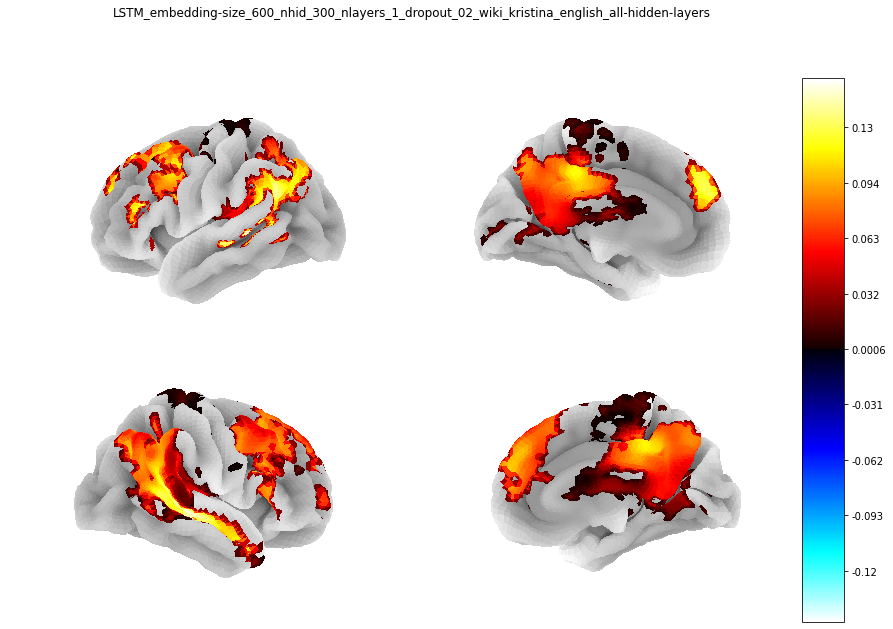

########## gpt2_pre-20_1_norm-inf_norm-inf_hidden-all-layers_pca_300 ##########


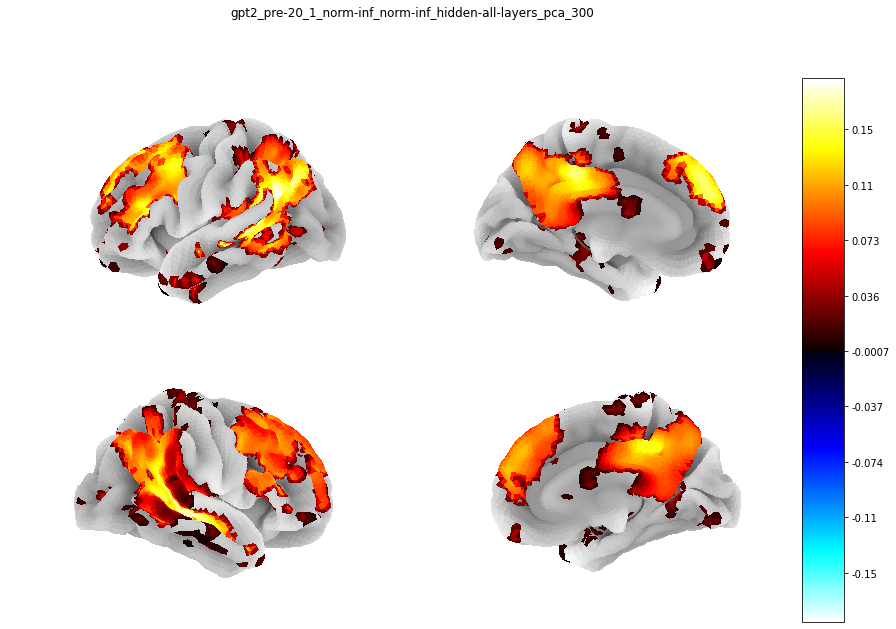

In [141]:
paths = {}
data_model_comparison = {}
for name in model_names:
    name = name.replace('_{}', '')
    data_model_comparison[name] = []
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths[name] = reporting.fetch_map(path, 'Pearson_coeff_group_fdr_effect')[0]


for index_comp, name in enumerate(model_names):
    name = name.replace('_{}', '')
    #saving_path = os.path.dirname(paths[name])
    print("#"*10, name, "#"*10)
    multi_plot(
        data=paths[name], 
        mask=masks[index_comp],
        plot_name=name+'_surf', 
        saving_path=None, 
        return_plot=True, 
        inflated=False,
        suptitle=name,
        **kwargs)

########## BERT-cased_vs_DistilBERT-cased ##########


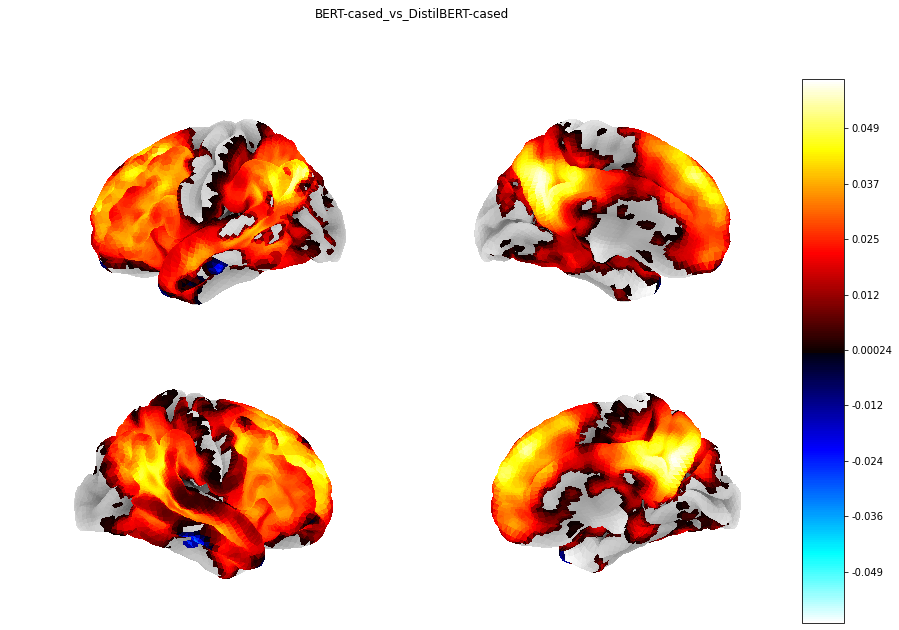

########## BERT-uncased_vs_BERT-cased ##########


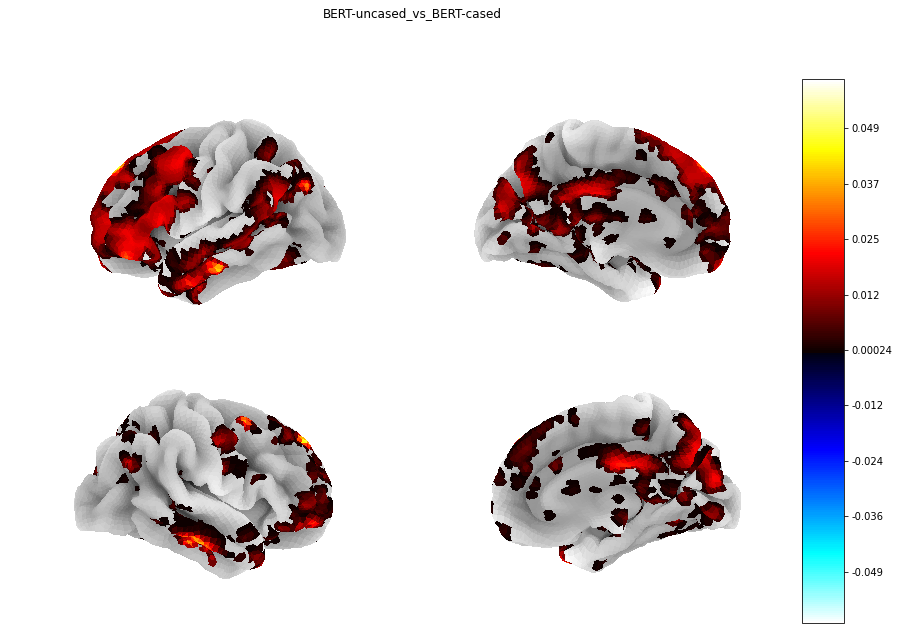

########## BERT-uncased_vs_ROBERTA ##########


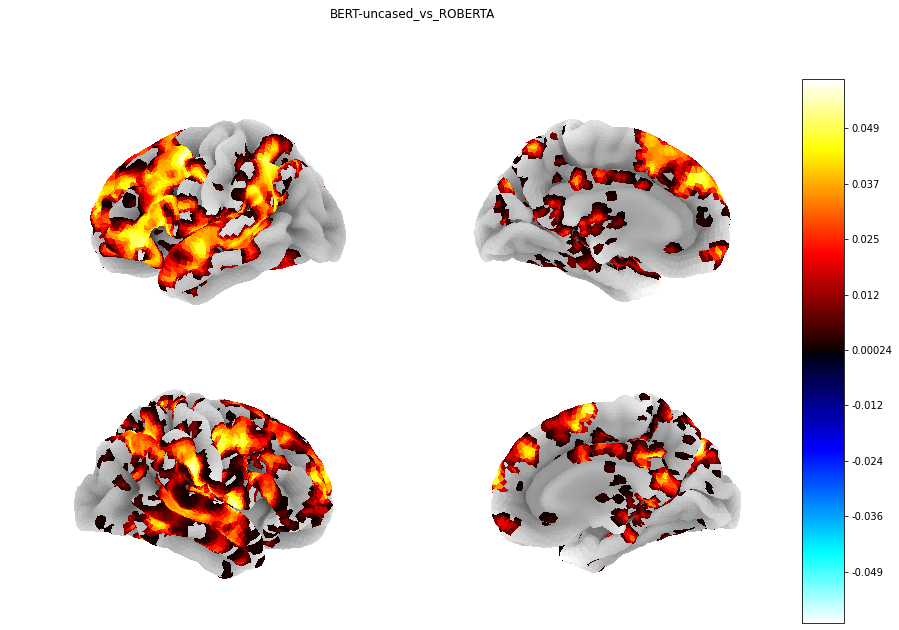

########## ROBERTA_vs_DistilROBERTA ##########


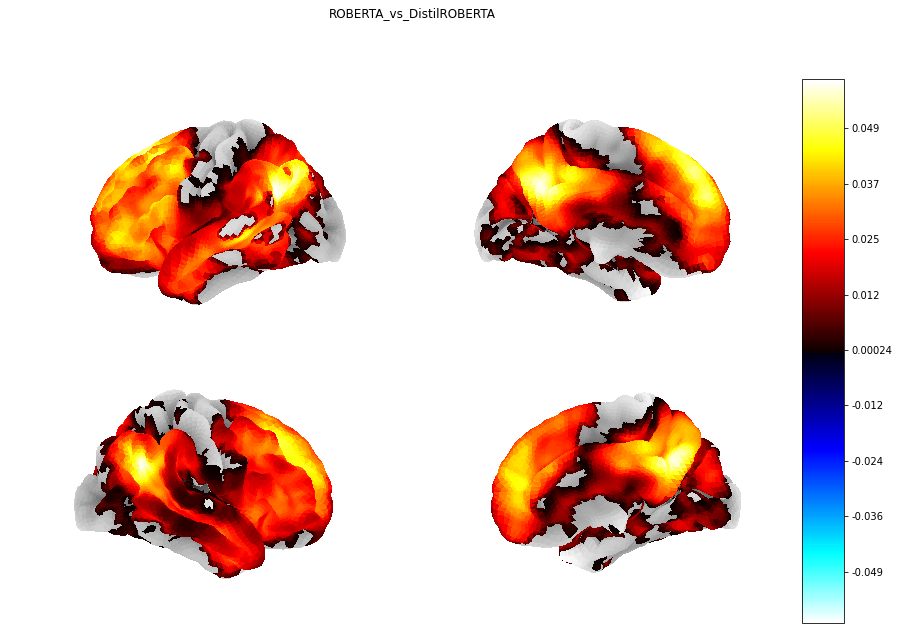

########## BERT-uncased_vs_ALBERT ##########


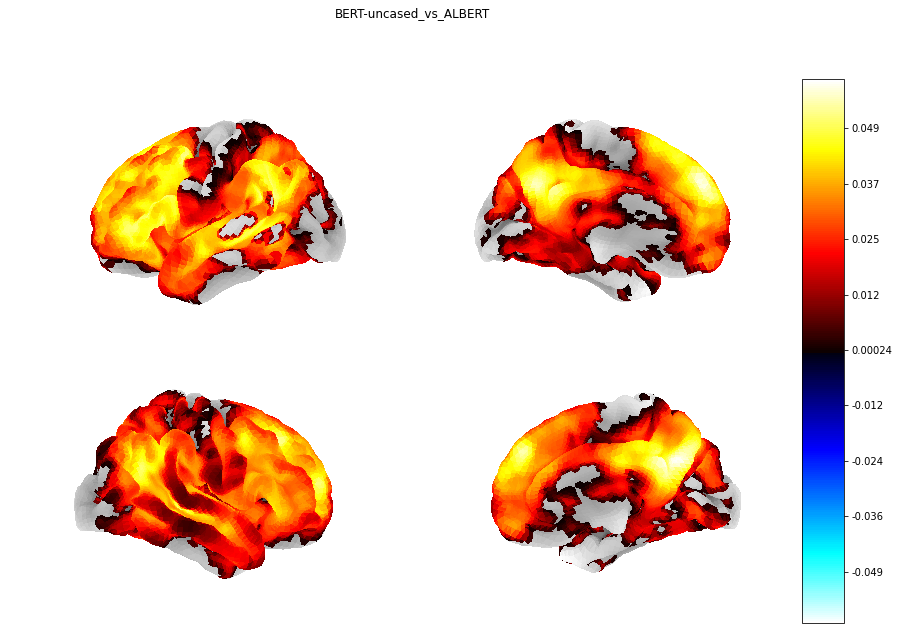

########## BERT-uncased_vs_GPT2 ##########


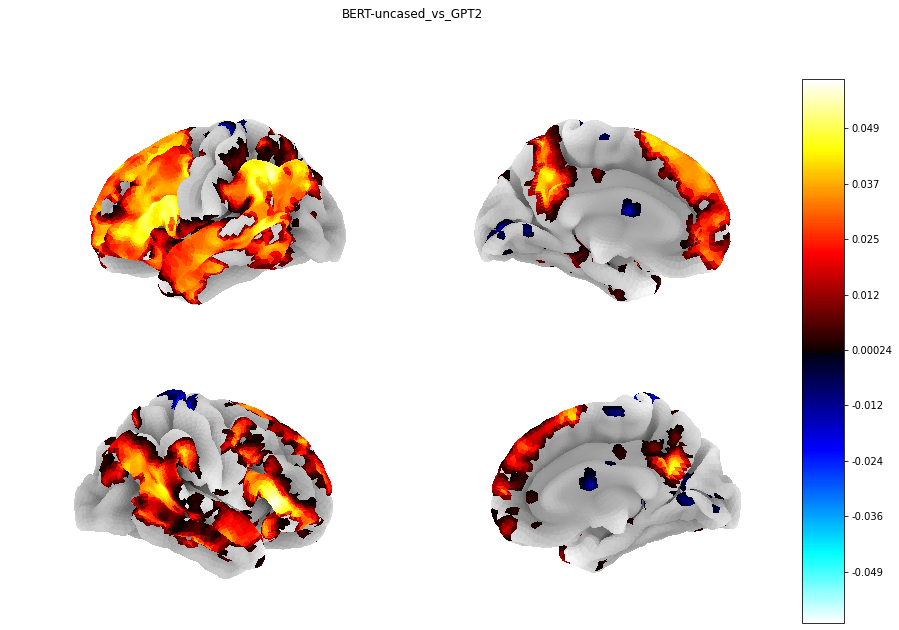

########## BERT-uncased_vs_LSTM ##########


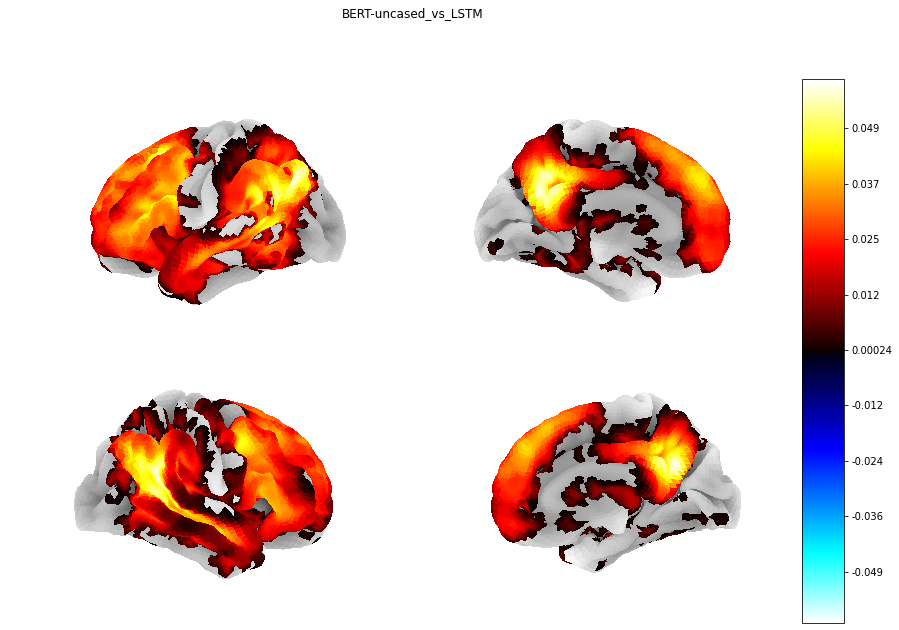

########## BERT-uncased_vs_GLOVE ##########


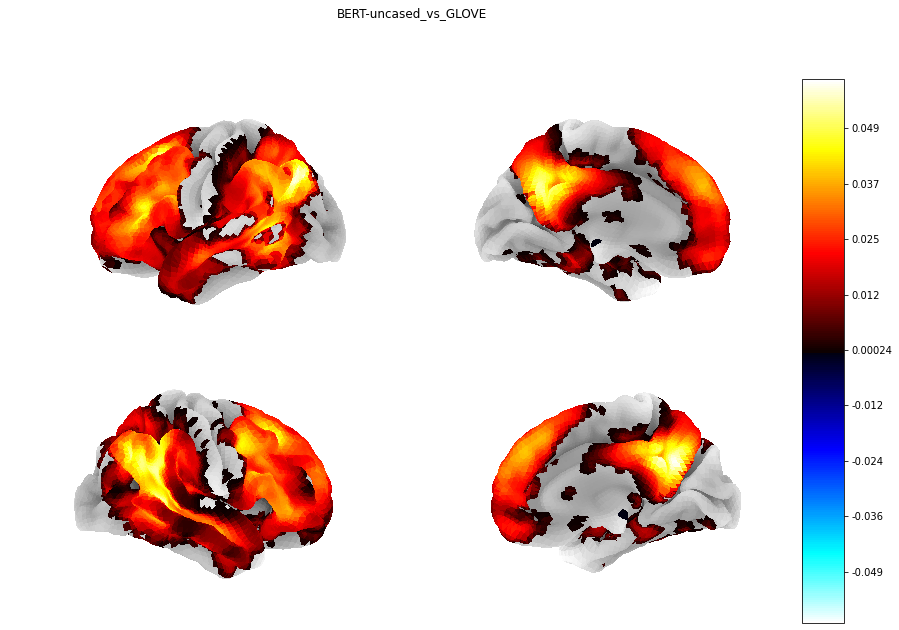

########## GPT2_vs_LSTM ##########


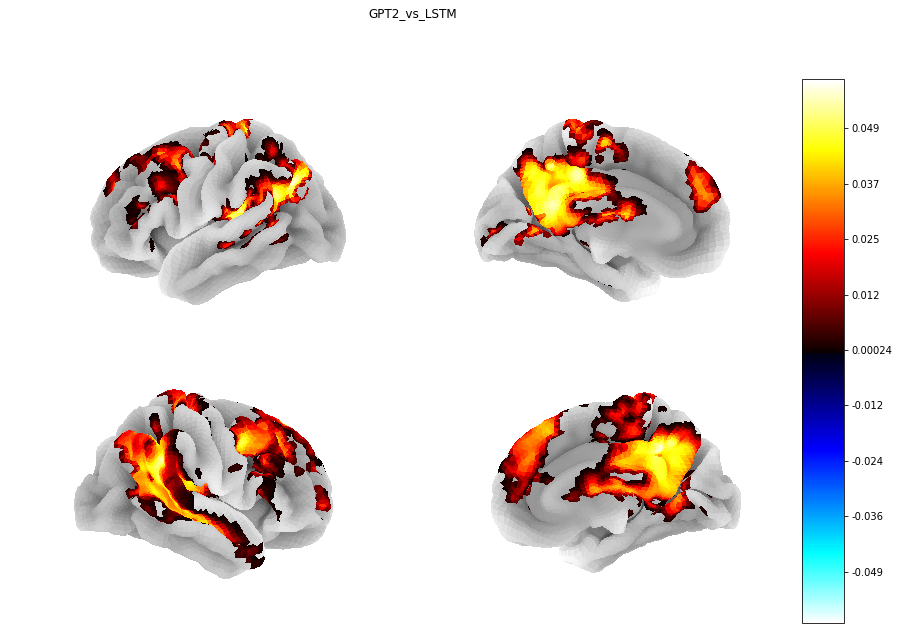

########## GPT2_vs_GLOVE ##########


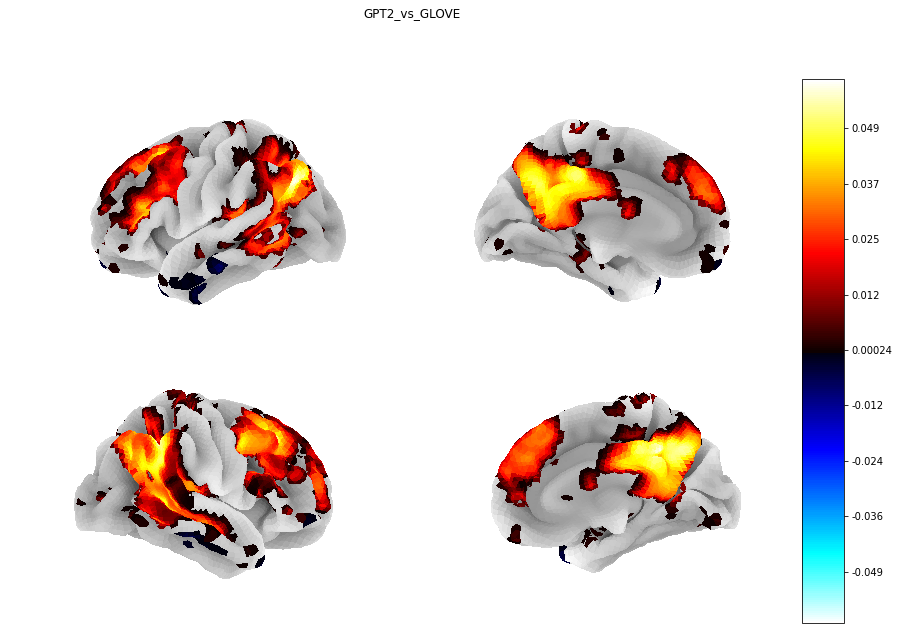

########## LSTM_vs_GLOVE ##########


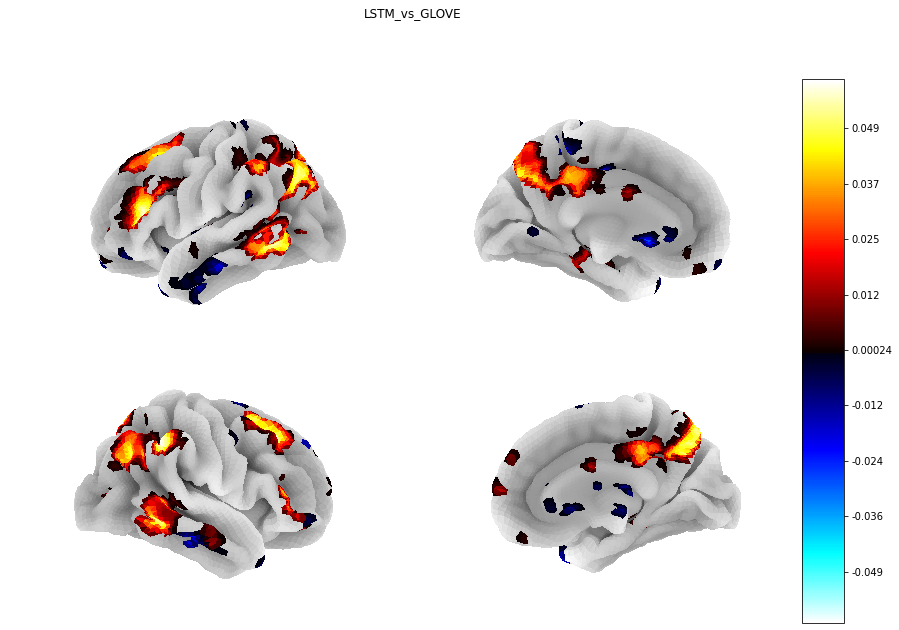

In [134]:
paths = {}
data_model_comparison = {}
for comparison in comparisons:
    names = comparison.split('_vs_')
    name = '{}-vs-{}'.format(names[0], names[1])
    data_model_comparison[name] = []
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths[comparison] = reporting.fetch_map(path, 'Pearson_coeff_group_fdr_effect')[0]


for index_comp, comparison in enumerate(comparisons):
    saving_path = os.path.dirname(paths[comparison])
    print("#"*10, comparison, "#"*10)
    #plot_img_surf(paths[comparison], mask=masks[index_comp], saving_path=None, plot_name=comparison+'_surf', inflated=False, vmax=None, **kwargs)
    multi_plot(
        data=paths[comparison], 
        mask=masks[index_comp],
        plot_name=comparison+'_surf', 
        saving_path=None, 
        return_plot=True, 
        inflated=False,
        suptitle=comparison,
        **kwargs)

#### Surface plots of group level analysis

In [15]:
paths_group_level = {}
for model_name in model_names:
    name = model_name.replace('_{}', '')
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths_group_level[name] = reporting.fetch_map(path, 'R2_group_fdr_effect')[0]

In [16]:
kwargs = {
    'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
    'surf_mesh_type': 'pial_left',
    'hemi':'left', # right
    'view':'lateral', # medial
    'bg_map': 'sulc_left', # sulc_right
    'bg_on_data':True,
    'darkness':.5
}

## Model Comparison (GloVe - LSTM - GPT2 - BERT)

In [66]:
model_names = [
    'bert-base-cased_pre-0_1_post-0_{}_all-hidden-layers_pca_300',
    'bert-base-cased_pre-1_1_post-0_{}_all-hidden-layers_pca_300',
    'bert-base-cased_pre-2_1_post-0_{}_all-hidden-layers_pca_300',
    'bert-base-cased_pre-5_1_post-0_{}_all-hidden-layers_pca_300',
    'bert-base-cased_pre-10_1_post-0_{}_all-hidden-layers_pca_300',
    'bert-base-cased_pre-15_1_post-0_{}_all-hidden-layers_pca_300',
    'bert-base-cased_pre-20_1_post-0_{}_all-hidden-layers_pca_300',
    'bert-base-cased_pre-25_1_post-0_{}_all-hidden-layers_pca_300'
]
legend_names = ['BERT-pre-0_1_post-0-Hpca', 
                'BERT-pre-1_1_post-0-Hpca', 
                'BERT-pre-2_1_post-0-Hpca',  
                'BERT-pre-5_1_post-0-Hpca',
                'BERT-pre-10_1_post-0-Hpca', 
                'BERT-pre-15_1_post-0-Hpca', 
                'BERT-pre-20_1_post-0-Hpca', 
                'BERT-pre-25_1_post-0-Hpca'
               ]

In [67]:
data_model_comparison = { key.replace('_{}', ''): data_full[key.replace('_{}', '')] for key in model_names }

Preparing data for plot per ROI:

In [68]:
data_prep_vertical = reporting.get_data_per_roi(
                                data_model_comparison, 
                                atlas_maps,
                                labels,
                                analysis=None, 
                                language='english', 
                                PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                )

  0%|          | 0/48 [00:00<?, ?it/s]

	Looping through labeled masks...


100%|██████████| 48/48 [00:32<00:00,  1.47it/s]

		-->Done


In [69]:
mean = data_prep_vertical['mean']
third_quartile = data_prep_vertical['third_quartile']
maximum = data_prep_vertical['maximum']

### Vertical plots per ROI

/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/code/fMRI/reporting.py:319: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """)


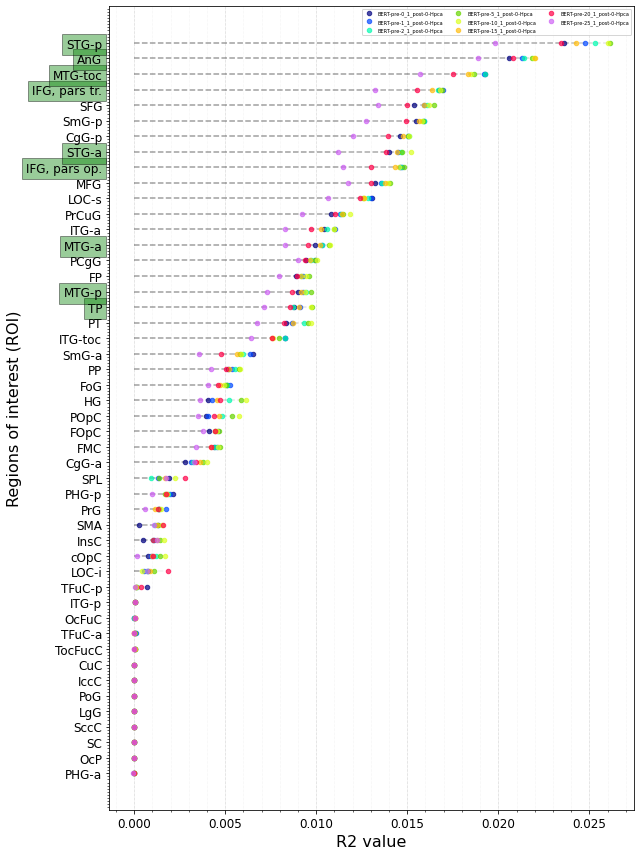

In [70]:
reporting.vertical_plot(
                third_quartile, 
                x_labels, 
                'Third_Quartile_R2_per_ROI',
                save_folder=None, 
                object_of_interest='R2', 
                surnames=load_surnames(),
                legend_names=legend_names, 
                syntactic_roi=load_syntactic_roi(), 
                language_roi=load_language_roi(), 
                figsize=(9,12), 
                count=False, 
                title=None, 
                ylabel='Regions of interest (ROI)', 
                xlabel='R2 value', 
                model_name='Model_comparison'
                )

In [14]:
tmp = reporting.prepare_data_for_anova(
    model_names, 
    atlas_maps, 
    labels, 
    MASKER_PATH,
    object_of_interest='R2', 
    language='english', 
    includ_context=True,
    includ_norm=True,
    OUTPUT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english'
    )

	Looping through labeled masks...


  4%|▍         | 2/48 [24:20<9:19:57, 730.38s/it]


KeyboardInterrupt: 

  0%|          | 0/48 [00:00<?, ?it/s]

	Looping through labeled masks...


100%|██████████| 48/48 [00:17<00:00,  2.73it/s]
/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/code/fMRI/reporting.py:319: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """)


		-->Done


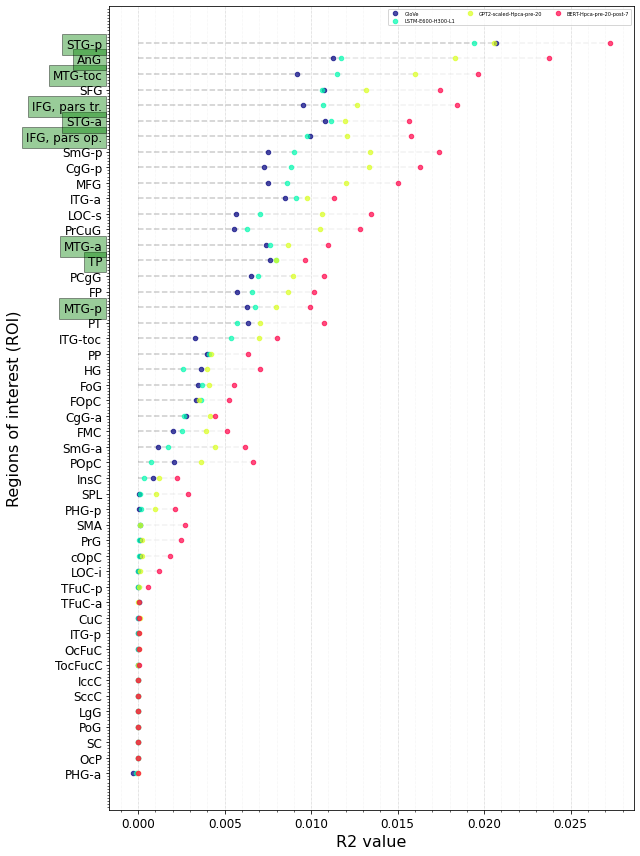

In [34]:
model_names = [
    'glove_300_{}',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-hidden-layers',
    'gpt2_pre-20_1_scaled_{}_all-hidden-layers_pca_300',
    'bert-base-cased_pre-10_1_post-7_{}_all-hidden-layers_pca_300'
]
legend_names = ['GloVe', 
                'LSTM-E600-H300-L1', 
                'GPT2-scaled-Hpca-pre-20', 
                'BERT-Hpca-pre-20-post-7'
               ]

data_model_comparison = { key.replace('_{}', ''): data_full[key.replace('_{}', '')] for key in model_names }
data_prep_vertical = reporting.get_data_per_roi(
                                data_model_comparison, 
                                atlas_maps,
                                labels,
                                analysis=None, 
                                language='english', 
                                PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                )
mean = data_prep_vertical['mean']
third_quartile = data_prep_vertical['third_quartile']
maximum = data_prep_vertical['maximum']
reporting.vertical_plot(
                third_quartile, 
                x_labels, 
                'Third_Quartile_R2_per_ROI',
                save_folder=None, 
                object_of_interest='R2', 
                surnames=load_surnames(),
                legend_names=legend_names, 
                syntactic_roi=load_syntactic_roi(), 
                language_roi=load_language_roi(), 
                figsize=(9,12), 
                count=False, 
                title=None, 
                ylabel='Regions of interest (ROI)', 
                xlabel='R2 value', 
                model_name='Model_comparison'
                )

In [41]:
model_names = [
    'glove_300_{}',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-hidden-layers',
    'gpt2_pre-20_1_scaled_{}_all-hidden-layers_pca_300',
    'bert-base-cased_pre-10_1_post-7_{}_all-hidden-layers_pca_300'
]
legend_names = ['GloVe', 
                'LSTM-E600-H300-L1', 
                'GPT2-scaled-Hpca-pre-20', 
                'BERT-Hpca-pre-20-post-7'
               ]

data_model_comparison = { key.replace('_{}', ''): data_full[key.replace('_{}', '')] for key in model_names }
data_prep_vertical = reporting.get_data_per_roi(
                                data_model_comparison, 
                                atlas_maps,
                                labels,
                                analysis=None, 
                                language='english', 
                                PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                )
mean = data_prep_vertical['mean']
third_quartile = data_prep_vertical['third_quartile']
maximum = data_prep_vertical['maximum']

  0%|          | 0/48 [00:00<?, ?it/s]

	Looping through labeled masks...


100%|██████████| 48/48 [00:16<00:00,  2.91it/s]

		-->Done


In [25]:
df = pd.DataFrame(third_quartile.T, columns=x_labels)
df.index = pd.Index(legend_names)
df

Frontal Pole  Insular Cortex  \
BERT-pre-10_1_post-7-scaled-Hpca       0.010043        0.001862   
BERT-pre-10_1_post-5-scaled-Hpca       0.009974        0.001799   
BERT-pre-10_1_post-2-scaled-Hpca       0.009884        0.001677   
BERT-pre-10_1_post-10-scaled-Hpca      0.010013        0.001884   
BERT-pre-10_1_post-7-Hpca              0.010136        0.002028   
BERT-pre-10_1_post-5-Hpca              0.010099        0.002212   
BERT-pre-10_1_post-2-Hpca              0.010043        0.002088   
BERT-pre-10_1_post-1-Hpca              0.010047        0.001920   
BERT-pre-10_1_post-15-Hpca             0.010058        0.001768   
BERT-pre-10_1_post-12-Hpca             0.010107        0.002249   
BERT-pre-10_1_post-10-Hpca             0.010038        0.001933   

                                   Superior Frontal Gyrus  \
BERT-pre-10_1_post-7-scaled-Hpca                 0.017240   
BERT-pre-10_1_post-5-scaled-Hpca                 0.017142   
BERT-pre-10_1_post-2-scaled-Hpca                 0.017183   
BERT-pre-10_1_post-10-scaled-Hpca                0.017258   
BERT-pre-10_1_post-7-Hpca                        0.017386   
BERT-pre-10_1_post-5-Hpca                        0.017380   
BERT-pre-10_1_post-2-Hpca                        0.017433   
BERT-pre-10_1_post-1-Hpca                        0.017436   
BERT-pre-10_1_post-15-Hpca                       0.016916   
BERT-pre-10_1_post-12-Hpca                       0.017276   
BERT-pre-10_1_post-10-Hpca                       0.017245   

                                   Middle Frontal Gyrus  \
BERT-pre-10_1_post-7-scaled-Hpca               0.015060   
BERT-pre-10_1_post-5-scaled-Hpca               0.014917   
BERT-pre-10_1_post-2-scaled-Hpca               0.014725   
BERT-pre-10_1_post-10-scaled-Hpca              0.015058   
BERT-pre-10_1_post-7-Hpca                      0.014995   
BERT-pre-10_1_post-5-Hpca                      0.014914   
BERT-pre-10_1_post-2-Hpca                      0.014760   
BERT-pre-10_1_post-1-Hpca                      0.014632   
BERT-pre-10_1_post-15-Hpca                     0.014803   
BERT-pre-10_1_post-12-Hpca                     0.015040   
BERT-pre-10_1_post-10-Hpca                     0.014964   

                                   Inferior Frontal Gyrus, pars triangularis  \
BERT-pre-10_1_post-7-scaled-Hpca                                    0.018133   
BERT-pre-10_1_post-5-scaled-Hpca                                    0.018264   
BERT-pre-10_1_post-2-scaled-Hpca                                    0.018160   
BERT-pre-10_1_post-10-scaled-Hpca                                   0.018078   
BERT-pre-10_1_post-7-Hpca                                           0.018354   
BERT-pre-10_1_post-5-Hpca                                           0.018523   
BERT-pre-10_1_post-2-Hpca                                           0.018398   
BERT-pre-10_1_post-1-Hpca                                           0.017986   
BERT-pre-10_1_post-15-Hpca                                          0.017806   
BERT-pre-10_1_post-12-Hpca                                          0.018103   
BERT-pre-10_1_post-10-Hpca                                          0.018127   

                                   Inferior Frontal Gyrus, pars opercularis  \
BERT-pre-10_1_post-7-scaled-Hpca                                   0.015761   
BERT-pre-10_1_post-5-scaled-Hpca                                   0.015714   
BERT-pre-10_1_post-2-scaled-Hpca                                   0.015451   
BERT-pre-10_1_post-10-scaled-Hpca                                  0.015413   
BERT-pre-10_1_post-7-Hpca                                          0.015717   
BERT-pre-10_1_post-5-Hpca                                          0.015811   
BERT-pre-10_1_post-2-Hpca                                          0.015769   
BERT-pre-10_1_post-1-Hpca                                          0.015552   
BERT-pre-10_1_post-15-Hpca                                         0.015382   
BERT-pre-10_1_post-12-Hpca           

In [19]:
comparisons = {
    'BERT_pre-10_1_post-0_vs_scaled' : ['bert-base-cased_pre-10_1_post-0_{}_all-hidden-layers_pca_300', 'bert-base-cased_pre-10_1_post-0_scaled_{}_all-hidden-layers_pca_300'],
    'BERT_pre-10_1_post-2_vs_scaled' : ['bert-base-cased_pre-10_1_post-2_{}_all-hidden-layers_pca_300', 'bert-base-cased_pre-10_1_post-2_scaled_{}_all-hidden-layers_pca_300'],
    'BERT_pre-10_1_post-5_vs_scaled' : ['bert-base-cased_pre-10_1_post-5_{}_all-hidden-layers_pca_300', 'bert-base-cased_pre-10_1_post-5_scaled_{}_all-hidden-layers_pca_300'],
    'BERT_pre-10_1_post-7_vs_scaled' : ['bert-base-cased_pre-10_1_post-7_{}_all-hidden-layers_pca_300', 'bert-base-cased_pre-10_1_post-7_scaled_{}_all-hidden-layers_pca_300'],
    'BERT_pre-10_1_post-10_vs_scaled' : ['bert-base-cased_pre-10_1_post-10_{}_all-hidden-layers_pca_300', 'bert-base-cased_pre-10_1_post-10_scaled_{}_all-hidden-layers_pca_300'],
}
comparisons = {
    'ROBERTA_pre-10_1_post-1_vs_BERT' : ['roberta-base_pre-10_1_post-1_{}_all-hidden-layers_pca_300', 'bert-base-cased_pre-10_1_post-1_{}_all-hidden-layers_pca_300'],
    'ROBERTA_pre-10_1_post-2_vs_BERT' : ['roberta-base_pre-10_1_post-2_{}_all-hidden-layers_pca_300', 'bert-base-cased_pre-10_1_post-2_{}_all-hidden-layers_pca_300'],
    'ROBERTA_pre-10_1_post-5_vs_BERT' : ['roberta-base_pre-10_1_post-5_{}_all-hidden-layers_pca_300', 'bert-base-cased_pre-10_1_post-5_{}_all-hidden-layers_pca_300'],
    'ROBERTA_pre-10_1_post-12_vs_BERT' : ['roberta-base_pre-10_1_post-12_{}_all-hidden-layers_pca_300', 'bert-base-cased_pre-10_1_post-12_{}_all-hidden-layers_pca_300'],
    'ROBERTA_pre-10_1_post-10_vs_BERT' : ['roberta-base_pre-10_1_post-10_{}_all-hidden-layers_pca_300', 'bert-base-cased_pre-10_1_post-10_{}_all-hidden-layers_pca_300'],
}


for comparison in comparisons:
    imgs_1 = data_full[comparisons[comparison][0].replace('_{}', '')]['R2']
    imgs_2 = data_full[comparisons[comparison][1].replace('_{}', '')]['R2']
    
    names = comparison.split('_vs_')

    reporting.compute_model_contrasts_t_test(
                                    imgs_1,
                                    imgs_2,
                                    names[0], 
                                    names[1], 
                                    analysis_name='',
                                    observed_data='R2',
                                    language='english',
                                    smoothing_fwhm=6,
                                    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    )
paths = {}
data_model_comparison = {}
for comparison in comparisons:
    names = comparison.split('_vs_')
    name = '{}-vs-{}_{}'.format(names[0], names[1], '')
    data_model_comparison[name] = []
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths[comparison] = reporting.fetch_map(path, 'R2_group_fdr_effect')[0]

#####  ROBERTA_pre-10_1_post-1-vs-BERT__R2  #####


/home/ap259944/anaconda3/envs/parietal/lib/python3.7/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


#####  ROBERTA_pre-10_1_post-2-vs-BERT__R2  #####
#####  ROBERTA_pre-10_1_post-5-vs-BERT__R2  #####
#####  ROBERTA_pre-10_1_post-12-vs-BERT__R2  #####
#####  ROBERTA_pre-10_1_post-10-vs-BERT__R2  #####


  0%|          | 0/48 [00:00<?, ?it/s]

	Looping through labeled masks...


100%|██████████| 48/48 [00:22<00:00,  2.13it/s]
/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/code/fMRI/reporting.py:319: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


		-->Done


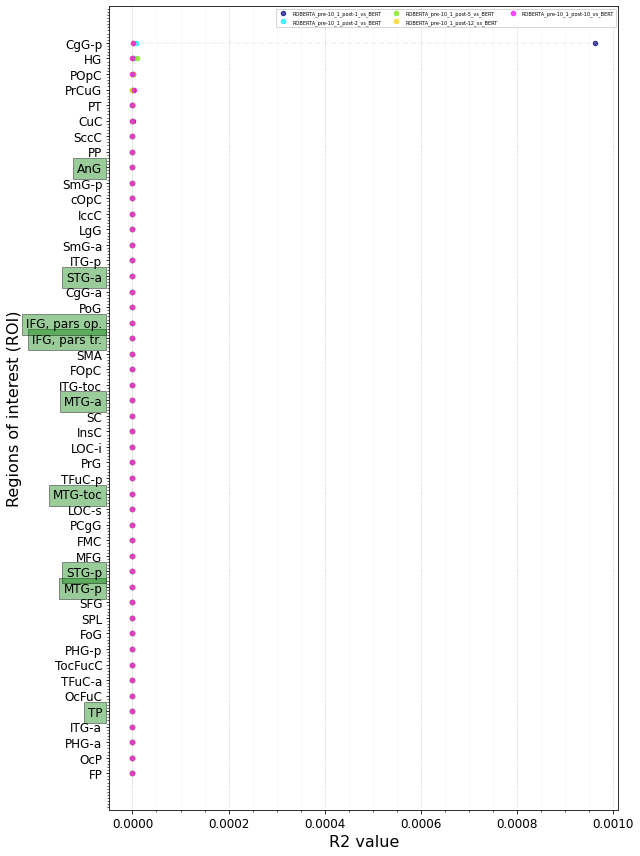

In [20]:
model_names = [
    'BERT_pre-10_1_post-0_vs_scaled',
    'BERT_pre-10_1_post-2_vs_scaled',
    'BERT_pre-10_1_post-5_vs_scaled',
    'BERT_pre-10_1_post-7_vs_scaled',
    'BERT_pre-10_1_post-10_vs_scaled'
              ]
model_names = ['ROBERTA_pre-10_1_post-1_vs_BERT' ,
    'ROBERTA_pre-10_1_post-2_vs_BERT',
    'ROBERTA_pre-10_1_post-5_vs_BERT',
    'ROBERTA_pre-10_1_post-12_vs_BERT',
    'ROBERTA_pre-10_1_post-10_vs_BERT']

legend_names = [
    'BERT_pre-10_1_post-0_vs_scaled',
    'BERT_pre-10_1_post-2_vs_scaled',
    'BERT_pre-10_1_post-5_vs_scaled',
    'BERT_pre-10_1_post-7_vs_scaled',
    'BERT_pre-10_1_post-10_vs_scaled'
               ]
legend_names = ['ROBERTA_pre-10_1_post-1_vs_BERT' ,
    'ROBERTA_pre-10_1_post-2_vs_BERT',
    'ROBERTA_pre-10_1_post-5_vs_BERT',
    'ROBERTA_pre-10_1_post-12_vs_BERT',
    'ROBERTA_pre-10_1_post-10_vs_BERT']


data_prep_vertical = reporting.get_data_per_roi(
                                data_model_comparison, 
                                atlas_maps,
                                labels,
                                analysis=None, 
                                language='english', 
                                PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                )
mean = data_prep_vertical['mean']
third_quartile = data_prep_vertical['third_quartile']
maximum = data_prep_vertical['maximum']
reporting.vertical_plot(
                third_quartile, 
                x_labels, 
                'Third_Quartile_R2_per_ROI',
                save_folder=None, 
                object_of_interest='R2', 
                surnames=load_surnames(),
                legend_names=legend_names, 
                syntactic_roi=load_syntactic_roi(), 
                language_roi=load_language_roi(), 
                figsize=(9,12), 
                count=False, 
                title=None, 
                ylabel='Regions of interest (ROI)', 
                xlabel='R2 value', 
                model_name='Model_comparison'
                )

########## ROBERTA_pre-10_1_post-1_vs_BERT ##########


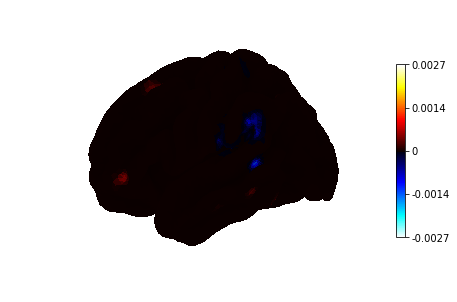

########## ROBERTA_pre-10_1_post-2_vs_BERT ##########


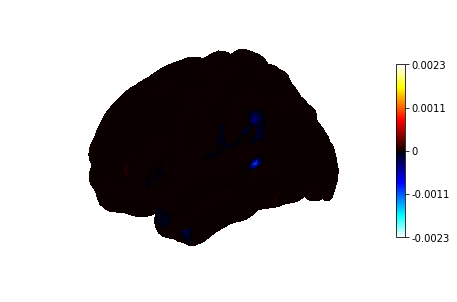

########## ROBERTA_pre-10_1_post-5_vs_BERT ##########


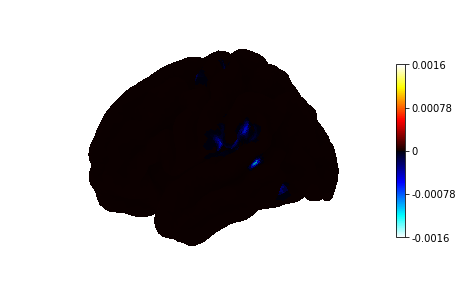

########## ROBERTA_pre-10_1_post-12_vs_BERT ##########


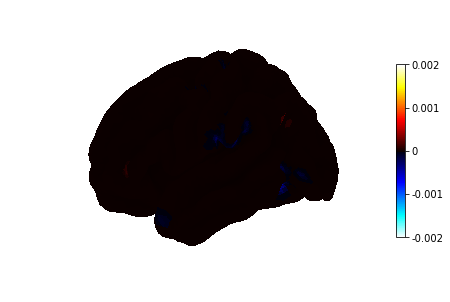

########## ROBERTA_pre-10_1_post-10_vs_BERT ##########


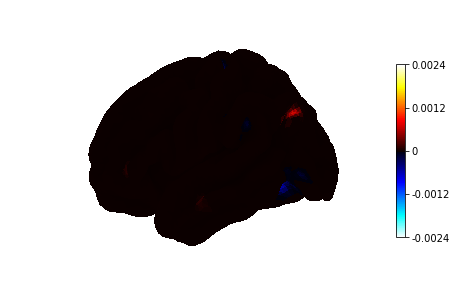

In [23]:
for index_comp, comparison in enumerate(comparisons):
    saving_path = os.path.dirname(paths[comparison])
    print("#"*10, comparison, "#"*10)
    reporting.plot_img_surf(paths[comparison], saving_path=None, plot_name=comparison+'_surf', inflated=False, vmax=0.01, **kwargs)

### Surface plots

#### Surface plots showing which model predicts better (voxel-wise)

In [49]:
model_names = [
    'glove_300',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers',
    'gpt2_scaled_all-hidden-layers_pca_300',
    'bert-base-cased_old_all-hidden-layers_pca_300'
]

In [22]:
kwargs = {
    'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
    'surf_mesh_type': 'pial_left',
    'hemi':'left', # right
    'view':'lateral', # medial
    'bg_map': 'sulc_left', # sulc_right
    'bg_on_data':True,
    'darkness':.5
}

In [51]:
img = reporting.get_voxel_wise_max_img_on_surf(
                            masker, 
                            model_names, 
                            language='english', 
                            PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/',
                            **kwargs
                            )

In [52]:
# saving_path = 

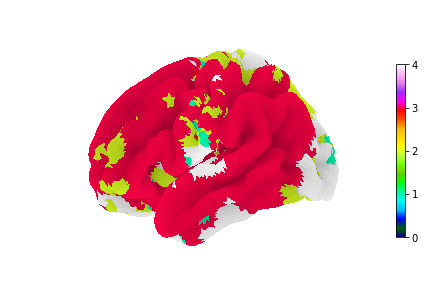

In [53]:
reporting.plot_roi_img_surf(img, saving_path=None, plot_name='model_comparison_surf', inflated=False, compute_surf=False, **kwargs)

In [23]:
view = reporting.interactive_surf_plot(img, inflated=False, **kwargs)
view

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
2

#### Surface plots of group-level difference analysis maps

In [54]:
comparisons = {
    'LSTM_300-H_vs_Glove' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'glove_300'],
    'BERT-Hpca_vs_GPT2-scaled-Hpca' : ['bert-base-cased_old_all-hidden-layers_pca_300', 'gpt2_scaled_all-hidden-layers_pca_300'],
    'BERT-Hpca_vs_LSTM_300-H' : ['bert-base-cased_old_all-hidden-layers_pca_300', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers'],
    'GPT2-scaled-Hpca_vs_LSTM_300-H' : ['gpt2_scaled_all-hidden-layers_pca_300', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers'],
    'BERT-Hpca_vs_Glove' : ['bert-base-cased_old_all-hidden-layers_pca_300', 'glove_300'],
    'GPT2-scaled-Hpca_vs_Glove' : ['gpt2_scaled_all-hidden-layers_pca_300', 'glove_300']   
}

In [43]:
for comparison in comparisons:
    imgs_1 = data_full[comparisons[comparison][0]]['R2']
    imgs_2 = data_full[comparisons[comparison][1]]['R2']
    
    names = comparison.split('_vs_')

    reporting.compute_model_contrasts_t_test(
                                    imgs_1,
                                    imgs_2,
                                    names[0], 
                                    names[1], 
                                    analysis_name='',
                                    observed_data='R2',
                                    language='english',
                                    smoothing_fwhm=6,
                                    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    )

#####  LSTM_300-H-vs-Glove__R2  #####
#####  BERT-Hpca-vs-GPT2-scaled-Hpca__R2  #####
#####  BERT-Hpca-vs-LSTM_300-H__R2  #####
#####  GPT2-scaled-Hpca-vs-LSTM_300-H__R2  #####
#####  BERT-Hpca-vs-Glove__R2  #####
#####  GPT2-scaled-Hpca-vs-Glove__R2  #####


In [55]:
paths = {}
for comparison in comparisons:
    names = comparison.split('_vs_')
    name = '{}-vs-{}_{}'.format(names[0], names[1], '')
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths[comparison] = reporting.fetch_map(path, 'R2_group_fdr_effect')[0]

In [39]:
kwargs = {
    'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
    'surf_mesh_type': 'pial_left',
    'hemi':'left', # right
    'view':'lateral', # medial
    'bg_map': 'sulc_left', # sulc_right
    'bg_on_data':True,
    'darkness':.05
}

########## LSTM_300-H_vs_Glove ##########


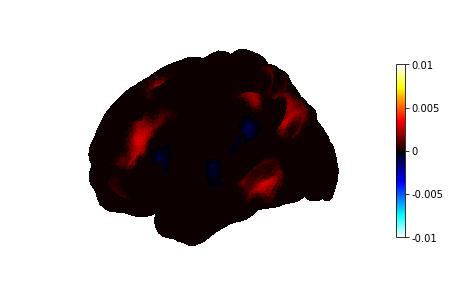

########## BERT-Hpca_vs_GPT2-scaled-Hpca ##########


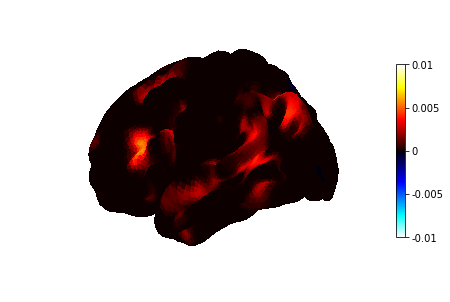

########## BERT-Hpca_vs_LSTM_300-H ##########


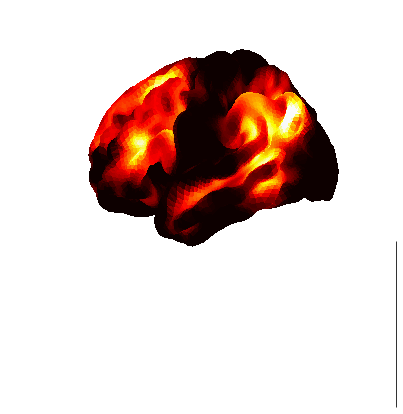

########## GPT2-scaled-Hpca_vs_LSTM_300-H ##########


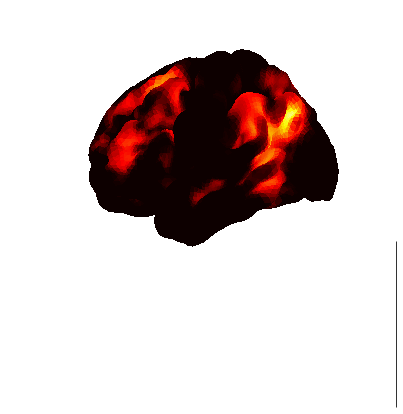

########## BERT-Hpca_vs_Glove ##########


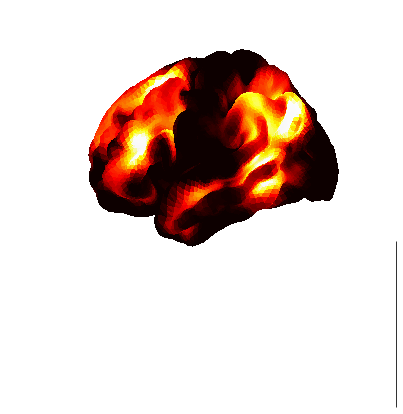

########## GPT2-scaled-Hpca_vs_Glove ##########


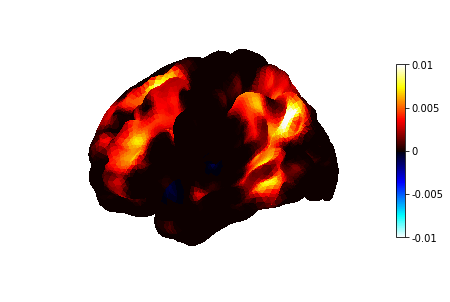

In [58]:
for index_comp, comparison in enumerate(comparisons):
    saving_path = os.path.dirname(paths[comparison])
    print("#"*10, comparison, "#"*10)
    plot_img_surf(paths[comparison], saving_path=None, plot_name=comparison+'_surf', inflated=False, vmax=0.01, **kwargs)

## LSTM gates analysis

In [59]:
lstm_names = [
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-out-layers',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-in-layers',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-hidden-layers',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-forget-layers',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-c_tilde-layers',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-cell-layers'
]

lstm_legends = ['LSTM-E600-O300-L1', 
                'LSTM-E600-I300-L1', 
                'LSTM-E600-H300-L1',
                'LSTM-E600-F300-L1',
                'LSTM-E600-CT300-L1',
                'LSTM-E600-C300-L1'
               ]

Retrieving data and computing group level analysis:

In [60]:
data_lstm_gates = reporting.get_model_data(lstm_names, language, OUTPUT_PATH)
reporting.check_data(data_full, 51)
reporting.compute_t_test_for_model_comparison(
                                        data_lstm_gates, 
                                        smoothing_fwhm=6, 
                                        language='english',
                                        vmax=None,
                                        PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                        )

  4%|▍         | 2/51 [00:00<00:05,  8.46it/s]

sub-057 - 1 - 1
sub-058 - 1 - 1


  8%|▊         | 4/51 [00:00<00:06,  7.05it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1


 12%|█▏        | 6/51 [00:00<00:06,  7.14it/s]

sub-062 - 1 - 1
sub-063 - 1 - 1


 14%|█▎        | 7/51 [00:00<00:05,  7.64it/s]

sub-064 - 1 - 1
sub-065 - 1 - 1


 20%|█▉        | 10/51 [00:01<00:06,  6.79it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1


 24%|██▎       | 12/51 [00:01<00:04,  7.85it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1


 29%|██▉       | 15/51 [00:01<00:03,  9.37it/s]

sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1


 33%|███▎      | 17/51 [00:02<00:03,  8.78it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1


 41%|████      | 21/51 [00:02<00:03,  9.10it/s]

sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1


 45%|████▌     | 23/51 [00:02<00:02,  9.80it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1


 49%|████▉     | 25/51 [00:03<00:02,  8.84it/s]

sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1


 57%|█████▋    | 29/51 [00:03<00:01, 11.11it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1


 61%|██████    | 31/51 [00:03<00:01, 11.08it/s]

sub-089 - 1 - 1
sub-091 - 1 - 1


 65%|██████▍   | 33/51 [00:03<00:01,  9.90it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1


 69%|██████▊   | 35/51 [00:04<00:02,  7.96it/s]

sub-094 - 1 - 1
sub-095 - 1 - 1


 75%|███████▍  | 38/51 [00:04<00:01, 10.01it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1


 84%|████████▍ | 43/51 [00:04<00:00, 11.33it/s]

sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1


 88%|████████▊ | 45/51 [00:04<00:00, 11.88it/s]

sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1


 92%|█████████▏| 47/51 [00:04<00:00, 12.49it/s]

sub-109 - 1 - 1
sub-110 - 1 - 1


100%|██████████| 51/51 [00:05<00:00,  9.52it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1



  4%|▍         | 2/51 [00:00<00:03, 16.27it/s]

sub-057 - 1 - 1
sub-058 - 1 - 1


  8%|▊         | 4/51 [00:00<00:05,  8.30it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1


 12%|█▏        | 6/51 [00:00<00:05,  8.71it/s]

sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1


 20%|█▉        | 10/51 [00:00<00:03, 10.91it/s]

sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1


 24%|██▎       | 12/51 [00:01<00:04,  9.12it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1


 27%|██▋       | 14/51 [00:01<00:03,  9.60it/s]

sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1


 35%|███▌      | 18/51 [00:01<00:03, 10.71it/s]

sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1


 39%|███▉      | 20/51 [00:01<00:02, 12.03it/s]

sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1


 43%|████▎     | 22/51 [00:02<00:02, 12.90it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1


 51%|█████     | 26/51 [00:02<00:02, 11.47it/s]

sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1


 55%|█████▍    | 28/51 [00:02<00:01, 12.10it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1


 63%|██████▎   | 32/51 [00:02<00:01, 12.33it/s]

sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1


 67%|██████▋   | 34/51 [00:03<00:01, 11.69it/s]

sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1


 71%|███████   | 36/51 [00:03<00:01, 11.17it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1


 78%|███████▊  | 40/51 [00:03<00:01, 10.81it/s]

sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1


 82%|████████▏ | 42/51 [00:03<00:00,  9.25it/s]

sub-101 - 1 - 1
sub-103 - 1 - 1


 86%|████████▋ | 44/51 [00:04<00:00,  8.88it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1


 94%|█████████▍| 48/51 [00:04<00:00, 10.52it/s]

sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1


  4%|▍         | 2/51 [00:00<00:03, 14.94it/s]

sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1


 12%|█▏        | 6/51 [00:00<00:03, 12.16it/s]

sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:03, 12.27it/s]

sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1


 24%|██▎       | 12/51 [00:00<00:03, 12.86it/s]

sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1


 29%|██▉       | 15/51 [00:01<00:02, 14.65it/s]

sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1


 37%|███▋      | 19/51 [00:01<00:02, 14.44it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1


 45%|████▌     | 23/51 [00:01<00:01, 14.65it/s]

sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1


 55%|█████▍    | 28/51 [00:01<00:01, 16.22it/s]

sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1


 59%|█████▉    | 30/51 [00:02<00:01, 13.29it/s]

sub-088 - 1 - 1
sub-089 - 1 - 1


 63%|██████▎   | 32/51 [00:02<00:01, 12.46it/s]

sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1


 69%|██████▊   | 35/51 [00:02<00:01, 14.25it/s]

sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1


 76%|███████▋  | 39/51 [00:02<00:00, 12.19it/s]

sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1


 80%|████████  | 41/51 [00:03<00:00, 11.37it/s]

sub-100 - 1 - 1
sub-101 - 1 - 1


 88%|████████▊ | 45/51 [00:03<00:00, 12.26it/s]

sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1


 96%|█████████▌| 49/51 [00:03<00:00, 12.39it/s]

sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1


  4%|▍         | 2/51 [00:00<00:02, 18.75it/s]

sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1


  8%|▊         | 4/51 [00:00<00:03, 15.12it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1


 12%|█▏        | 6/51 [00:00<00:03, 14.12it/s]

sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1


 22%|██▏       | 11/51 [00:00<00:02, 13.84it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1


 27%|██▋       | 14/51 [00:00<00:02, 15.04it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1


 35%|███▌      | 18/51 [00:01<00:02, 14.53it/s]

sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1


 39%|███▉      | 20/51 [00:01<00:02, 13.78it/s]

sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1


 43%|████▎     | 22/51 [00:01<00:02, 13.92it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1


 51%|█████     | 26/51 [00:01<00:01, 12.56it/s]

sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1


 57%|█████▋    | 29/51 [00:02<00:01, 14.46it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1


 67%|██████▋   | 34/51 [00:02<00:01, 14.57it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1


 71%|███████   | 36/51 [00:02<00:00, 15.28it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1


 80%|████████  | 41/51 [00:02<00:00, 12.93it/s]

sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1


 88%|████████▊ | 45/51 [00:03<00:00, 13.48it/s]

sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1


 94%|█████████▍| 48/51 [00:03<00:00, 14.08it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1


 98%|█████████▊| 50/51 [00:03<00:00, 12.65it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-115 - 1 - 1


  2%|▏         | 1/51 [00:00<00:11,  4.31it/s]

sub-057 - 1 - 1


  4%|▍         | 2/51 [00:00<00:11,  4.10it/s]

sub-058 - 1 - 1


  6%|▌         | 3/51 [00:00<00:12,  3.91it/s]

sub-059 - 1 - 1


 12%|█▏        | 6/51 [00:01<00:11,  3.80it/s]

sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1


 22%|██▏       | 11/51 [00:01<00:06,  6.26it/s]

sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1


 29%|██▉       | 15/51 [00:02<00:03,  9.32it/s]

sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1


 39%|███▉      | 20/51 [00:02<00:02, 12.05it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1


 45%|████▌     | 23/51 [00:02<00:02, 12.72it/s]

sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1


 51%|█████     | 26/51 [00:02<00:01, 14.26it/s]

sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1


 61%|██████    | 31/51 [00:02<00:01, 16.05it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1


 65%|██████▍   | 33/51 [00:03<00:01, 14.86it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1


 73%|███████▎  | 37/51 [00:03<00:01, 13.68it/s]

sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1


 76%|███████▋  | 39/51 [00:03<00:00, 14.16it/s]

sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1


 80%|████████  | 41/51 [00:03<00:00, 13.97it/s]

sub-101 - 1 - 1
sub-103 - 1 - 1


 84%|████████▍ | 43/51 [00:04<00:00,  9.28it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1


 88%|████████▊ | 45/51 [00:04<00:00,  6.06it/s]

sub-106 - 1 - 1


 90%|█████████ | 46/51 [00:04<00:00,  5.41it/s]

sub-108 - 1 - 1


 92%|█████████▏| 47/51 [00:05<00:00,  4.60it/s]

sub-109 - 1 - 1


 94%|█████████▍| 48/51 [00:05<00:00,  4.05it/s]

sub-110 - 1 - 1


 96%|█████████▌| 49/51 [00:05<00:00,  4.06it/s]

sub-113 - 1 - 1


 98%|█████████▊| 50/51 [00:05<00:00,  4.03it/s]

sub-114 - 1 - 1


100%|██████████| 51/51 [00:06<00:00,  8.11it/s]

sub-115 - 1 - 1
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-out-layers_R2  #####


#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-out-layers_Pearson_coeff  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-in-layers_R2  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-in-layers_Pearson_coeff  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers_R2  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers_Pearson_coeff  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-forget-layers_R2  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-forget-layers_Pearson_coeff  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-c_tilde-layers_R2  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_eng

In [37]:
data_lstm_vertical = reporting.get_data_per_roi(
                                data_lstm_gates, 
                                atlas_maps,
                                labels,
                                analysis=None, 
                                language='english', 
                                PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                )
mean_lstm = data_lstm_vertical['mean']
third_quartile_lstm = data_lstm_vertical['third_quartile']

  0%|          | 0/48 [00:00<?, ?it/s]

	Looping through labeled masks...


100%|██████████| 48/48 [00:31<00:00,  1.53it/s]

		-->Done


/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/code/fMRI/reporting.py:319: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


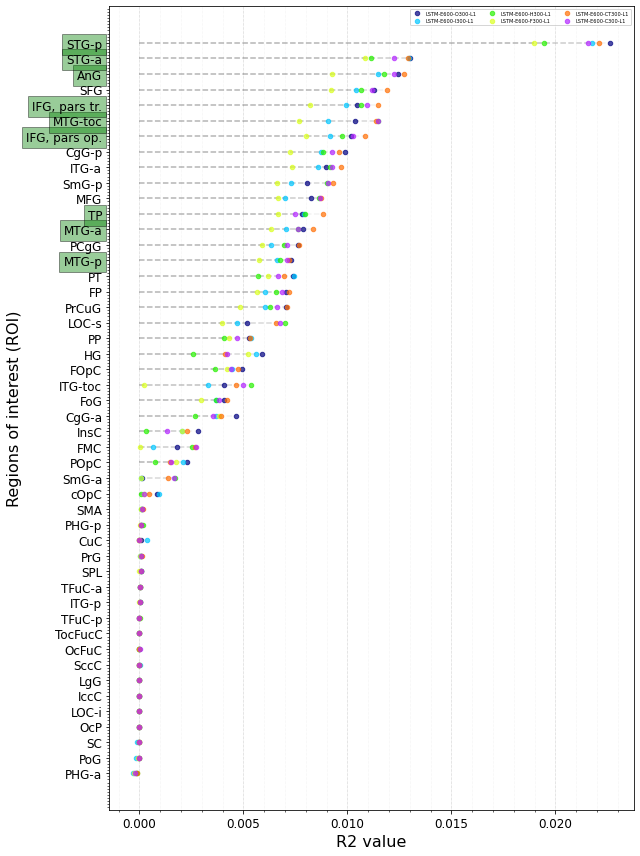

In [40]:
reporting.vertical_plot(
                third_quartile_lstm, 
                x_labels, 
                'Third_Quartile_R2_per_ROI',
                save_folder=None, 
                object_of_interest='R2', 
                surnames=load_surnames(),
                legend_names=lstm_legends, 
                syntactic_roi=load_syntactic_roi(), 
                language_roi=load_language_roi(), 
                figsize=(9,12), 
                count=False, 
                title=None, 
                ylabel='Regions of interest (ROI)', 
                xlabel='R2 value', 
                model_name='LSTM gates comparison'
                )

In [65]:
comparisons_lstm = {
    'LSTM-E600-I300-L1_vs_LSTM-E600-F300-L1' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-in-layers', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-forget-layers'],
    'LSTM-E600-H300-L1_vs_LSTM-E600-O300-L1' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-out-layers'],
    'LSTM-E600-H300-L1_vs_LSTM-E600-I300-L1' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-in-layers'],
    'LSTM-E600-H300-L1_vs_LSTM-E600-F300-L1' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-forget-layers'],
    'LSTM-E600-H300-L1_vs_LSTM-E600-C300-L1' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-cell-layers'],
    'LSTM-E600-H300-L1_vs_LSTM-E600-CT300-L1' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-c_tilde-layers']
}
for comparison in comparisons_lstm:
    imgs_1 = data_lstm_gates[comparisons_lstm[comparison][0]]['R2']
    imgs_2 = data_lstm_gates[comparisons_lstm[comparison][1]]['R2']
    
    names = comparison.split('_vs_')

    reporting.compute_model_contrasts_t_test(
                                    imgs_1,
                                    imgs_2,
                                    names[0], 
                                    names[1], 
                                    analysis_name='',
                                    observed_data='R2',
                                    language='english',
                                    smoothing_fwhm=6,
                                    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    )

#####  LSTM-E600-I300-L1-vs-LSTM-E600-F300-L1__R2  #####
#####  LSTM-E600-H300-L1-vs-LSTM-E600-O300-L1__R2  #####
#####  LSTM-E600-H300-L1-vs-LSTM-E600-I300-L1__R2  #####


KeyboardInterrupt: 

In [66]:
paths_lstm = {}
for comparison in comparisons_lstm:
    names = comparison.split('_vs_')
    name = '{}-vs-{}_{}'.format(names[0], names[1], '')
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths_lstm[comparison] = reporting.fetch_map(path, 'R2_group_fdr_effect')[0]

########## LSTM-E600-I300-L1_vs_LSTM-E600-F300-L1 ##########


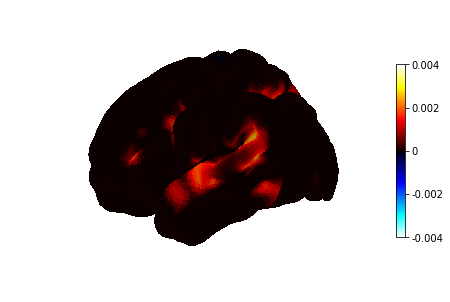

########## LSTM-E600-H300-L1_vs_LSTM-E600-O300-L1 ##########


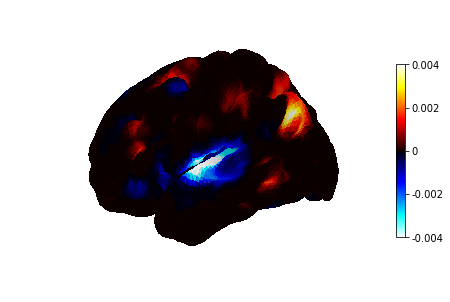

########## LSTM-E600-H300-L1_vs_LSTM-E600-I300-L1 ##########


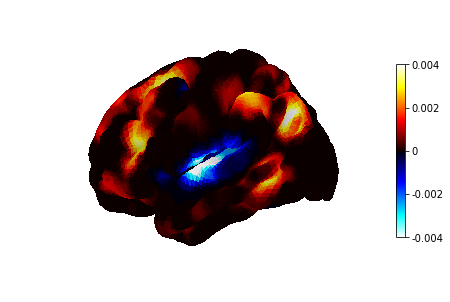

########## LSTM-E600-H300-L1_vs_LSTM-E600-F300-L1 ##########


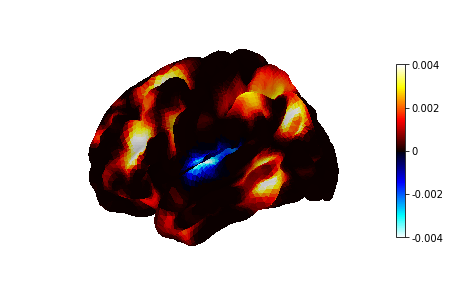

########## LSTM-E600-H300-L1_vs_LSTM-E600-C300-L1 ##########


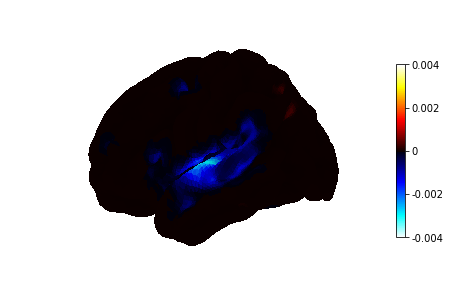

########## LSTM-E600-H300-L1_vs_LSTM-E600-CT300-L1 ##########


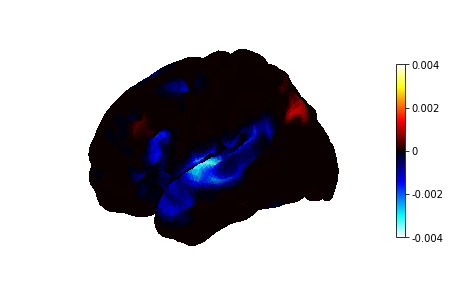

In [69]:
kwargs = {
    'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
    'surf_mesh_type': 'pial_left',
    'hemi':'left', # right
    'view':'lateral', # medial
    'bg_map': 'sulc_left', # sulc_right
    'bg_on_data':True,
    'darkness':.5
}
for index_comp, comparison in enumerate(comparisons_lstm):
    saving_path = os.path.dirname(paths_lstm[comparison])
    print("#"*10, comparison, "#"*10)
    plot_img_surf(paths_lstm[comparison], saving_path=None, plot_name=comparison+'_surf', inflated=False, vmax=0.004, **kwargs)

## BERT vs GPT2

#### Comparison of Bert - Bert_seq - GPT2 with all hidden states of all layers

Here we compute group level maps for each model independently:

In [ ]:
big_model_names = [
    'gpt2_scaled_{}_all-hidden-layers',
    'bert-base-cased_{}_all-hidden-layers',
    'bert-base-cased_sequential_{}_all-hidden-layers'
]

big_model_legends = [
    'GPT2_scaled-H',
    'BERT-H',
    'Bert-seq-H'
]
data_big_models = reporting.get_model_data(big_model_names, language, OUTPUT_PATH)
reporting.check_data(data_big_models, 51)
reporting.compute_t_test_for_model_comparison(
                                        data_big_models, 
                                        smoothing_fwhm=6, 
                                        language='english',
                                        vmax=None,
                                        PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                        )

Here we compute group level maps of the difference between models:

In [ ]:
comparisons_big_models = {
    'BERT-H_vs_GPT2-scaled-H' : ['bert-base-cased_all-hidden-layers', 'gpt2_scaled_all-hidden-layers'],
    'BERT-H_vs_BERT-seq-H' : ['bert-base-cased_all-hidden-layers', 'bert-base-cased_sequential_all-hidden-layers'],
    'GPT2-scaled-H_vs_BERT-seq-H' : ['gpt2_scaled_all-hidden-layers', 'bert-base-cased_sequential_all-hidden-layers'],
}
for comparison in comparisons_big_models:
    imgs_1 = data_big_models[comparisons_big_models[comparison][0]]['R2']
    imgs_2 = data_big_models[comparisons_big_models[comparison][1]]['R2']
    
    names = comparison.split('_vs_')

    reporting.compute_model_contrasts_t_test(
                                    imgs_1,
                                    imgs_2,
                                    names[0], 
                                    names[1], 
                                    analysis_name='',
                                    observed_data='R2',
                                    language='english',
                                    smoothing_fwhm=6,
                                    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    )
paths_big_models = {}
for comparison in comparisons_big_models:
    names = comparison.split('_vs_')
    name = '{}-vs-{}_{}'.format(names[0], names[1], '')
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths_big_models[comparison] = reporting.fetch_map(path, 'R2_group_fdr_effect')[0]

Surface plots:

In [ ]:
kwargs = {
    'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
    'surf_mesh_type': 'pial_left',
    'hemi':'left', # right
    'view':'lateral', # medial
    'bg_map': 'sulc_left', # sulc_right
    'bg_on_data':True,
    'darkness':.5
}
for index_comp, comparison in enumerate(comparisons_big_models):
    saving_path = os.path.dirname(paths_big_models[index_comp])
    plot_img_surf(paths_big_models[index_comp], saving_path=None, plot_name=comparison+'_surf', inflated=False, **kwargs):
        

#### Respective layer-wise analysis

In [ ]:
layer_analysis_model_names = [
    'gpt2_scaled',
    'bert-base-cased',
    'bert-base-cased_sequential'
]

In [ ]:
data_layers = get_layers_data(
                        layer_analysis_model_names, 
                        analysis=reporting.get_default_analysis(), 
                        language='english',
                        OUTPUT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/'
                        )

In [ ]:
for model_name in data_layers.keys():
    data_tmp_vertical = reporting.get_data_per_roi(
                                    data_layers, 
                                    atlas_maps,
                                    labels,
                                    analysis=reporting.get_default_analysis(),
                                    model_name=model_name,
                                    language='english', 
                                    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    )
    mean_big_models = data_tmp_vertical['mean']
    third_quartile_big_models = data_tmp_vertical['third_quartile']
    reporting.vertical_plot(
                    third_quartile_big_models, 
                    x_labels, 
                    'Third_Quartile_R2_per_ROI',
                    save_folder=None, 
                    'R2', 
                    reporting.load_surnames(),
                    big_model_legends, 
                    reporting.load_syntactic_roi(), 
                    reporting.load_language_roi(), 
                    figsize=(9,12), 
                    count=False, 
                    title=None, 
                    ylabel='Regions of interest (ROI)', 
                    xlabel='R2 value', 
                    model_name='Model_comparison'
                    )

#### ROI surface plots 

The following surface plots indicate which layer predicts best which voxel.

In [ ]:
for model_name in data_layers.keys():
    for key in analysis:
        if key != 'Specific-attention-heads':
            maps = []
            for model in data[model_name][key].keys():
                if model == 'models':
                    models = data[model_name][key][model]
                else:
                    name = '_'.join([model_name, model])
                    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
                    name = 'R2_group_fdr_effect'
                    maps.append(fetch_map(path, name)[0])
            # Small reordering of models so that layers are in increasing order
            if key=='Hidden-layers':
                maps = maps[:2] + maps[5:] + maps[2:5]
                models = models[:2] + models[5:] + models[2:5]
                load = 0
            elif key=='Attention-layers':
                maps = maps[:1] + maps[4:] + maps[1:4]
                models = models[:1] + models[4:] + models[1:4]
                load = 1
            data_tmp = np.stack(masker.transform(map_) for map_ in maps)
            data_tmp = np.argmax(data_tmp, axis=0)
            data_tmp = (data_tmp + load)

            plot_name = "R2-{}-{}".format(model_name, key)

            img = masker.inverse_transform(data_tmp)

            saving_path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/glass_brains/'.format(language))
            check_folder(saving_path)
            print(plot_name)
            
            kwargs = {
                'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
                'surf_mesh_type': 'pial_left',
                'hemi':'left', # right
                'view':'lateral', # medial
                'bg_map': 'sulc_left', # sulc_right
                'bg_on_data':True,
                'darkness':.5
            }
            
            reporting.plot_roi_img_surf(img, saving_path=None, plot_name=model_name+'_surf', inflated=False, **kwargs)


#### Layer-wise analysis comparison (vertical plot)

In [ ]:
for model_name in data_layers.keys():
    data_tmp_vertical = reporting.get_data_per_roi(
                                    data_layers, 
                                    atlas_maps,
                                    labels,
                                    analysis=reporting.get_default_analysis(),
                                    model_name=model_name,
                                    language='english', 
                                    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    )
    mean_big_models = data_tmp_vertical['mean']
    third_quartile_big_models = data_tmp_vertical['third_quartile']
    reporting.vertical_plot(
                    third_quartile_big_models, 
                    x_labels, 
                    'Third_Quartile_R2_per_ROI',
                    save_folder=None, 
                    'R2', 
                    reporting.load_surnames(),
                    big_model_legends, 
                    reporting.load_syntactic_roi(), 
                    reporting.load_language_roi(), 
                    figsize=(9,12), 
                    count=False, 
                    title=None, 
                    ylabel='Regions of interest (ROI)', 
                    xlabel='R2 value', 
                    model_name='Model_comparison'
                    )